# HMDA MORTGAGE APPLICATION PREDICTION: TO APPROVE LOAN OR NOT

## ABOUT DATA
Each year thousands of financial institutions report data about mortgages to the public, under the Home Mortgage Disclosure Act (HMDA). 


For mortgage applications, the data will tell you if the consumer got the mortgage or if the consumer was denied, didn't complete the application, or something else happened. The data also has information about pre-approvals and loans sold from one institution to another. For each record, you can learn about the loan, the property characteristics, the applicant demographics, and the lender.

## HMDA LOAN/APPLICATION REGISTER CODE SHEET
RESPONDENT INFORMATION
 
 
 `Respondent ID`: 10 Character Identifier
 
 
 `Agency`:
  1. Office of the Comptroller of the Currency (OCC)
  2. Federal Reserve System (FRS)
  3. Federal Deposit Insurance Corporation (FDIC)
  5. National Credit Union Administration (NCUA)
  7. Department of Housing and Urban Development (HUD)
  9. Consumer Financial Protection Bureau (CFPB)
  
 `Edit Status`:
  0. Blank -- No edit failures
  5. Validity edit failure only
  6. Quality edit failure only
  7.  Validity and quality edit failures
  
 `PROPERTY LOCATION`
 
  1. MSA/MD: Metropolitan Statistical Area/Metropolitan Division
  2. State: Two-digit FIPS state identifier
  3. County: Three-digit FIPS county identifier
  4. Tract: Census tract number
  
`LOAN INFORMATION`
  1. Sequence Number: One-up number scheme for each respondent to make each loan unique

 `Loan Type`:
  1. Conventional (any loan other than FHA, VA, FSA, or RHS loans)
  2. FHA-insured (Federal Housing Administration)
  3. VA-guaranteed (Veterans Administration)
  4. FSA/RHS (Farm Service Agency or Rural Housing Service)
  
 `Property Type`:
  1. One to four-family (other than manufactured housing)
  2. Manufactured housing
  3. Multifamily

 `Loan Purpose:`
  1. -- Home purchase
  2. -- Home improvement
  3. -- Refinancing
  
 `Owner-Occupancy:`
  1. -- Owner-occupied as a principal dwelling
  2. -- Not owner-occupied
  3. -- Not applicable
  
 `Loan Amount:` in thousands of dollars
 
 Preapproval:
 1 -- Preapproval was requested
 2 -- Preapproval was not requested
 3 -- Not applicable
 Action Taken:
 1 -- Loan originated
 2 -- Application approved but not accepted
 3 -- Application denied by financial institution
 4 -- Application withdrawn by applicant
 5 -- File closed for incompleteness
 6 -- Loan purchased by the institution
 7 -- Preapproval request denied by financial institution
 8 -- Preapproval request approved but not accepted (optional reporting)
APPLICANT INFORMATION
 Ethnicity:
 1 -- Hispanic or Latino
 2 -- Not Hispanic or Latino
 3 -- Information not provided by applicant in mail, Internet, or telephone application
 4 -- Not applicable
 5 -- No co-applicant
 Race:
 1 -- American Indian or Alaska Native
 2 -- Asian
 3 -- Black or African American
 4 -- Native Hawaiian or Other Pacific Islander
 5 -- White
 6 -- Information not provided by applicant in mail, Internet, or telephone application
 7 -- Not applicable
 8 -- No co-applicant
 Sex:
 1 -- Male
 2 -- Female
 3 -- Information not provided by applicant in mail, Internet, or telephone application
 4 -- Not applicable
 5 -- No co-applicant
 Gross Annual Income: in thousands of dollars
PURCHASER AND DENIAL INFORMATION
 Type of Purchaser
 0 -- Loan was not originated or was not sold in calendar year covered by register
 1 -- Fannie Mae (FNMA)
 2 -- Ginnie Mae (GNMA)
 3 -- Freddie Mac (FHLMC)
 4 -- Farmer Mac (FAMC)
 5 -- Private securitization
 6 -- Commercial bank, savings bank or savings association
 7 -- Life insurance company, credit union, mortgage bank, or finance company
 8 -- Affiliate institution
 9 -- Other type of purchaser
 Reasons for Denial:
 1 -- Debt-to-income ratio
 2 -- Employment history
 3 -- Credit history
 4 -- Collateral
 5 -- Insufficient cash (downpayment, closing costs)
 6 -- Unverifiable information
 7 -- Credit application incomplete
 8 -- Mortgage insurance denied
 9 -- Other
OTHER DATA
 HOEPA Status (only for loans originated or purchased):
 1 -- HOEPA loan
 2 -- Not a HOEPA loan
 Lien Status (only for applications and originations):
 1 -- Secured by a first lien
 2 -- Secured by a subordinate lien
 3 -- Not secured by a lien
 4 -- Not applicable (purchased loans)
 Application Date Indicator
 0 -- Application Date >= 01-01-2004
 1 -- Application Date < 01-01-2004
 2 -- Application Date = NA (Not Available)
 
 `CENSUS INFORMATION`
 
 `Population:` total population in tract.
 
 `Minority Population %`: percentage of minority population to total population for tract.(Carried to two decimal places)
 
 `FFIEC Median Family Income`: FFIEC Median family income in dollars for the MSA/MD in which the tract is located (adjusted annually by FFIEC).
 
 `Tract to MSA/MD Median Family Income Percentage`: % of tract median family income compared to MSA/MD median family income. (Carried to two decimal places)
 
 ` Number of Owner Occupied Units`: Number of dwellings, including individual condominiums, that are lived in by the owner.
 
 `Number of 1- to 4-Family units`: Dwellings that are built to house fewer than 5 families.

In [1]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore")

from glob import glob #library that helps us search for files
import scipy
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
import random

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder,TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 

from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,roc_curve,roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from scipy.special import inv_boxcox
from sklearn.linear_model import QuantileRegressor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

#deep learning models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
pd.pandas.set_option('display.max_rows',200)
pd.pandas.set_option('display.max_columns',None)
from sklearn.feature_selection import VarianceThreshold
#pd.options.display.float_format = '{:20,.2f}'.format
sns.set_style('darkgrid')

#### Picking 700,000 random samples from the dataset (originally over 14 million samples)

In [2]:
filename = "/Users/USER/Documents/DATASETS/2017_hmda_mortgage.csv"

#number of records in filename minus the header
n = sum(1 for line in open(filename)) -1

#desired sample size
s = 700000

skip = sorted(random.sample(range(1, n+1), n-s))

df = pd.read_csv(filename, skiprows = skip)

In [3]:
#save sampled data'
df = df.reset_index(drop=True)
df.to_csv("/Users/USER/Documents/DATASETS/2017_hmda_mortgage_sampled.csv", index=False)

In [4]:
df.head()

as_of_year respondent_id                                  agency_name  \
0        2017    43-1965151  Department of Housing and Urban Development   
1        2017    0000018208        Federal Deposit Insurance Corporation   
2        2017    75-2921540  Department of Housing and Urban Development   
3        2017    75-2921540  Department of Housing and Urban Development   
4        2017    0471809999  Department of Housing and Urban Development   

  agency_abbr  agency_code loan_type_name  loan_type  \
0         HUD            7  VA-guaranteed          3   
1        FDIC            3   Conventional          1   
2         HUD            7   Conventional          1   
3         HUD            7   Conventional          1   
4         HUD            7    FHA-insured          2   

                                  property_type_name  property_type  \
0  One-to-four family dwelling (other than manufa...              1   
1  One-to-four family dwelling (other than manufa...              1   
2  One-to-four family dwelling (other than manufa...              1   
3  One-to-four family dwelling (other than manufa...              1   
4  One-to-four family dwelling (other than manufa...              1   

  loan_purpose_name  loan_purpose                    owner_occupancy_name  \
0       Refinancing             3  Owner-occupied as a principal dwelling   
1     Home purchase             1  Owner-occupied as a principal dwelling   
2       Refinancing             3  Owner-occupied as a principal dwelling   
3       Refinancing             3  Owner-occupied as a principal dwelling   
4     Home purchase             1  Owner-occupied as a principal dwelling   

   owner_occupancy  loan_amount_000s               preapproval_name  \
0                1             107.0                 Not applicable   
1                1             176.0                 Not applicable   
2                1             128.0                 Not applicable   
3                1             101.0                 Not applicable   
4                1             145.0  Preapproval was not requested   

   preapproval                            action_taken_name  action_taken  \
0            3  Application denied by financial institution             3   
1            3            Loan purchased by the institution             6   
2            3           Application withdrawn by applicant             4   
3            3        Application approved but not accepted             2   
4            2                              Loan originated             1   

                                    msamd_name    msamd    state_name  \
0        Scranton, Wilkes-Barre, Hazleton - PA  42540.0  Pennsylvania   
1  Hartford, West Hartford, East Hartford - CT  25540.0   Connecticut   
2        Allentown, Bethlehem, Easton - PA, NJ  10900.0  Pennsylvania   
3  Chicago, Naperville, Arlington Heights - IL  16974.0      Illinois   
4                                  Fresno - CA  23420.0    California   

  state_abbr  state_code      county_name  county_code  census_tract_number  \
0         PA        42.0   Luzerne County         79.0              2173.00   
1         CT         9.0  Hartford County          3.0              4942.01   
2         PA        42.0    Lehigh County         77.0                92.00   
3         IL        17.0      Cook County         31.0              4804.00   
4         CA         6.0    Fresno County         19.0                41.00   

  applicant_ethnicity_name  applicant_ethnicity co_applicant_ethnicity_name  \
0   Not Hispanic or Latino                    2             No co-applicant   
1   Not Hispanic or Latino                    2             No co-applicant   
2   Not Hispanic or Latino                    2             No co-applicant   
3   Not Hispanic or Latino                    2      Not Hispanic or Latino   
4       Hispanic or Latino                    1          Hispanic or Latino   

   co_applicant_ethnicity      applicant

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 78 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   as_of_year                      700000 non-null  int64  
 1   respondent_id                   700000 non-null  object 
 2   agency_name                     700000 non-null  object 
 3   agency_abbr                     700000 non-null  object 
 4   agency_code                     700000 non-null  int64  
 5   loan_type_name                  700000 non-null  object 
 6   loan_type                       700000 non-null  int64  
 7   property_type_name              700000 non-null  object 
 8   property_type                   700000 non-null  int64  
 9   loan_purpose_name               700000 non-null  object 
 10  loan_purpose                    700000 non-null  int64  
 11  owner_occupancy_name            700000 non-null  object 
 12  owner_occupancy 

In [167]:
df.shape

(700000, 78)

In [20]:
df['action_taken_name'].unique()

array(['Application denied by financial institution',
       'Application withdrawn by applicant', 'Loan originated',
       'File closed for incompleteness',
       'Application approved but not accepted',
       'Loan purchased by the institution',
       'Preapproval request denied by financial institution',
       'Preapproval request approved but not accepted'], dtype=object)

### Converting into a binary classification problem with two classes of interest: loan originated & loan denied 

In [6]:
df.replace('Application denied by financial institution','Loan denied', inplace=True)

In [7]:
df = df[df['action_taken_name'].isin(['Loan denied','Loan originated'])]

In [8]:
print('New shape is', df.shape)

New shape is (458439, 78)


### Dropping unnecessary columns

In [9]:
to_drop = ['as_of_year','respondent_id','agency_name','loan_type','property_type',
              'owner_occupancy','agency_code','preapproval','action_taken','msamd_name','msamd',
             'state_abbr','state_code','county_name','county_code','census_tract_number',
              'applicant_ethnicity','co_applicant_sex','purchaser_type','hoepa_status','edit_status'
             ]

In [10]:
df.drop(to_drop, axis=1, inplace=True)
print('New Shape:', df.shape)

New Shape: (458439, 57)


### Converting data types

In [11]:
#replace 
map_date = {0:'After 2004',
           1:'Before 2004',
           2:np.nan}
df['application_date_indicator'] = df['application_date_indicator'].map(map_date)

### Adding a new column - Co-applicant

In [12]:
df['Co-applicant'] = np.where(df['co_applicant_ethnicity_name']=='No co-applicant', 'No', 'Yes')

### Splitting -- into train, test, validation
1. Split into full train and test set
2. Split full training set into reduced train set and validation set

In [13]:
full_train, test = train_test_split(df, test_size=0.2, random_state = 0)
reduced_train, validation = train_test_split(full_train, test_size = 0.4, random_state=0)
reduced_train.shape, validation.shape, full_train.shape, test.shape

((220050, 58), (146701, 58), (366751, 58), (91688, 58))

### Data Exploration

In [30]:
df = reduced_train.copy()

In [33]:
df.describe().T

count          mean           std      min  \
loan_purpose                    219655.0      1.845663      0.938208      1.0   
loan_amount_000s                219579.0    253.959646   1568.461683      1.0   
co_applicant_ethnicity          219655.0      3.715008      1.502287      1.0   
applicant_race_1                219655.0      4.808705      1.027318      1.0   
applicant_race_2                  1452.0      4.418044      1.080893      1.0   
applicant_race_3                    96.0      4.343750      1.103374      1.0   
applicant_race_4                    21.0      3.904762      0.889087      1.0   
applicant_race_5                    16.0      4.750000      1.000000      1.0   
co_applicant_race_1             219655.0      6.635201      1.679774      1.0   
co_applicant_race_2                493.0      4.456389      1.087916      1.0   
co_applicant_race_3                 36.0      4.000000      1.264911      1.0   
co_applicant_race_4                 13.0      3.923077      1.037749      2.0   
co_applicant_race_5                  8.0      4.125000      1.642081      1.0   
applicant_sex                   219655.0      1.483249      0.701487      1.0   
applicant_income_000s           207500.0    114.163870    610.075639      1.0   
denial_reason_1                  31060.0      3.827302      2.490949      1.0   
denial_reason_2                   6314.0      4.319449      2.642447      1.0   
denial_reason_3                    876.0      5.372146      2.738233      1.0   
rate_spread                      11800.0      2.480875      1.438411      1.5   
lien_status                     219655.0      1.116706      0.428575      1.0   
edit_status_name                     0.0           NaN           NaN      NaN   
sequence_number                      0.0           NaN           NaN      NaN   
population                      217885.0   5686.754806   3144.530697      0.0   
minority_population             217885.0     32.128949     26.013685      0.0   
hud_median_family_income        217885.0  70624.279781  14973.496832  15800.0   
tract_to_msamd_income           217885.0    112.965834     40.903841      0.0   
number_of_owner_occupied_units  217885.0   1461.404140    888.279035      0.0   
number_of_1_to_4_family_units   217885.0   2001.187709   1101.293012      0.0   

                                         25%       50%           75%  \
loan_purpose                        1.000000      1.00      3.000000   
loan_amount_000s                  104.000000    180.00    287.000000   
co_applicant_ethnicity              2.000000      5.00      5.000000   
applicant_race_1                    5.000000      5.00      5.000000   
applicant_race_2                    4.000000      5.00      5.000000   
applicant_race_3                    3.000000      5.00      5.000000   
applicant_race_4                    4.000000      4.00      4.000000   
applicant_race_5                    5.000000      5.00      5.000000   
co_applicant_race_1                 5.000000      8.00      8.000000   
co_applicant_race_2                 5.000000      5.00      5.000000   
co_applicant_race_3                 3.000000      5.00      5.000000   
co_applicant_race_4                 4.000000      4.00      5.000000   
co_applicant_race_5                 4.250000      5.00      5.000000   
applicant_sex                       1.000000      1.00      2.000000   
applicant_income_000s              51.000000     78.00    123.000000   
denial_reason_1                     1.000000      3.00      6.000000   
denial_reason_2                     3.000000      3.00      6.000000   
denial_reason_3                     3.000000      5.00      9.000000   
rate_spread                         1.660000      1.90      2.500000   
lien_status                         1.000000      1.00      1.000000   
edit_status_name                         NaN       NaN           NaN   
sequence_number                          NaN       NaN           NaN   
population                   

#### Check for duplicates

In [34]:
## check for duplicates
df[df.duplicated()]

agency_abbr loan_type_name  \
592464         HUD    FHA-insured   
196432         HUD   Conventional   
682388         HUD    FHA-insured   
283415         HUD   Conventional   
680029        NCUA    FHA-insured   
435583         FRS   Conventional   
645794        FDIC   Conventional   
7132           FRS   Conventional   
685203        FDIC   Conventional   
15827          HUD    FHA-insured   
560154         HUD   Conventional   
187459         HUD   Conventional   
101186        FDIC   Conventional   
162316        FDIC   Conventional   
240593         HUD   Conventional   
577568        CFPB   Conventional   
576418         HUD   Conventional   
214036         HUD   Conventional   

                                       property_type_name loan_purpose_name  \
592464  One-to-four family dwelling (other than manufa...     Home purchase   
196432  One-to-four family dwelling (other than manufa...     Home purchase   
682388  One-to-four family dwelling (other than manufa...     Home purchase   
283415                               Manufactured housing     Home purchase   
680029  One-to-four family dwelling (other than manufa...  Home improvement   
435583  One-to-four family dwelling (other than manufa...     Home purchase   
645794                               Manufactured housing     Home purchase   
7132                                 Multifamily dwelling  Home improvement   
685203  One-to-four family dwelling (other than manufa...  Home improvement   
15827   One-to-four family dwelling (other than manufa...     Home purchase   
560154                               Manufactured housing     Home purchase   
187459  One-to-four family dwelling (other than manufa...     Home purchase   
101186  One-to-four family dwelling (other than manufa...     Home purchase   
162316  One-to-four family dwelling (other than manufa...     Home purchase   
240593  One-to-four family dwelling (other than manufa...     Home purchase   
577568  One-to-four family dwelling (other than manufa...     Home purchase   
576418  One-to-four family dwelling (other than manufa...     Home purchase   
214036  One-to-four family dwelling (other than manufa...       Refinancing   

        loan_purpose                        owner_occupancy_name  \
592464             1      Owner-occupied as a principal dwelling   
196432             1  Not owner-occupied as a principal dwelling   
682388             1      Owner-occupied as a principal dwelling   
283415             1      Owner-occupied as a principal dwelling   
680029             2      Owner-occupied as a principal dwelling   
435583             1                              Not applicable   
645794             1      Owner-occupied as a principal dwelling   
7132               2                              Not applicable   
685203             2      Owner-occupied as a principal dwelling   
15827              1      Owner-occupied as a principal dwelling   
560154             1      Owner-occupied as a principal dwelling   
187459             1  Not owner-occupied as a principal dwelling   
101186             1  Not owner-occupied as a principal dwelling   
162316             1  Not owner-occupied as a principal dwelling   
240593             1  Not owner-occupied as a principal dwelling   
577568             1  Not owner-occupied as a principal dwelling   
576418             1  Not owner-occupied as a principal dwelling   
214036             3      Owner-occupied as a principal dwelling   

        loan_amount_000s               preapproval_name action_taken_name  \
592464               1.0                 Not applicable       Loan denied   
196432             108.0                 Not applicable   Loan originated   
682388             128.0  Preapproval was not requested   Loan originated   
283415               1.0                 Not applicable       Loan denied   
680029              70.0                 Not applicable       Loan denied   
435583              53.0  Preapproval was not 

In [14]:
df.drop_duplicates(inplace=True)

#### Check for whitespaces in column names

In [36]:
[i for i in df.columns if i.startswith(' ') or i.endswith(' ')]

[]

#### Check for whitespaces in rows


In [37]:
for i in df.columns:
    print(df[df[i]==' '])

Empty DataFrame
Columns: [agency_abbr, loan_type_name, property_type_name, loan_purpose_name, loan_purpose, owner_occupancy_name, loan_amount_000s, preapproval_name, action_taken_name, state_name, applicant_ethnicity_name, co_applicant_ethnicity_name, co_applicant_ethnicity, applicant_race_name_1, applicant_race_1, applicant_race_name_2, applicant_race_2, applicant_race_name_3, applicant_race_3, applicant_race_name_4, applicant_race_4, applicant_race_name_5, applicant_race_5, co_applicant_race_name_1, co_applicant_race_1, co_applicant_race_name_2, co_applicant_race_2, co_applicant_race_name_3, co_applicant_race_3, co_applicant_race_name_4, co_applicant_race_4, co_applicant_race_name_5, co_applicant_race_5, applicant_sex_name, applicant_sex, co_applicant_sex_name, applicant_income_000s, purchaser_type_name, denial_reason_name_1, denial_reason_1, denial_reason_name_2, denial_reason_2, denial_reason_name_3, denial_reason_3, rate_spread, hoepa_status_name, lien_status_name, lien_status, ed

Empty DataFrame
Columns: [agency_abbr, loan_type_name, property_type_name, loan_purpose_name, loan_purpose, owner_occupancy_name, loan_amount_000s, preapproval_name, action_taken_name, state_name, applicant_ethnicity_name, co_applicant_ethnicity_name, co_applicant_ethnicity, applicant_race_name_1, applicant_race_1, applicant_race_name_2, applicant_race_2, applicant_race_name_3, applicant_race_3, applicant_race_name_4, applicant_race_4, applicant_race_name_5, applicant_race_5, co_applicant_race_name_1, co_applicant_race_1, co_applicant_race_name_2, co_applicant_race_2, co_applicant_race_name_3, co_applicant_race_3, co_applicant_race_name_4, co_applicant_race_4, co_applicant_race_name_5, co_applicant_race_5, applicant_sex_name, applicant_sex, co_applicant_sex_name, applicant_income_000s, purchaser_type_name, denial_reason_name_1, denial_reason_1, denial_reason_name_2, denial_reason_2, denial_reason_name_3, denial_reason_3, rate_spread, hoepa_status_name, lien_status_name, lien_status, ed

Empty DataFrame
Columns: [agency_abbr, loan_type_name, property_type_name, loan_purpose_name, loan_purpose, owner_occupancy_name, loan_amount_000s, preapproval_name, action_taken_name, state_name, applicant_ethnicity_name, co_applicant_ethnicity_name, co_applicant_ethnicity, applicant_race_name_1, applicant_race_1, applicant_race_name_2, applicant_race_2, applicant_race_name_3, applicant_race_3, applicant_race_name_4, applicant_race_4, applicant_race_name_5, applicant_race_5, co_applicant_race_name_1, co_applicant_race_1, co_applicant_race_name_2, co_applicant_race_2, co_applicant_race_name_3, co_applicant_race_3, co_applicant_race_name_4, co_applicant_race_4, co_applicant_race_name_5, co_applicant_race_5, applicant_sex_name, applicant_sex, co_applicant_sex_name, applicant_income_000s, purchaser_type_name, denial_reason_name_1, denial_reason_1, denial_reason_name_2, denial_reason_2, denial_reason_name_3, denial_reason_3, rate_spread, hoepa_status_name, lien_status_name, lien_status, ed

Empty DataFrame
Columns: [agency_abbr, loan_type_name, property_type_name, loan_purpose_name, loan_purpose, owner_occupancy_name, loan_amount_000s, preapproval_name, action_taken_name, state_name, applicant_ethnicity_name, co_applicant_ethnicity_name, co_applicant_ethnicity, applicant_race_name_1, applicant_race_1, applicant_race_name_2, applicant_race_2, applicant_race_name_3, applicant_race_3, applicant_race_name_4, applicant_race_4, applicant_race_name_5, applicant_race_5, co_applicant_race_name_1, co_applicant_race_1, co_applicant_race_name_2, co_applicant_race_2, co_applicant_race_name_3, co_applicant_race_3, co_applicant_race_name_4, co_applicant_race_4, co_applicant_race_name_5, co_applicant_race_5, applicant_sex_name, applicant_sex, co_applicant_sex_name, applicant_income_000s, purchaser_type_name, denial_reason_name_1, denial_reason_1, denial_reason_name_2, denial_reason_2, denial_reason_name_3, denial_reason_3, rate_spread, hoepa_status_name, lien_status_name, lien_status, ed

#### Check for null values

In [38]:
## what part of the dataset is missing?
total = np.product(df.shape)
nulls = df.isnull().sum().sum()

(nulls/total)*100

44.286316937052725

In [39]:
df.isnull().sum()

agency_abbr                            0
loan_type_name                         0
property_type_name                     0
loan_purpose_name                      0
loan_purpose                           0
owner_occupancy_name                   0
loan_amount_000s                      75
preapproval_name                       0
action_taken_name                      0
state_name                           791
applicant_ethnicity_name               0
co_applicant_ethnicity_name            0
co_applicant_ethnicity                 0
applicant_race_name_1                  0
applicant_race_1                       0
applicant_race_name_2             218185
applicant_race_2                  218185
applicant_race_name_3             219541
applicant_race_3                  219541
applicant_race_name_4             219616
applicant_race_4                  219616
applicant_race_name_5             219621
applicant_race_5                  219621
co_applicant_race_name_1               0
co_applicant_rac

In [41]:
df.isnull().mean()*100

agency_abbr                         0.000000
loan_type_name                      0.000000
property_type_name                  0.000000
loan_purpose_name                   0.000000
loan_purpose                        0.000000
owner_occupancy_name                0.000000
loan_amount_000s                    0.034147
preapproval_name                    0.000000
action_taken_name                   0.000000
state_name                          0.360140
applicant_ethnicity_name            0.000000
co_applicant_ethnicity_name         0.000000
co_applicant_ethnicity              0.000000
applicant_race_name_1               0.000000
applicant_race_1                    0.000000
applicant_race_name_2              99.338909
applicant_race_2                   99.338909
applicant_race_name_3              99.956292
applicant_race_3                   99.956292
applicant_race_name_4              99.990439
applicant_race_4                   99.990439
applicant_race_name_5              99.992715
applicant_

#### Univariate analysis and cardinality of categorical variables

In [154]:
cat = df.select_dtypes('O')

In [43]:
for i in cat:
    print(f'Number of unique values in {i}:',df[i].nunique())
    print()    
    print(f'Unique values in {i}:',df[i].unique())
    print()    
    print(f'Frequency of unique values in {i}:',df[i].value_counts(normalize=True))
    print()    
    print('______________________________________________________________________________________________')  
    print()    

Number of unique values in agency_abbr: 6

Unique values in agency_abbr: ['FDIC' 'HUD' 'NCUA' 'CFPB' 'FRS' 'OCC']

Frequency of unique values in agency_abbr: HUD     0.498887
CFPB    0.250586
FDIC    0.097329
NCUA    0.082718
OCC     0.038837
FRS     0.031643
Name: agency_abbr, dtype: float64

______________________________________________________________________________________________

Number of unique values in loan_type_name: 4

Unique values in loan_type_name: ['Conventional' 'VA-guaranteed' 'FHA-insured' 'FSA/RHS-guaranteed']

Frequency of unique values in loan_type_name: Conventional          0.738054
FHA-insured           0.158084
VA-guaranteed         0.087672
FSA/RHS-guaranteed    0.016190
Name: loan_type_name, dtype: float64

______________________________________________________________________________________________

Number of unique values in property_type_name: 3

Unique values in property_type_name: ['Manufactured housing'
 'One-to-four family dwelling (other than manu

Unique values in applicant_race_name_3: [nan 'White' 'Black or African American'
 'Native Hawaiian or Other Pacific Islander'
 'American Indian or Alaska Native' 'Asian']

Frequency of unique values in applicant_race_name_3: White                                        0.697917
Black or African American                    0.208333
Native Hawaiian or Other Pacific Islander    0.041667
American Indian or Alaska Native             0.041667
Asian                                        0.010417
Name: applicant_race_name_3, dtype: float64

______________________________________________________________________________________________

Number of unique values in applicant_race_name_4: 4

Unique values in applicant_race_name_4: [nan 'Native Hawaiian or Other Pacific Islander' 'White'
 'American Indian or Alaska Native' 'Asian']

Frequency of unique values in applicant_race_name_4: Native Hawaiian or Other Pacific Islander    0.761905
White                                        0.142857
Asian  

Unique values in hoepa_status_name: ['Not a HOEPA loan' 'HOEPA loan']

Frequency of unique values in hoepa_status_name: Not a HOEPA loan    0.99954
HOEPA loan          0.00046
Name: hoepa_status_name, dtype: float64

______________________________________________________________________________________________

Number of unique values in lien_status_name: 3

Unique values in lien_status_name: ['Secured by a first lien' 'Not secured by a lien'
 'Secured by a subordinate lien']

Frequency of unique values in lien_status_name: Secured by a first lien          0.923592
Not secured by a lien            0.040289
Secured by a subordinate lien    0.036119
Name: lien_status_name, dtype: float64

______________________________________________________________________________________________

Number of unique values in application_date_indicator: 0

Unique values in application_date_indicator: [nan]

Frequency of unique values in application_date_indicator: Series([], Name: application_date_indica

ValueError: min() arg is an empty sequence

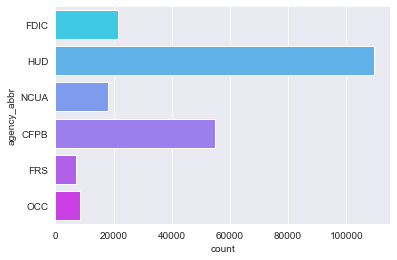

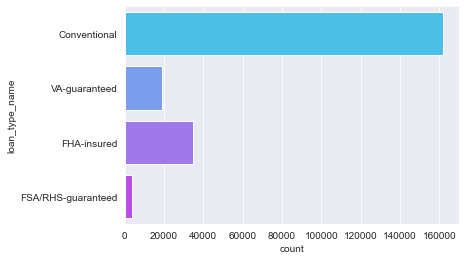

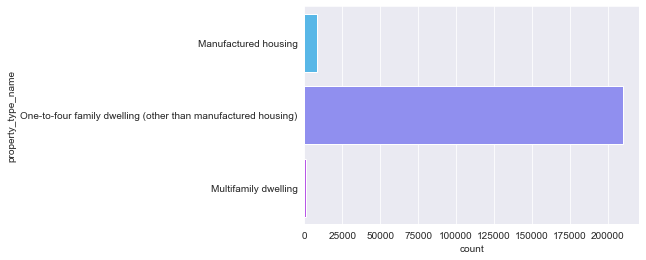

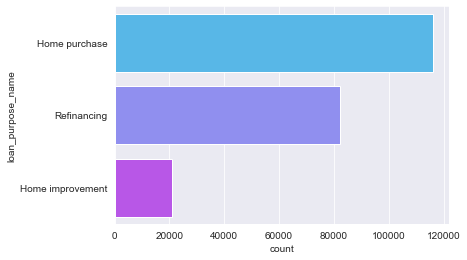

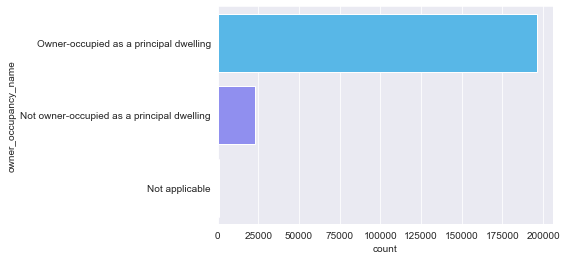

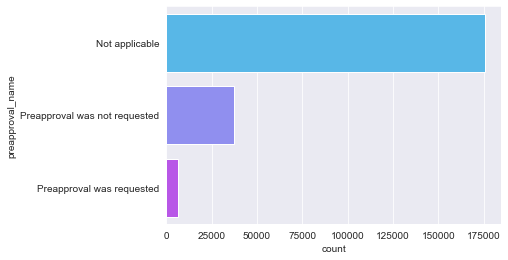

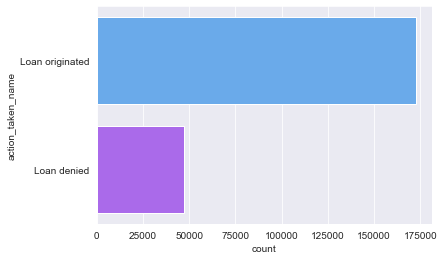

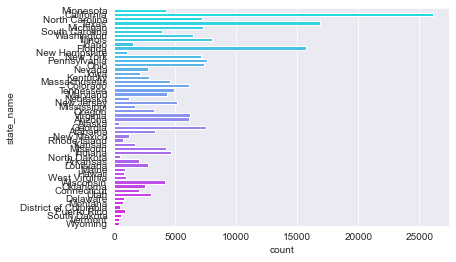

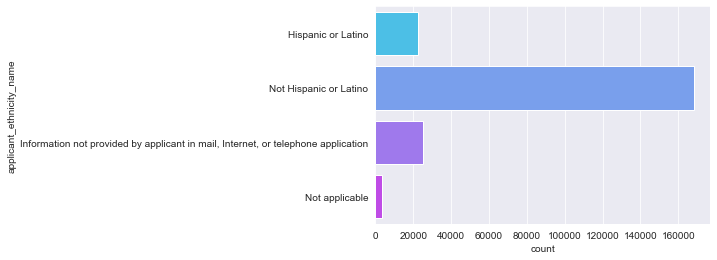

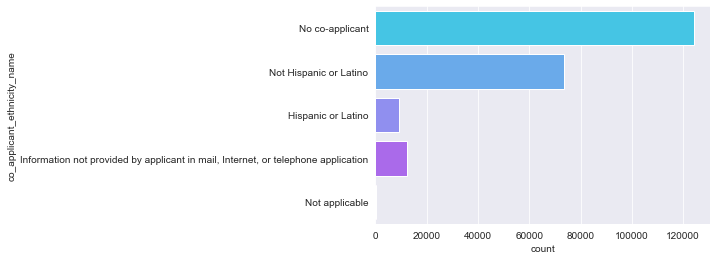

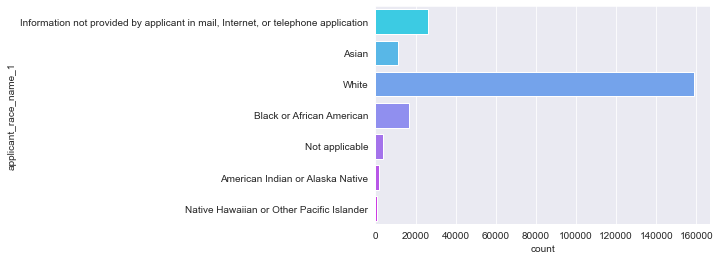

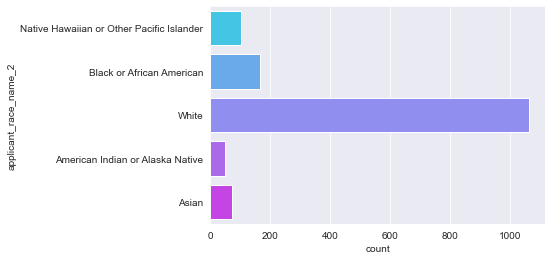

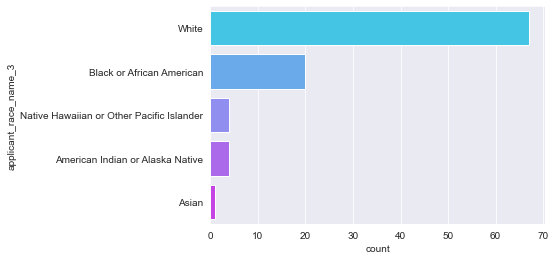

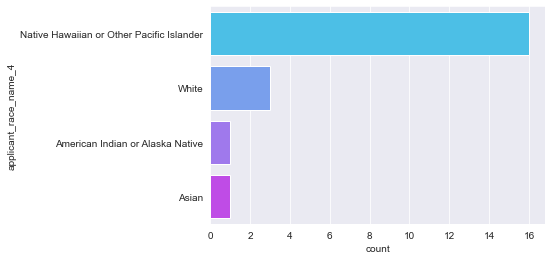

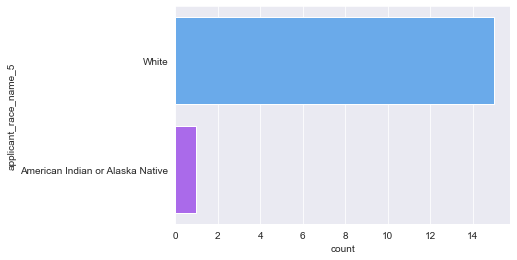

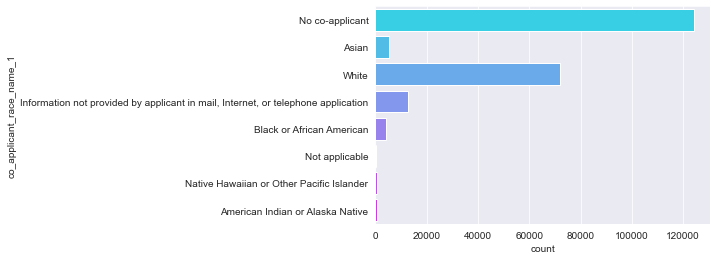

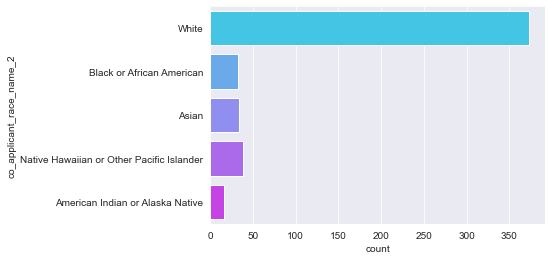

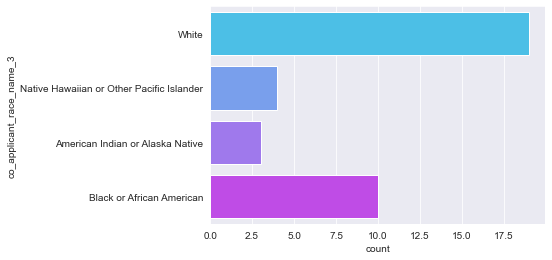

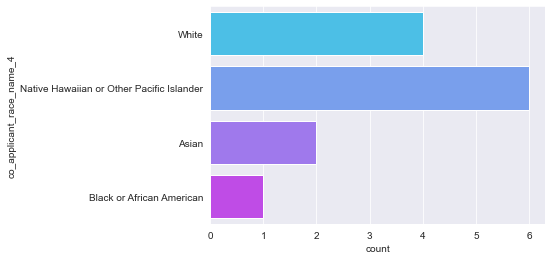

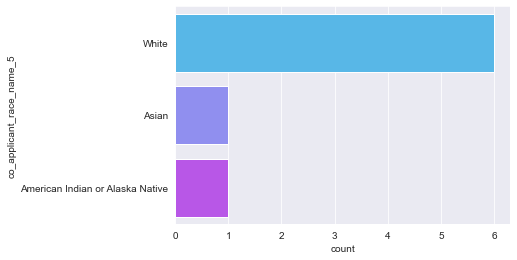

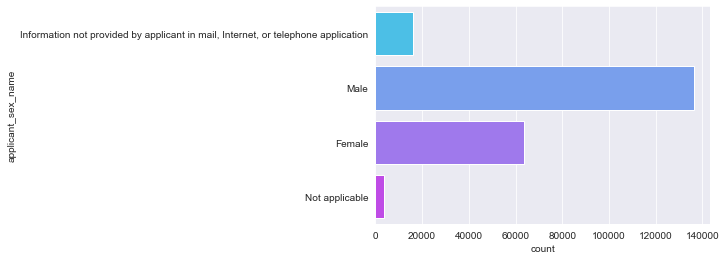

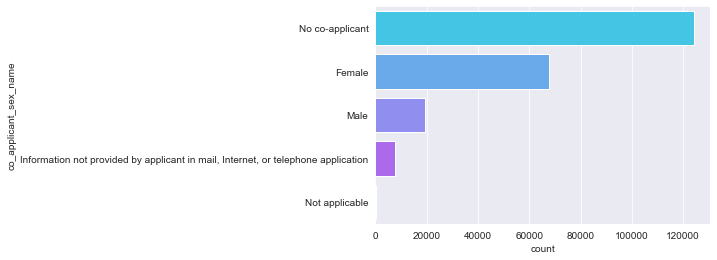

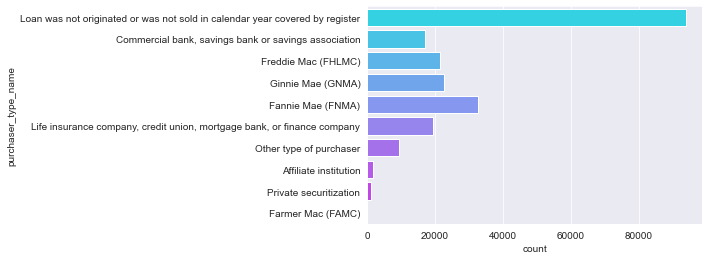

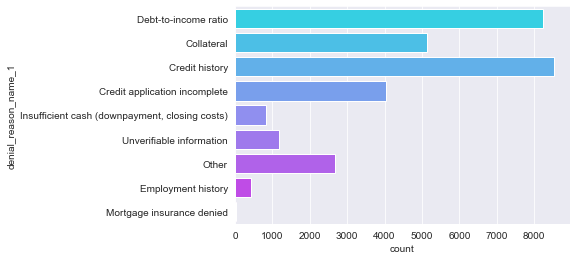

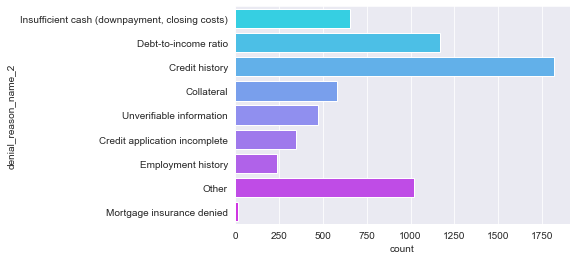

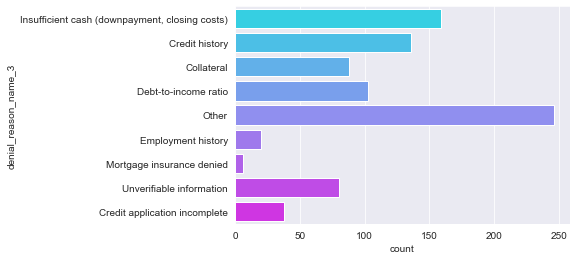

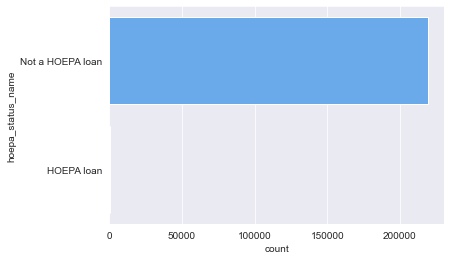

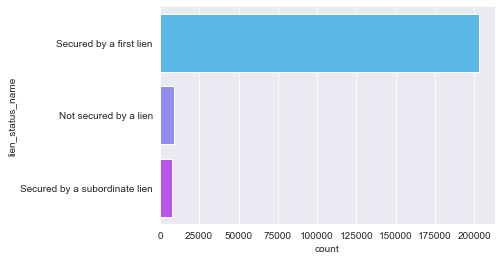

<Figure size 432x288 with 0 Axes>

In [53]:
for i in cat.columns:
    plt.figure()
    sns.countplot(y = df[i], palette='cool')

IndexError: index 0 is out of bounds for axis 0 with size 0

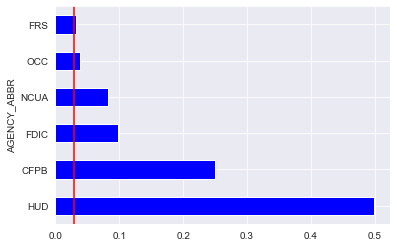

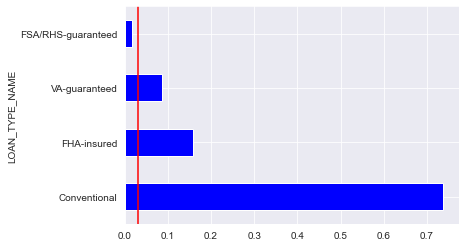

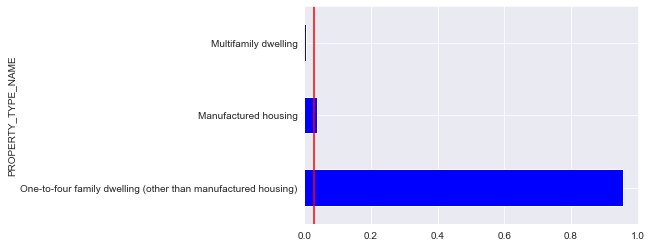

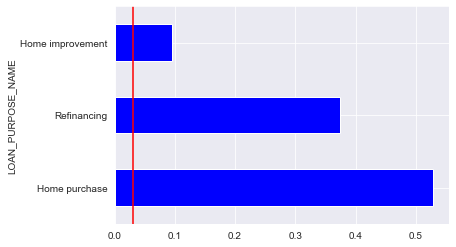

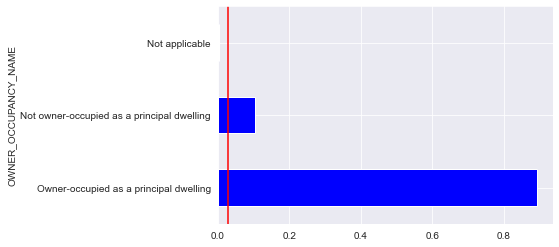

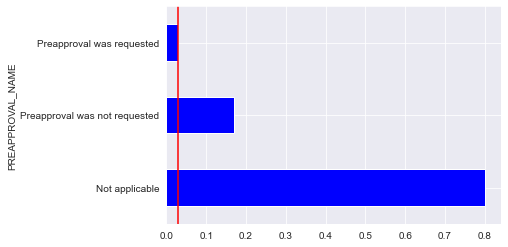

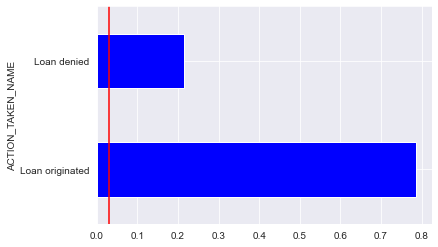

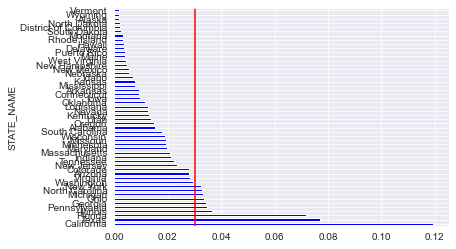

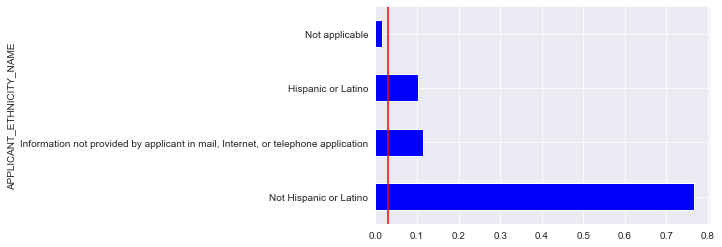

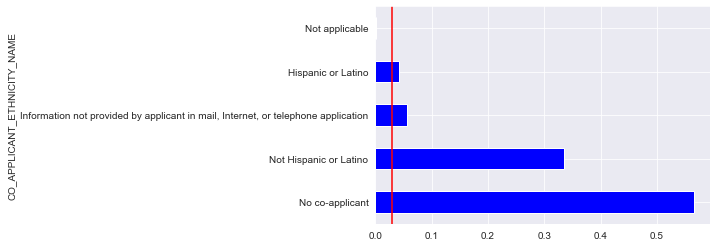

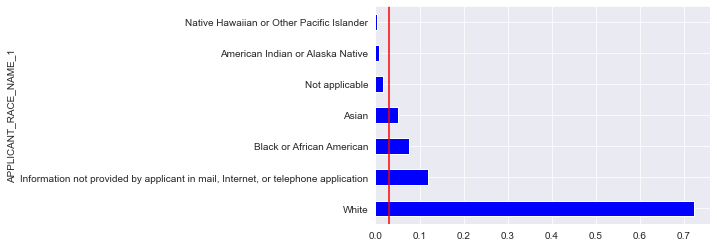

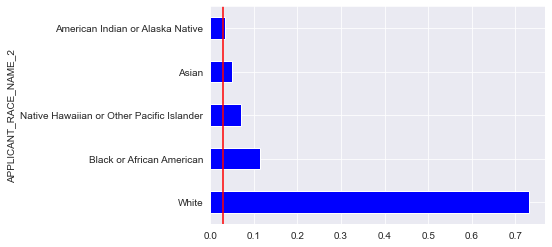

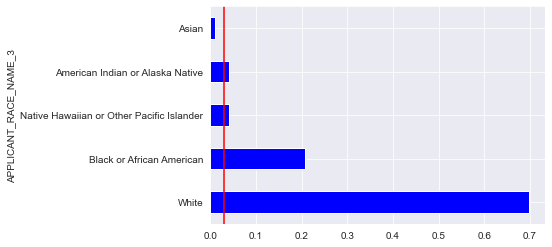

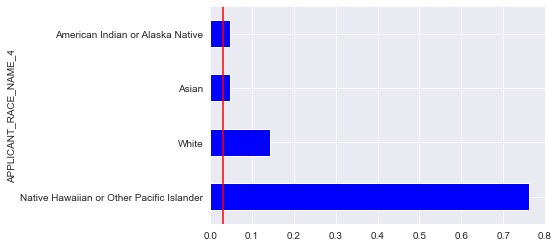

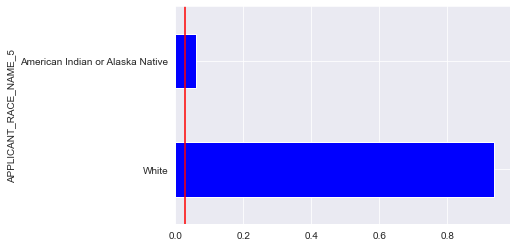

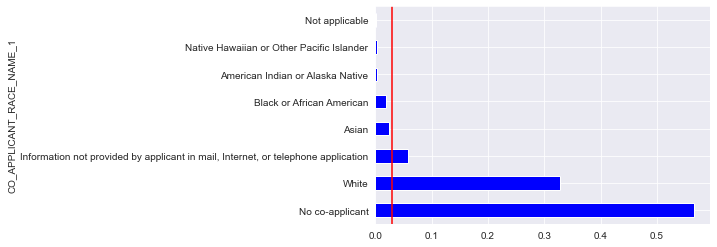

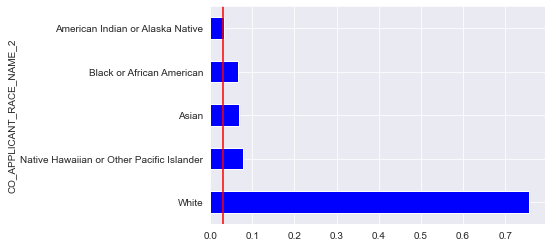

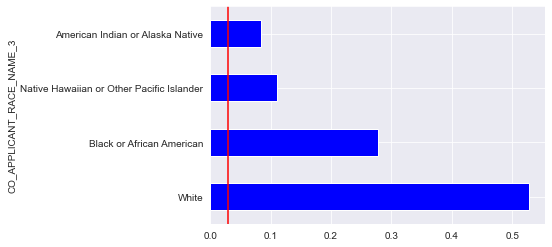

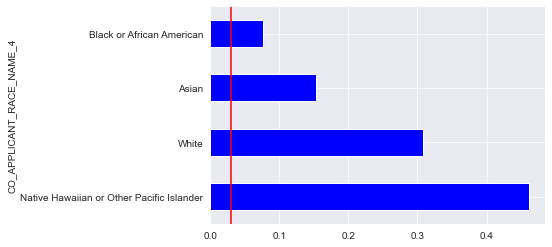

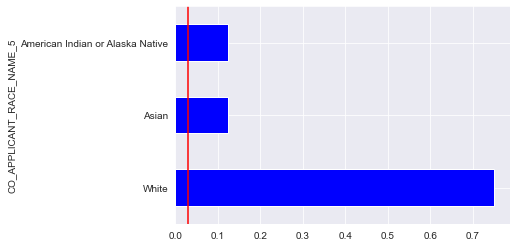

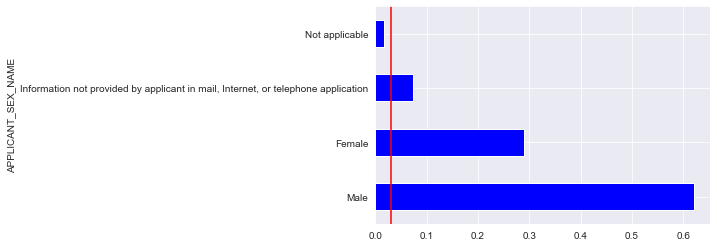

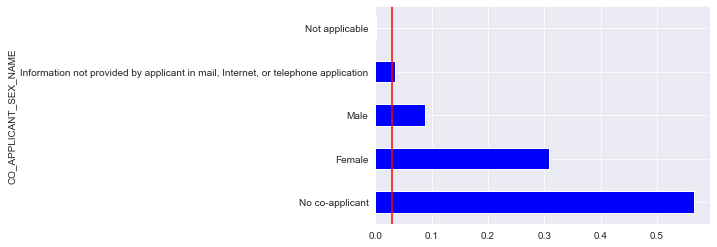

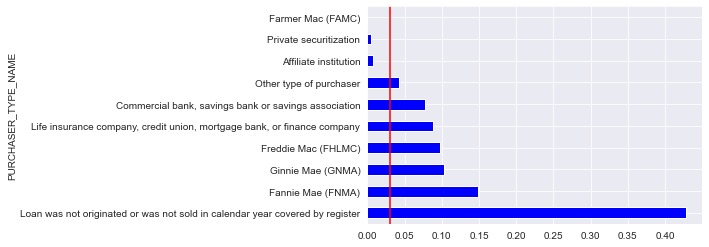

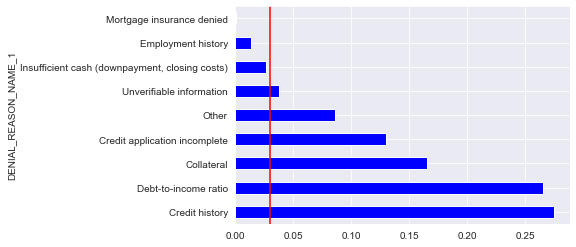

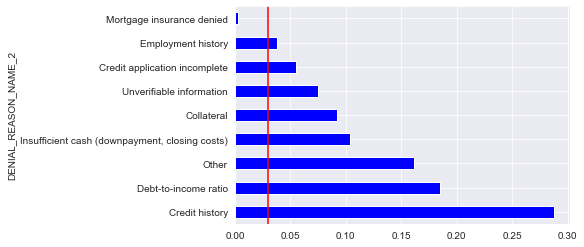

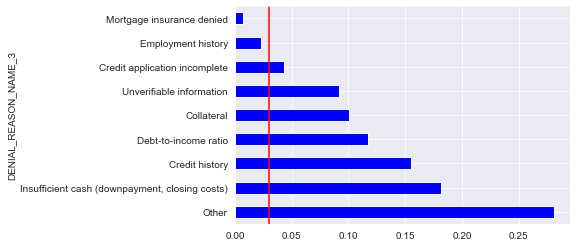

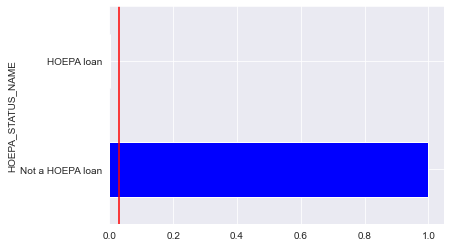

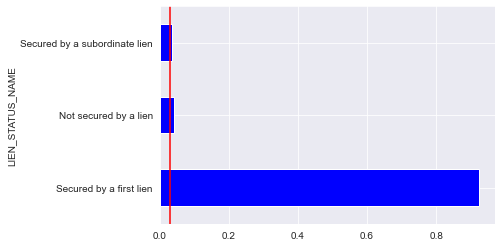

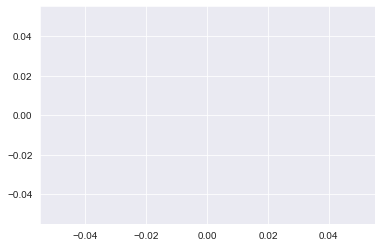

In [62]:
for i in cat.columns:
    plt.figure()
    df[i].value_counts(normalize=True).plot.barh(color='blue')
    plt.ylabel(i.upper())
    plt.axvline(0.03, color='red')

#### Univariate analysis and distribution of numerical columns

In [155]:
num = df.select_dtypes('number')

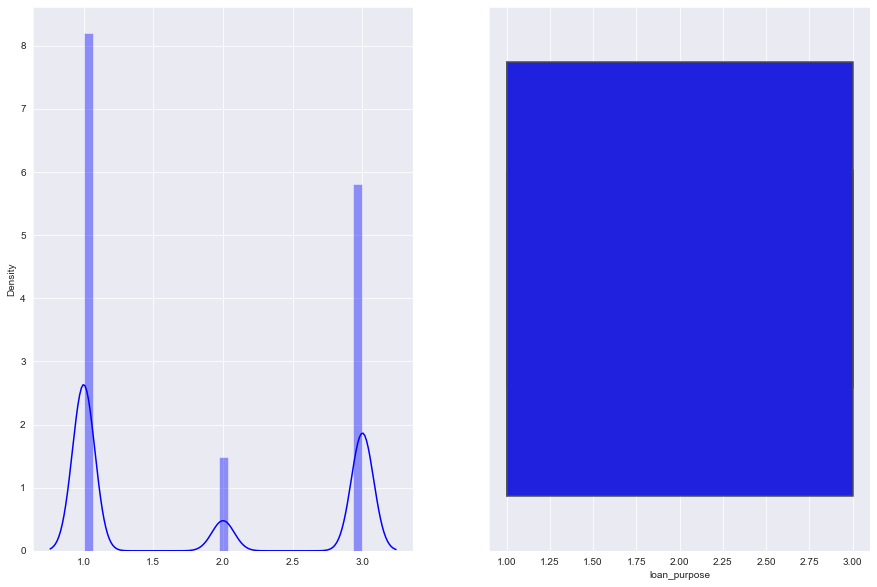

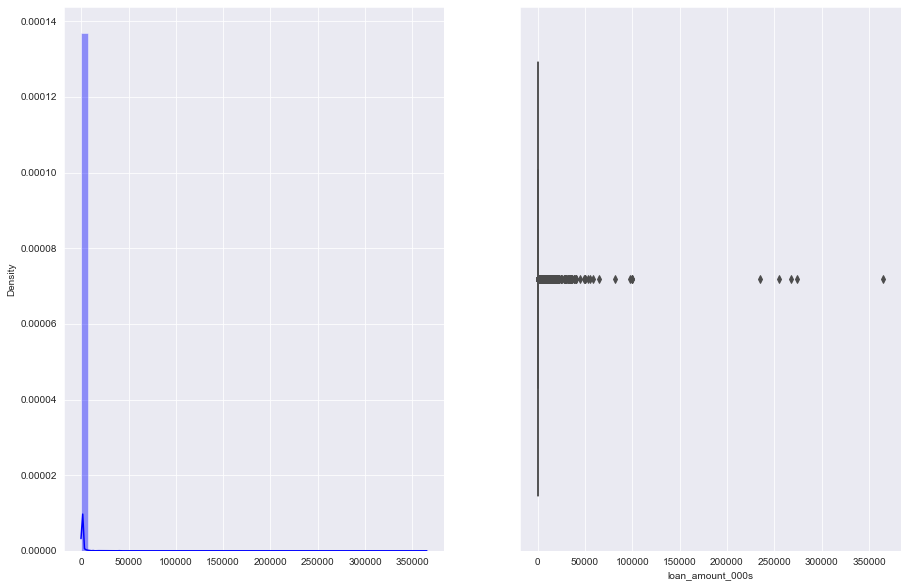

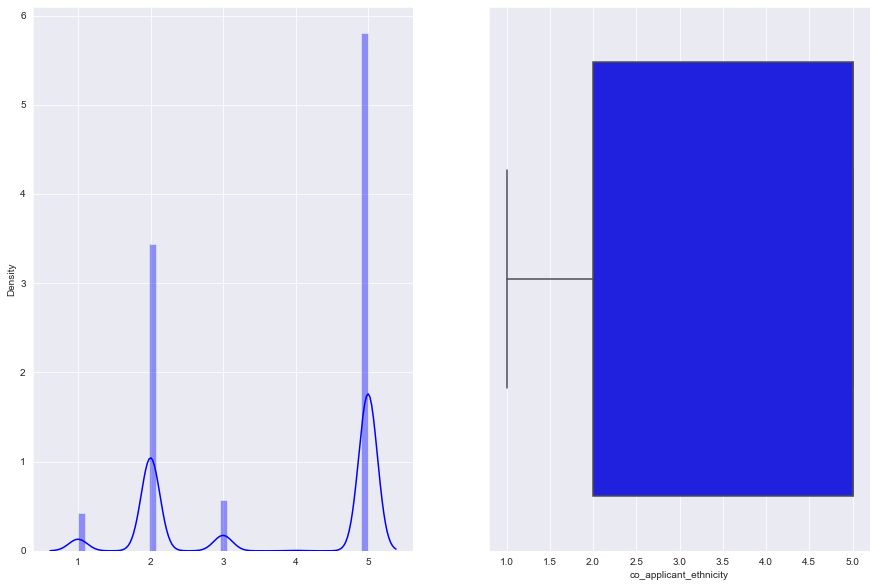

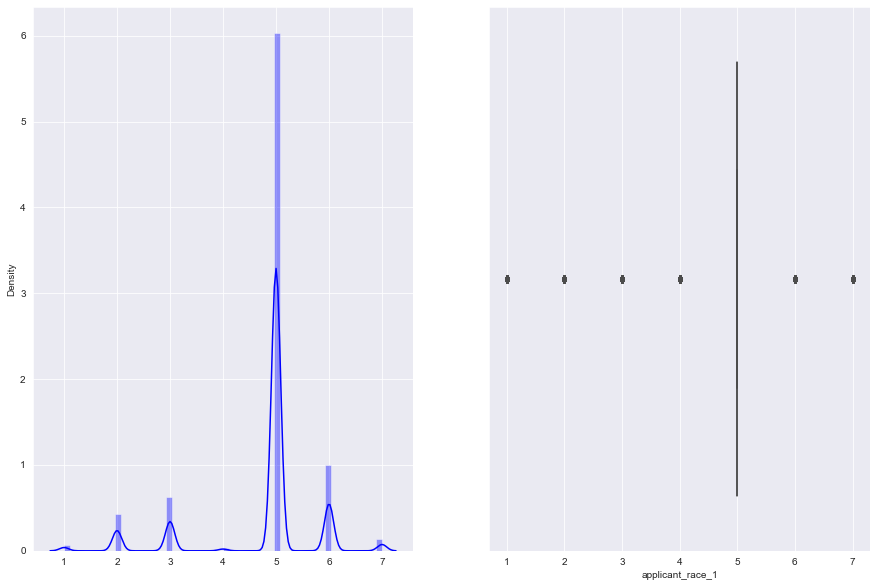

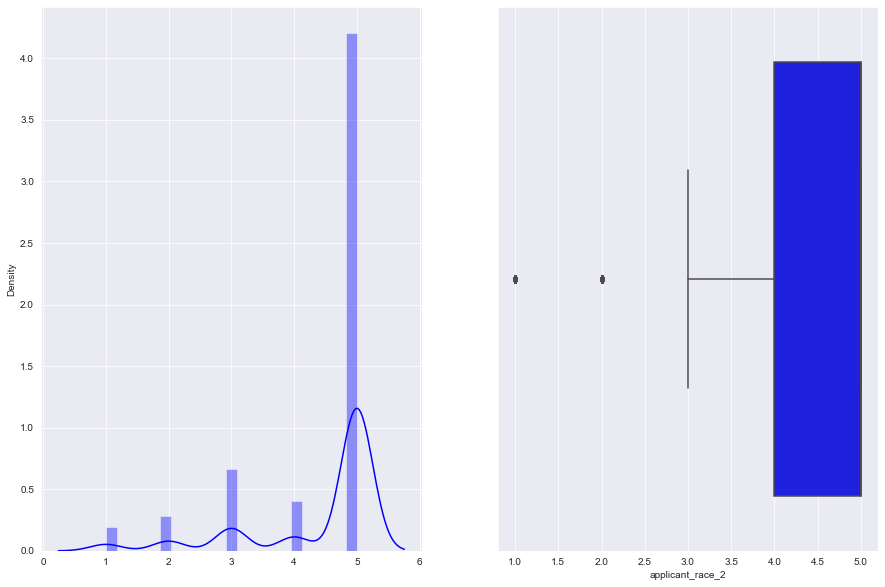

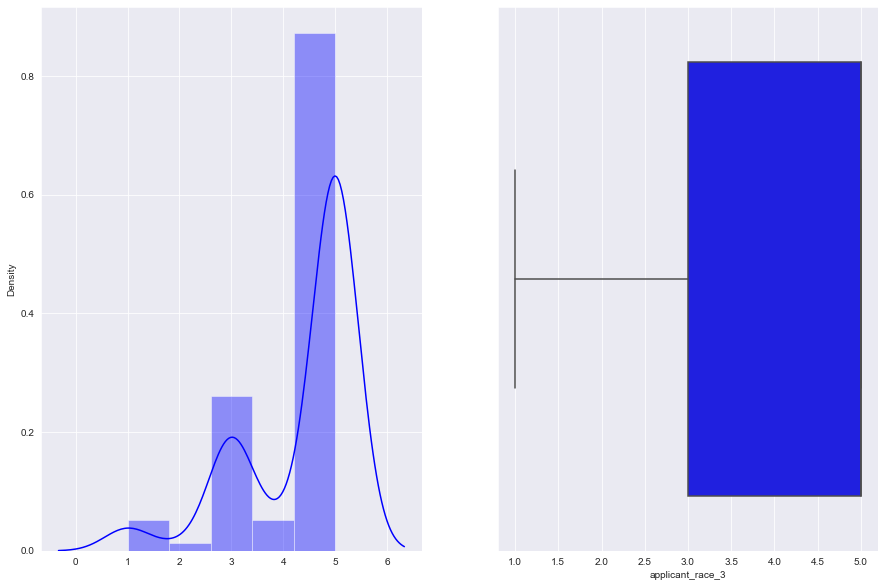

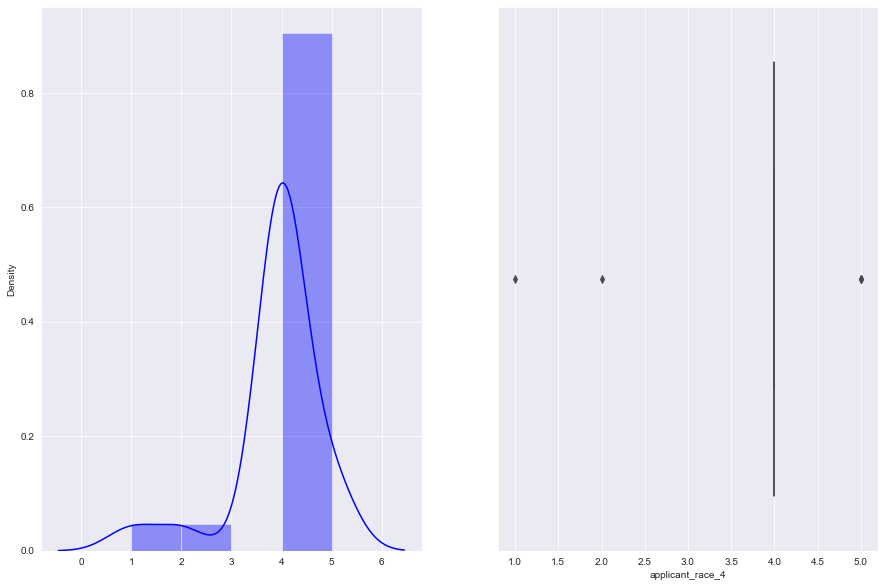

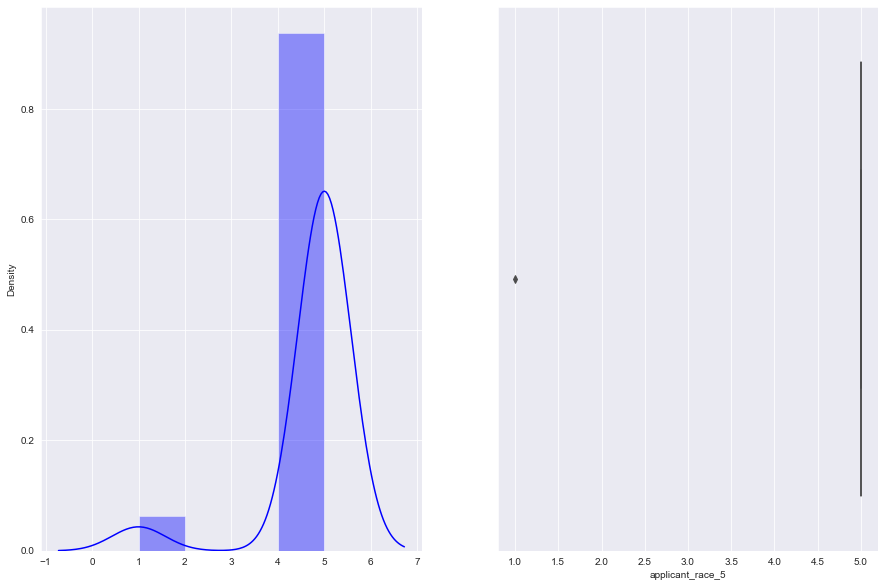

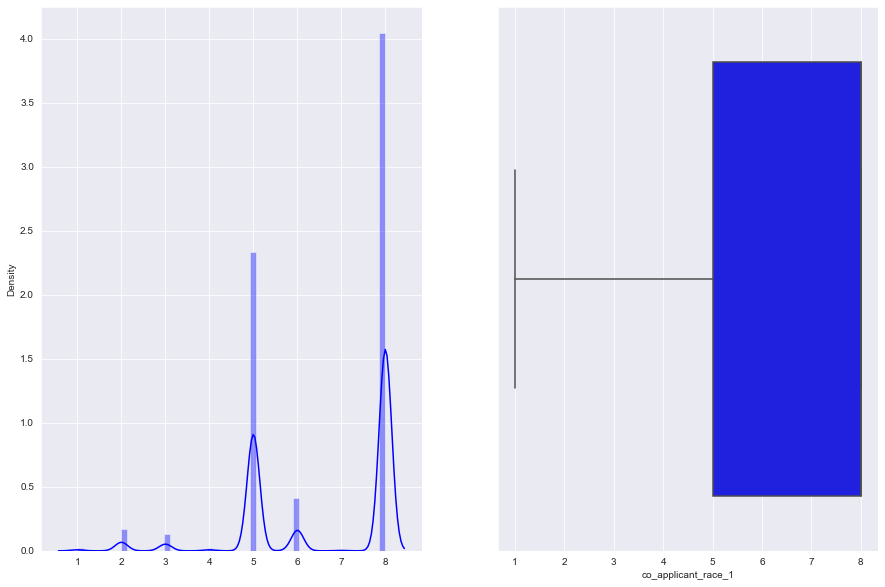

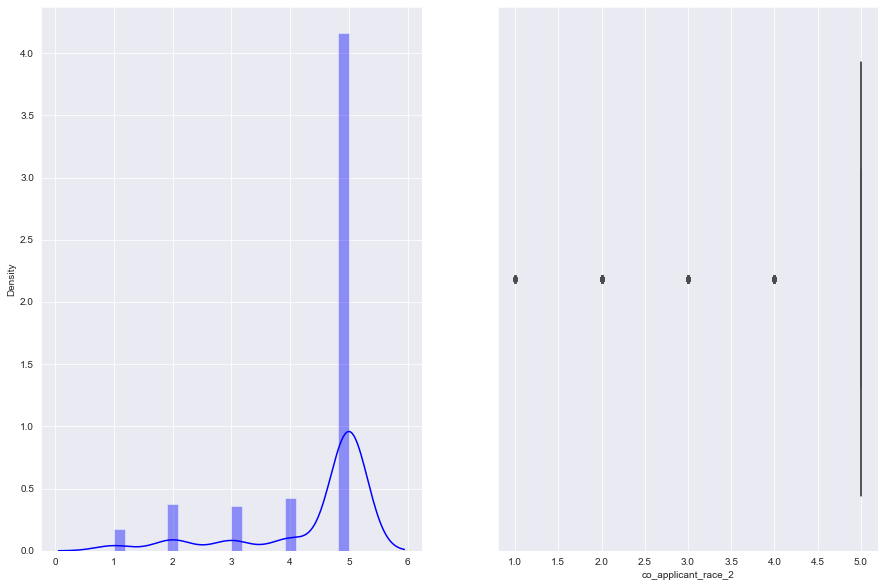

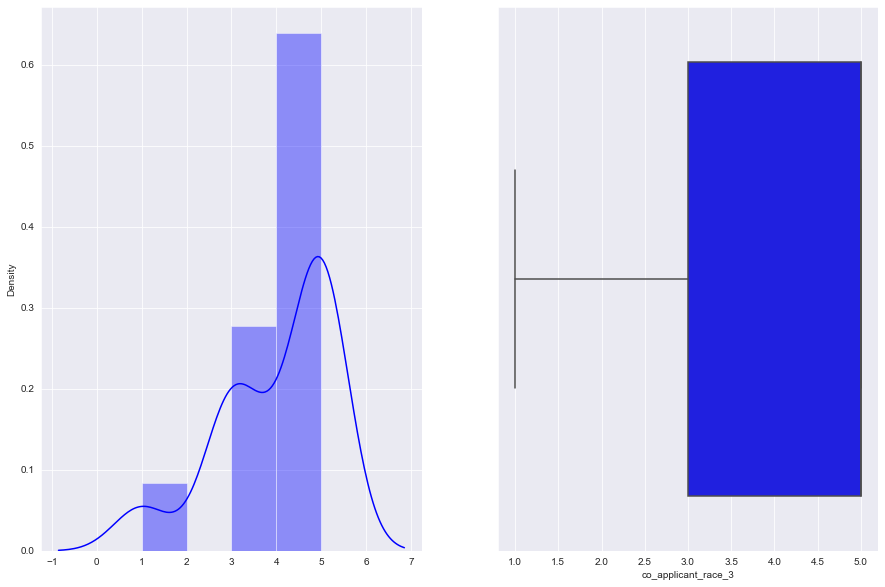

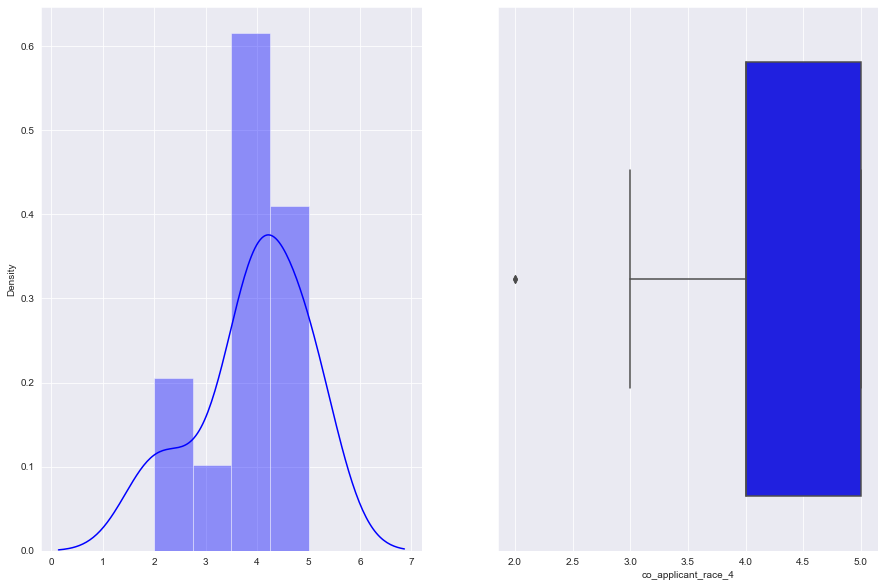

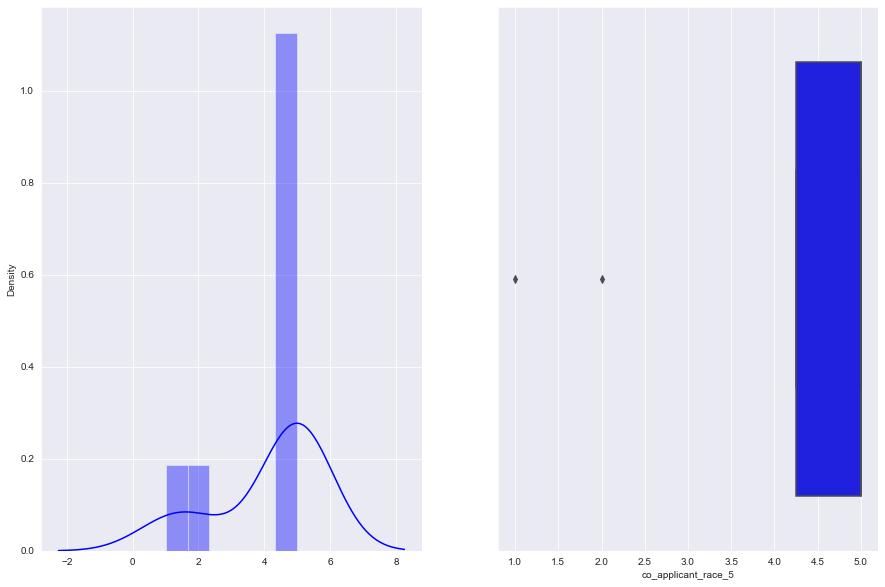

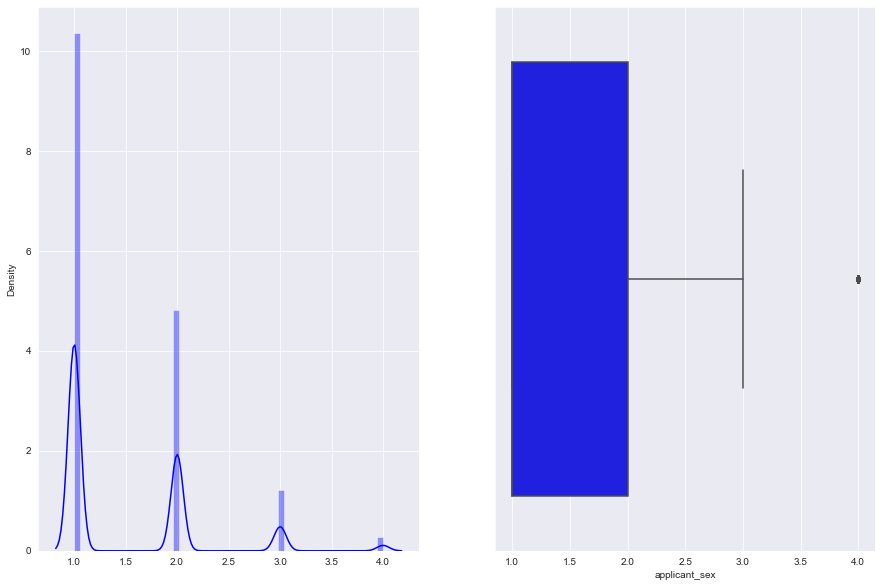

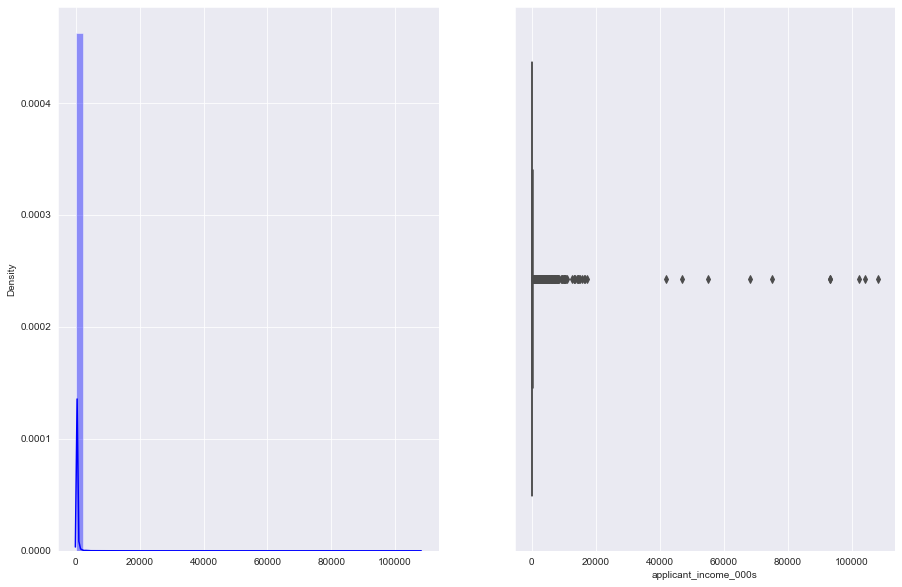

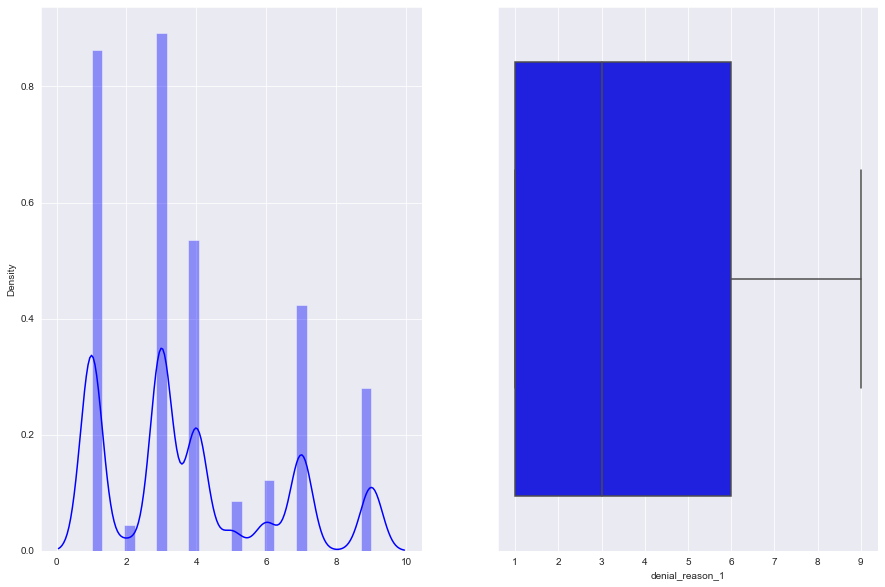

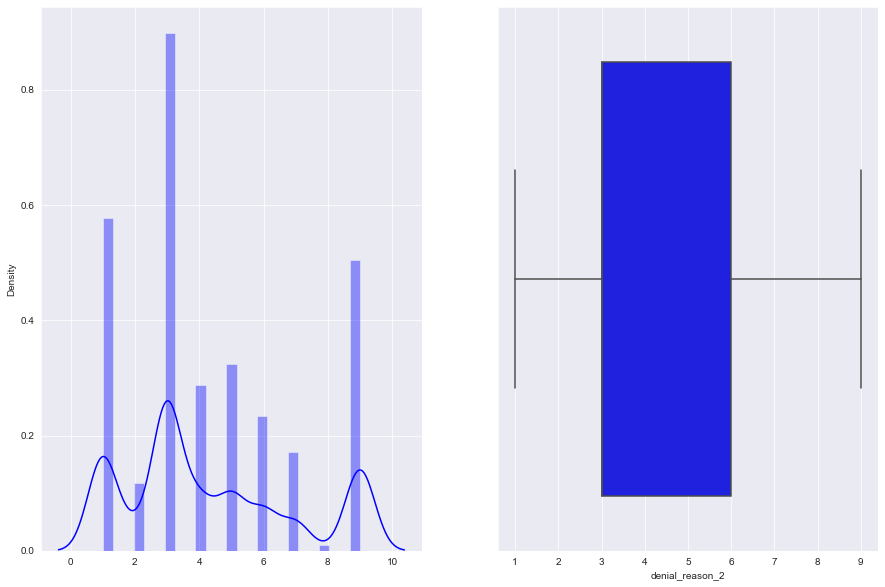

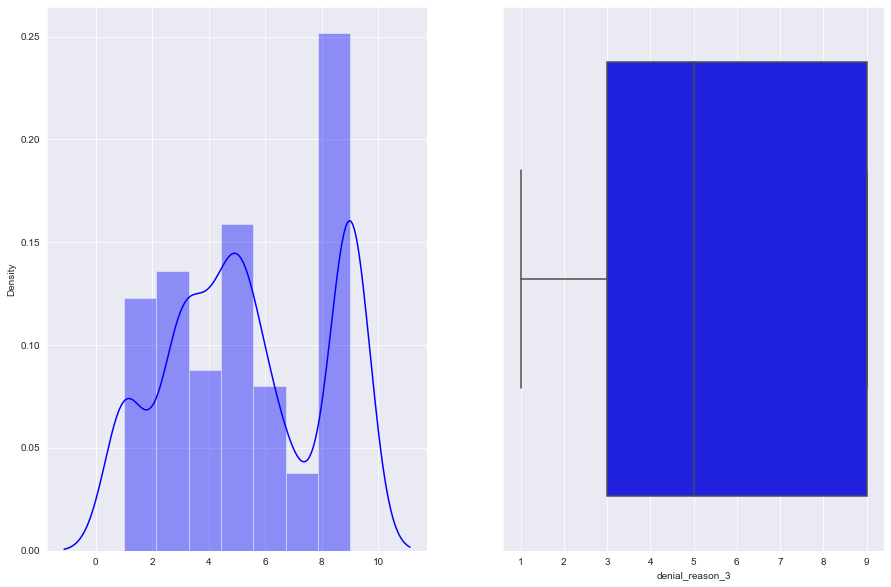

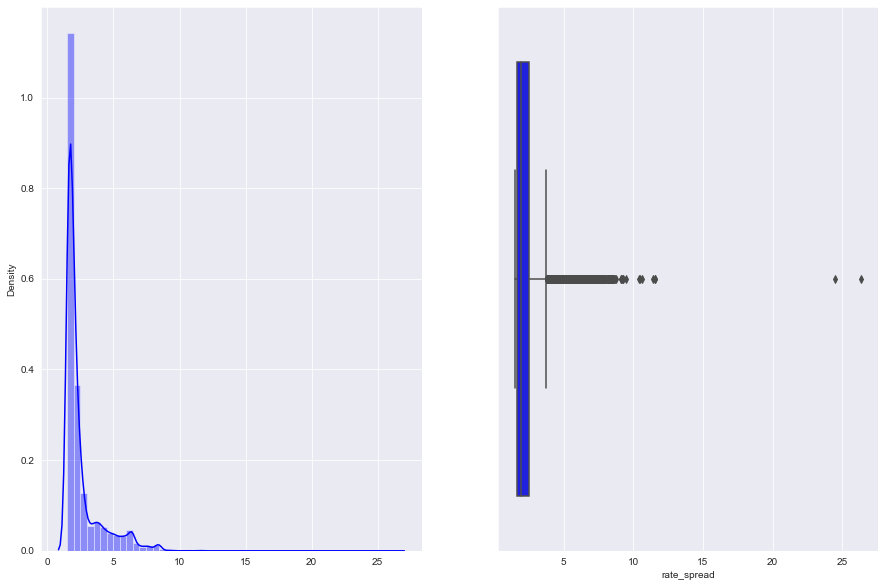

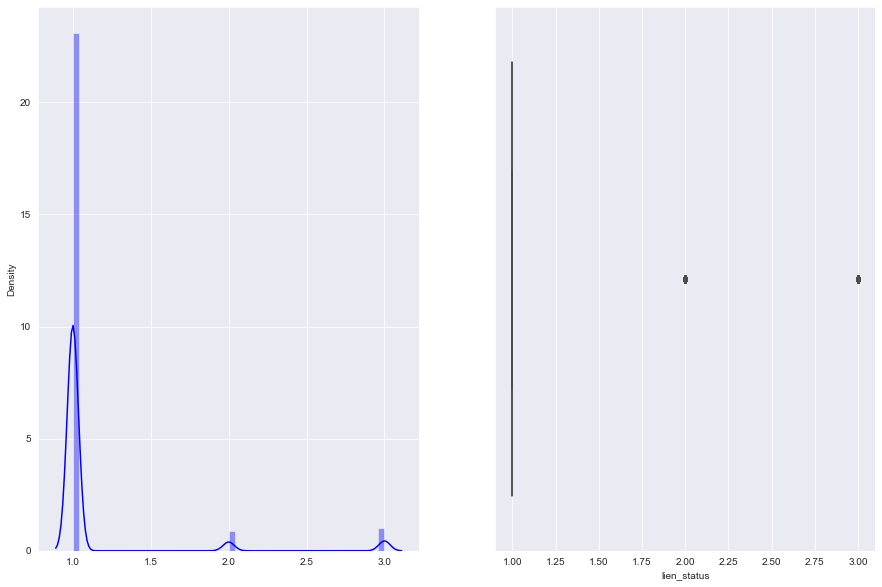

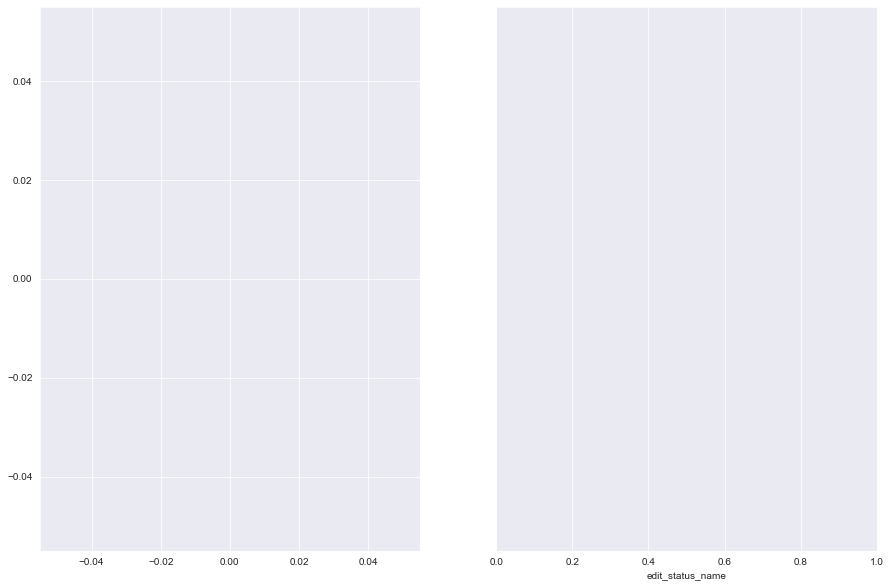

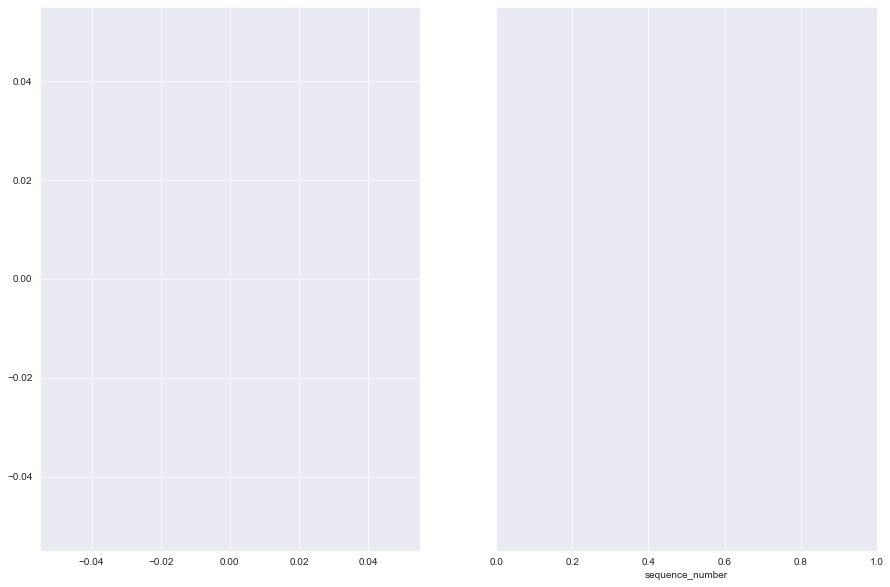

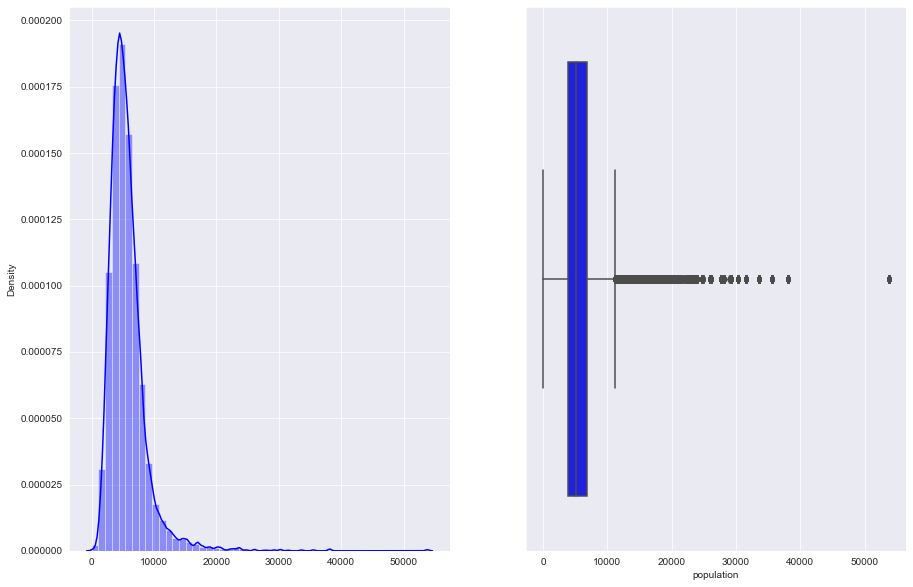

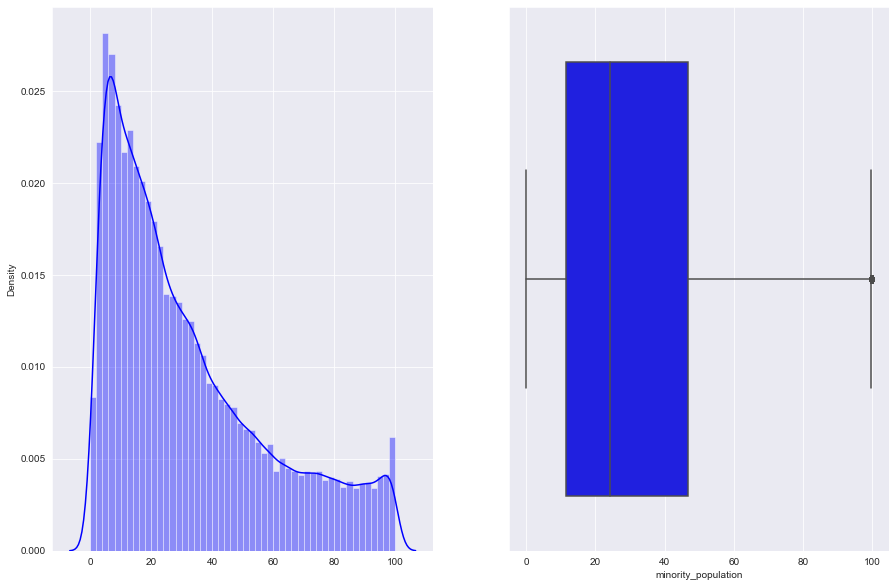

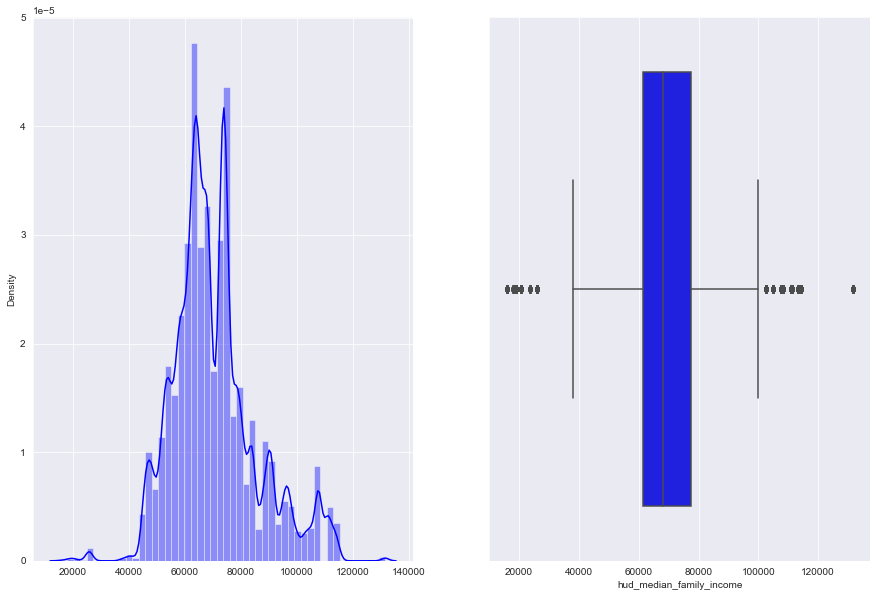

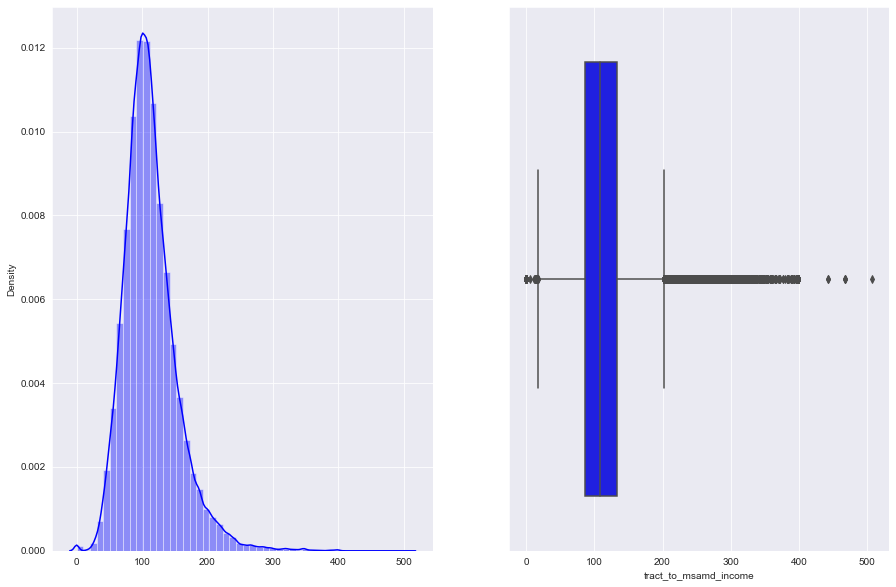

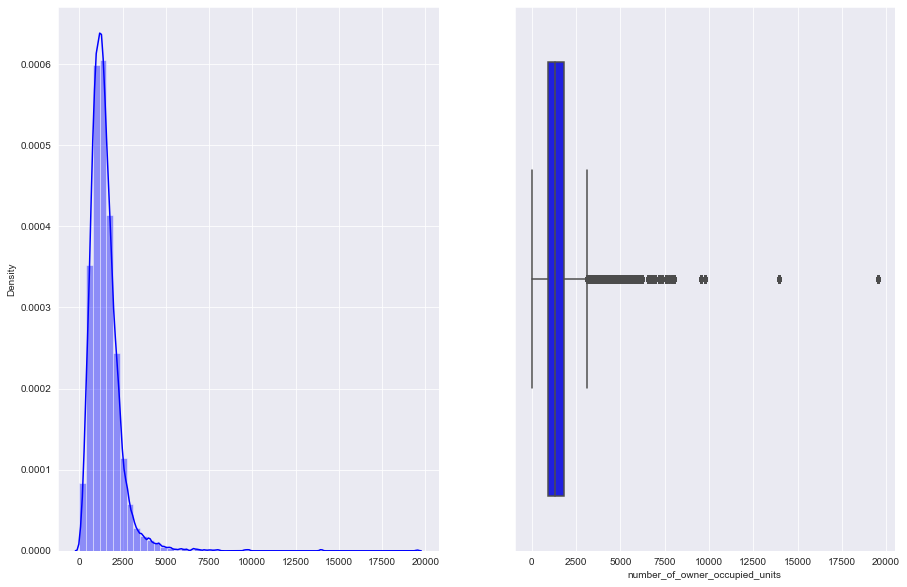

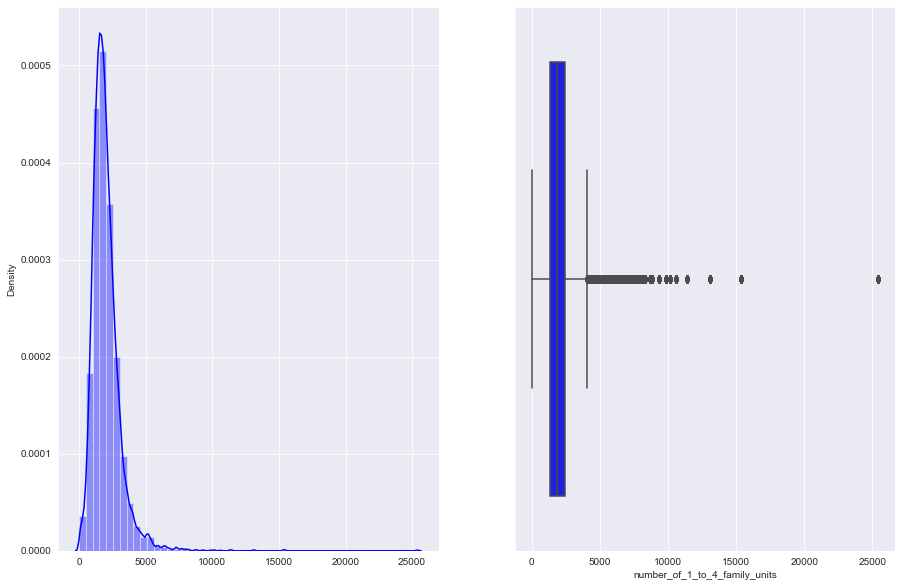

In [63]:
for i in num:
    plt.figure(figsize=(15,10))
    
    plt.subplot(121)
    sns.distplot(x=df[i], kde=True, color='blue')
    
    plt.subplot(122)
    sns.boxplot(x = df[i], color='blue')

#### Bivariate analysis - numerical relationship with target variable

In [64]:
target = 'action_taken_name'

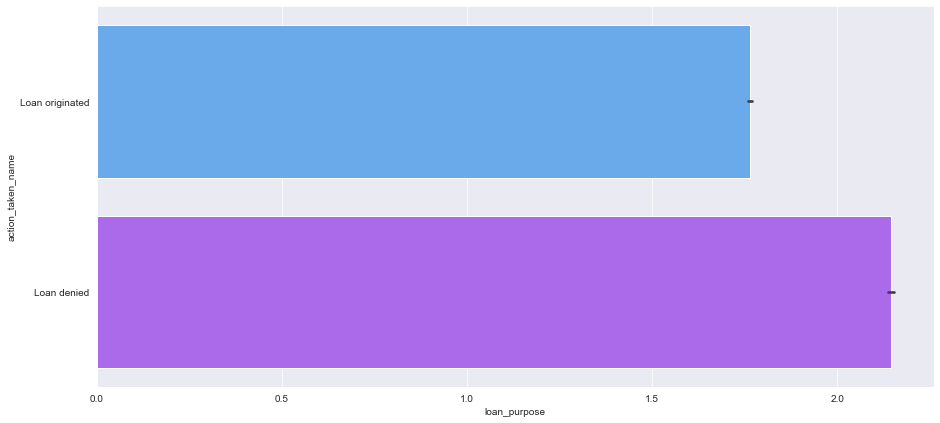

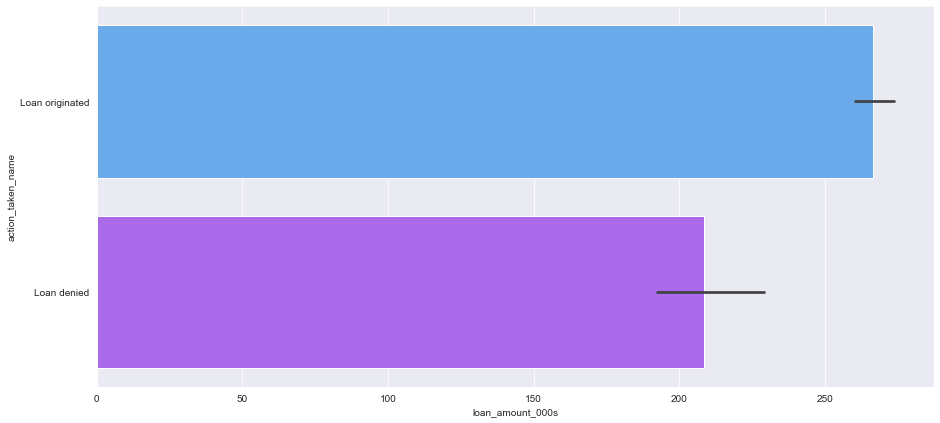

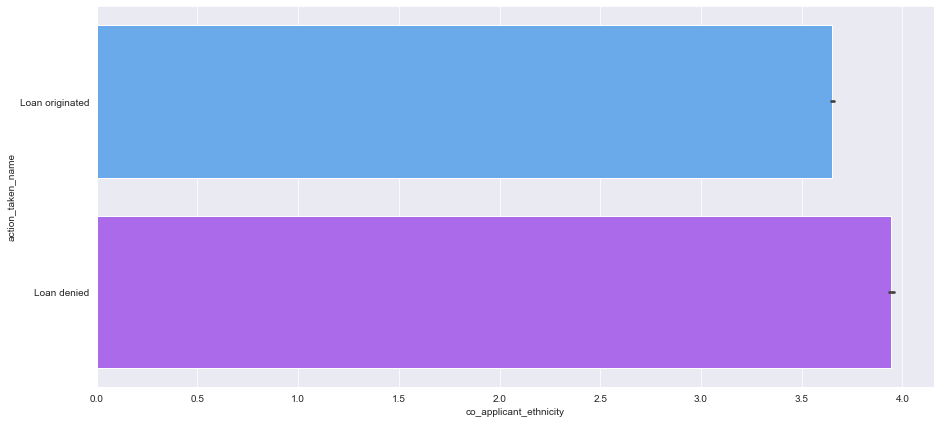

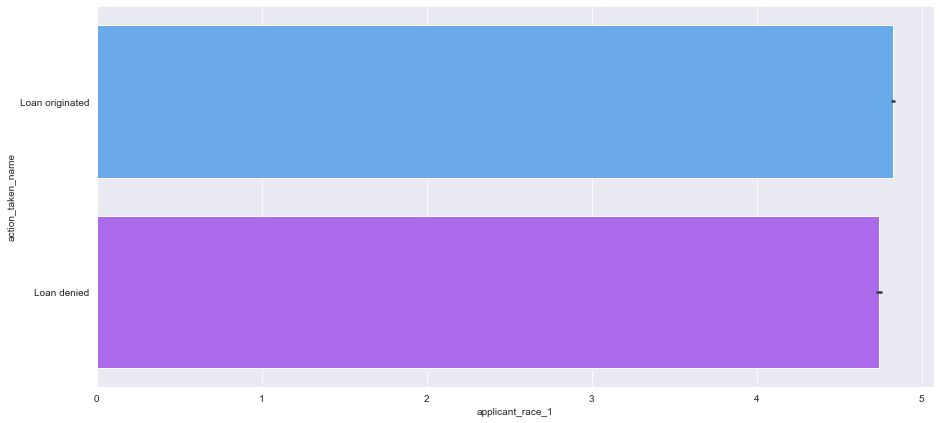

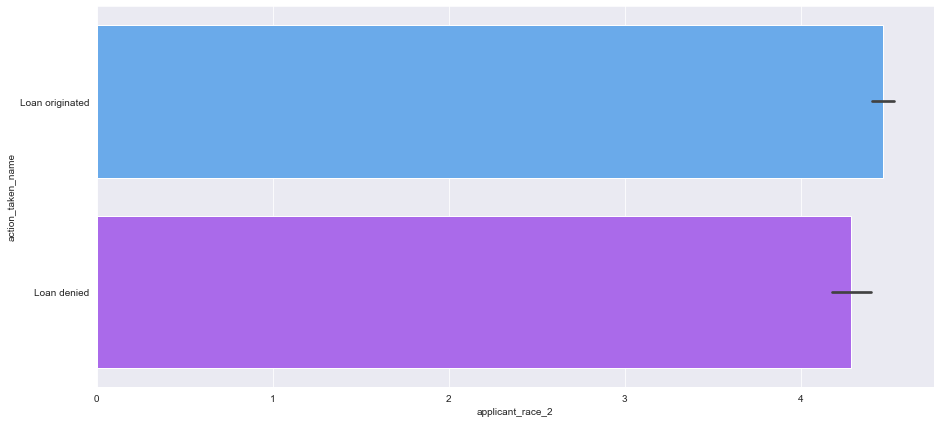

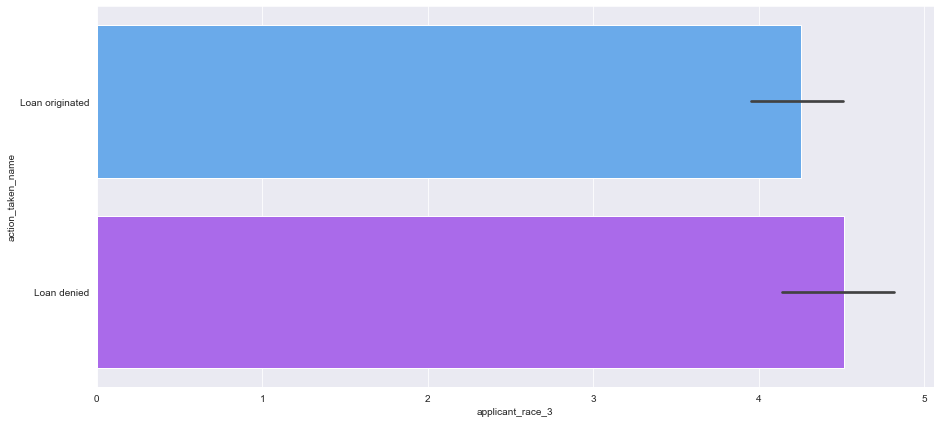

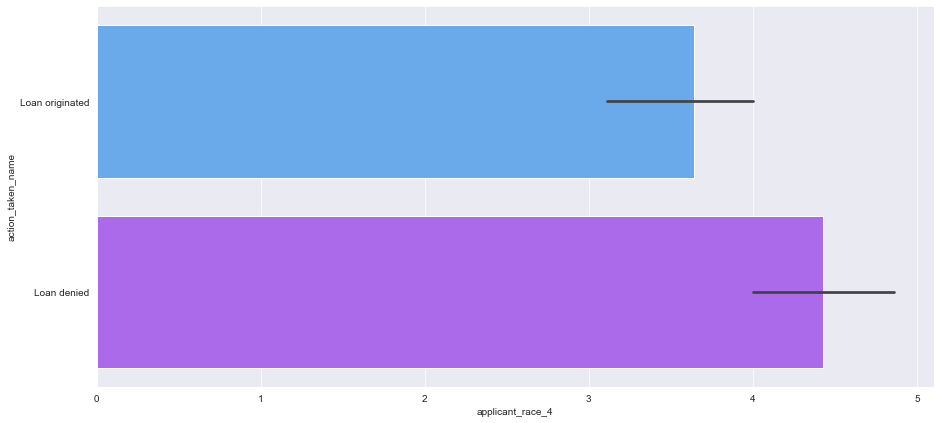

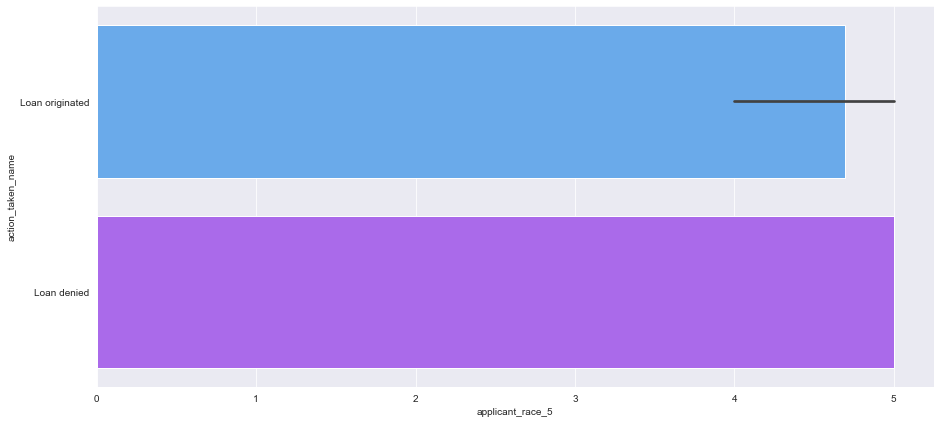

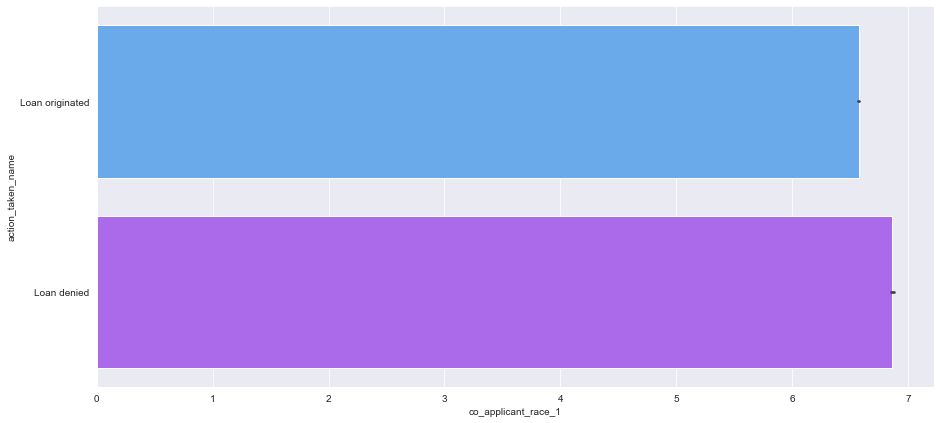

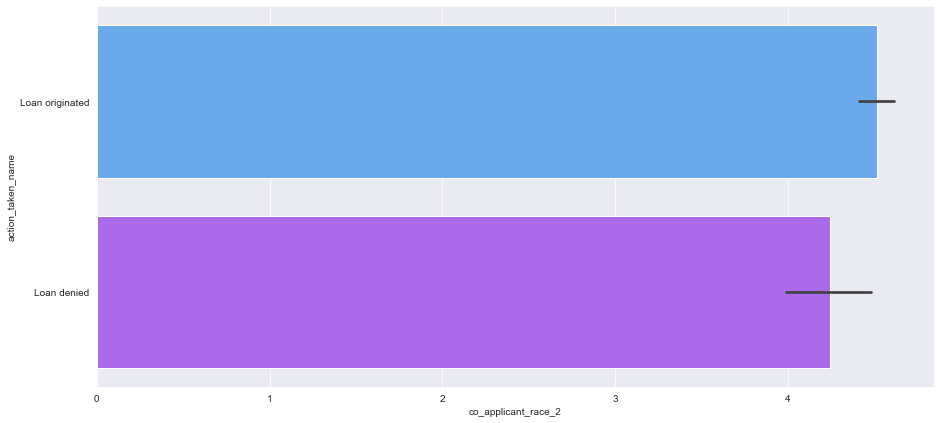

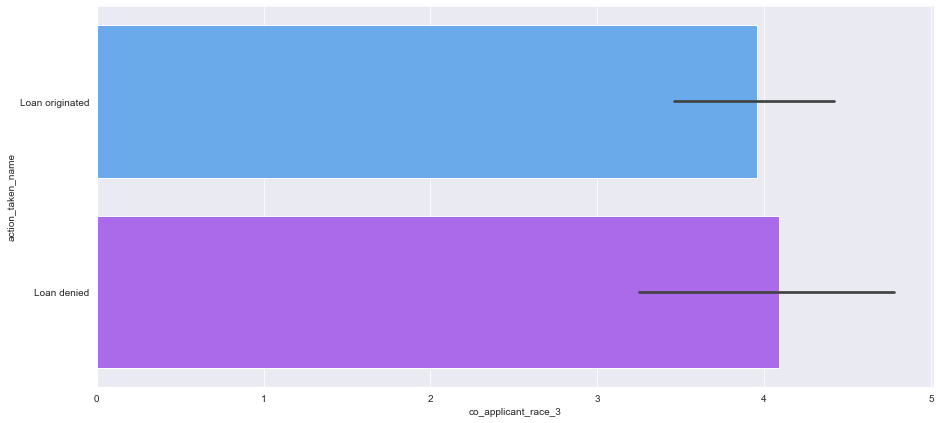

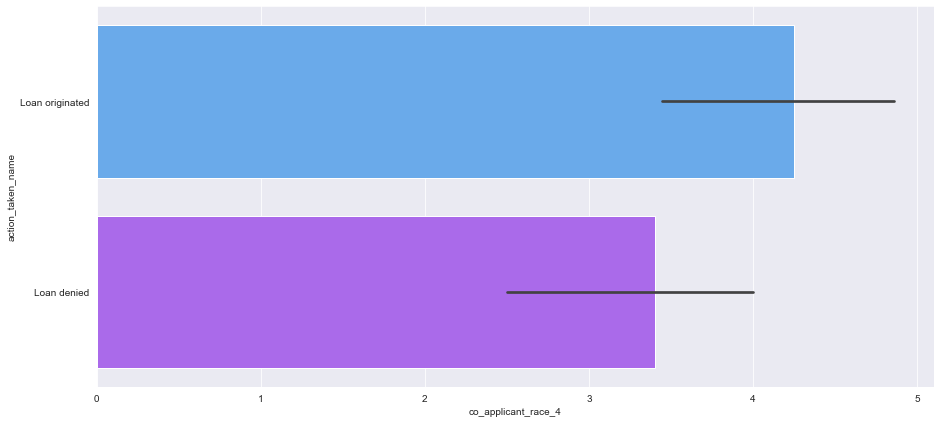

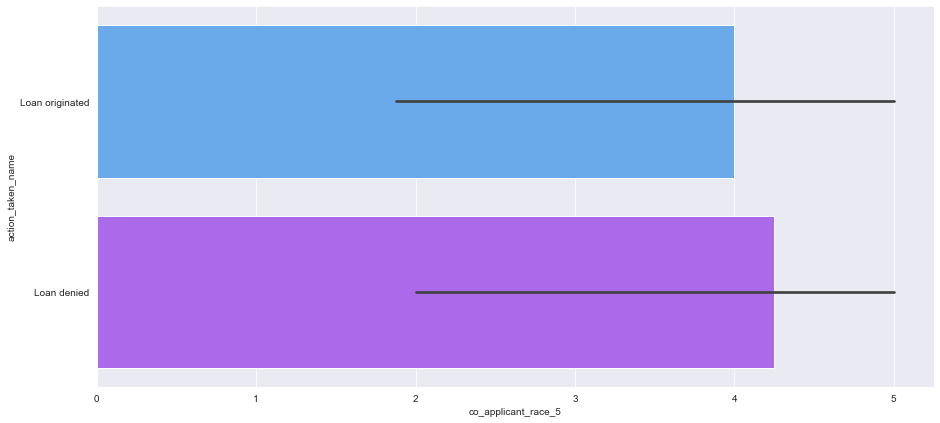

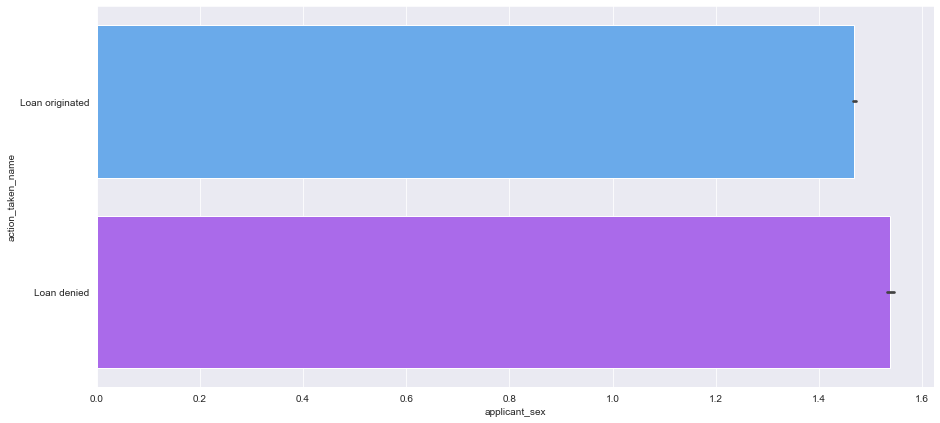

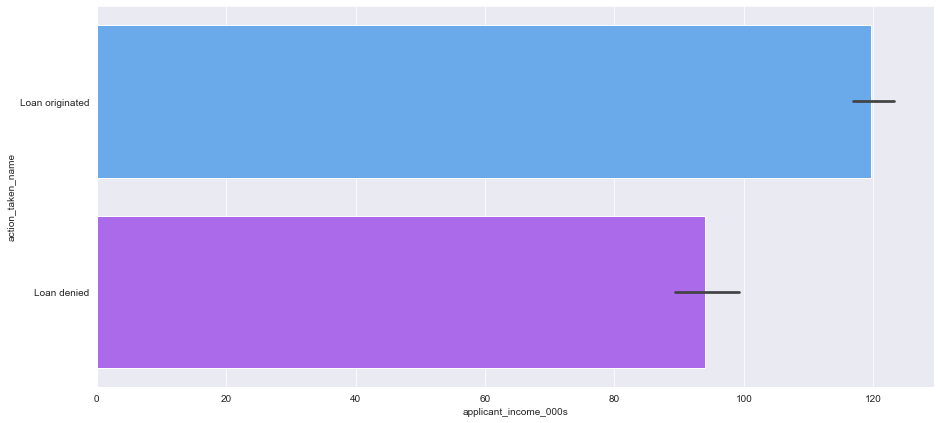

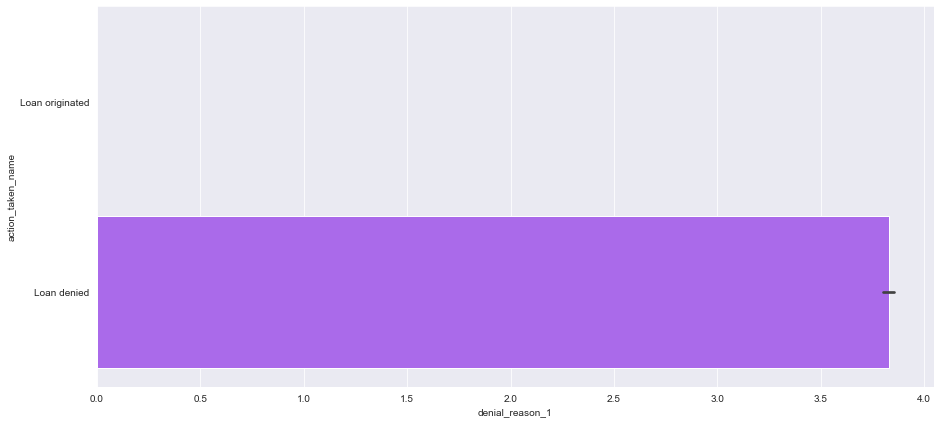

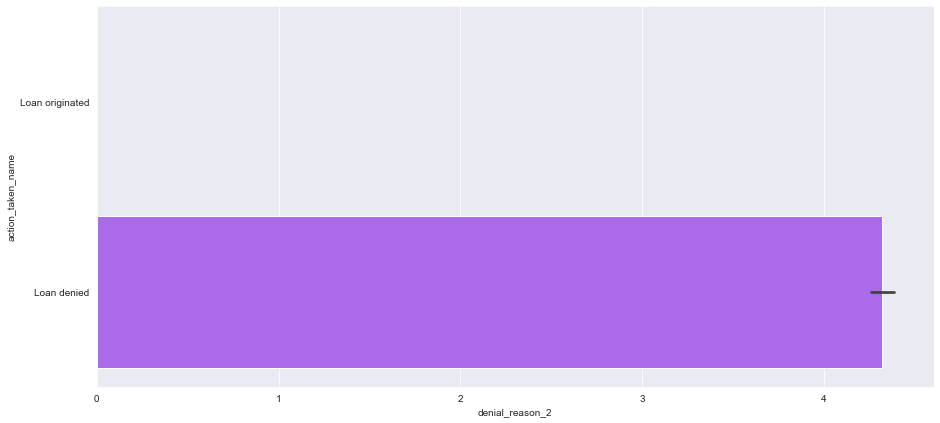

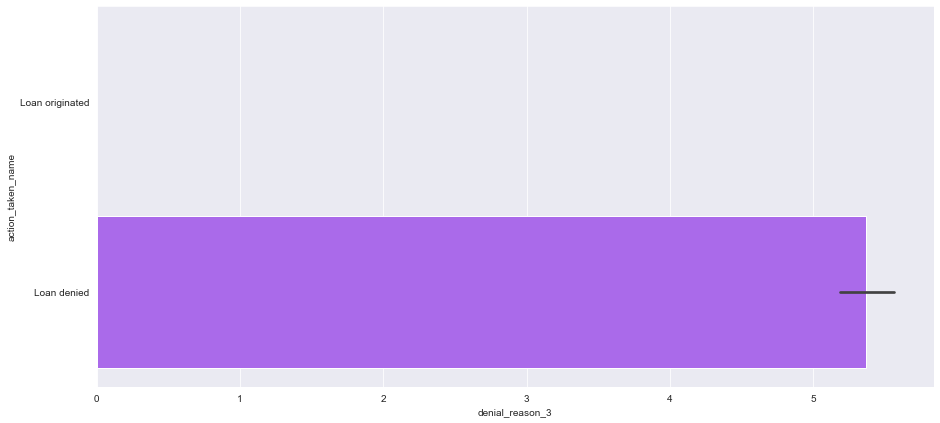

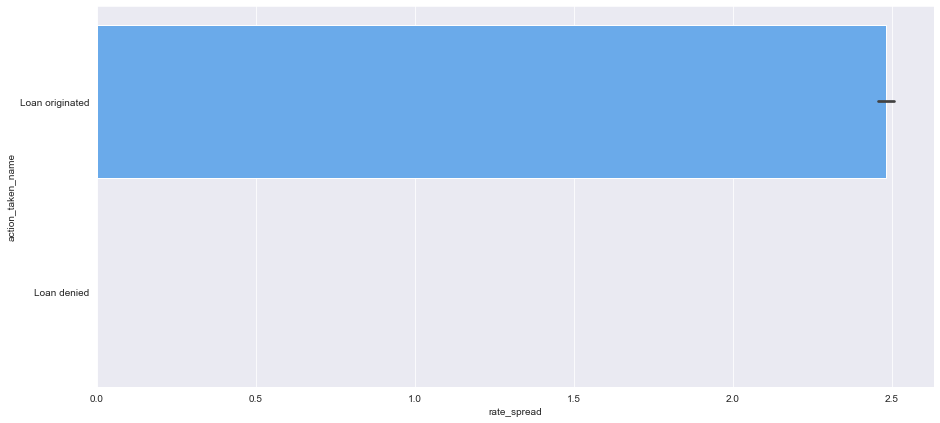

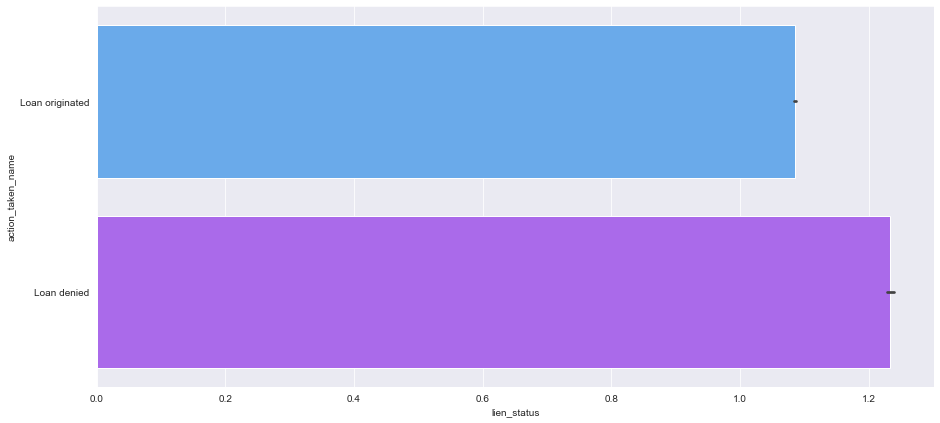

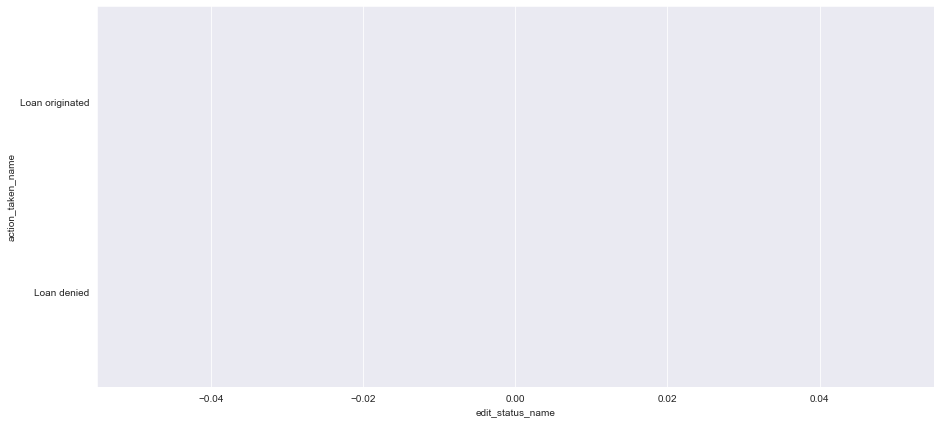

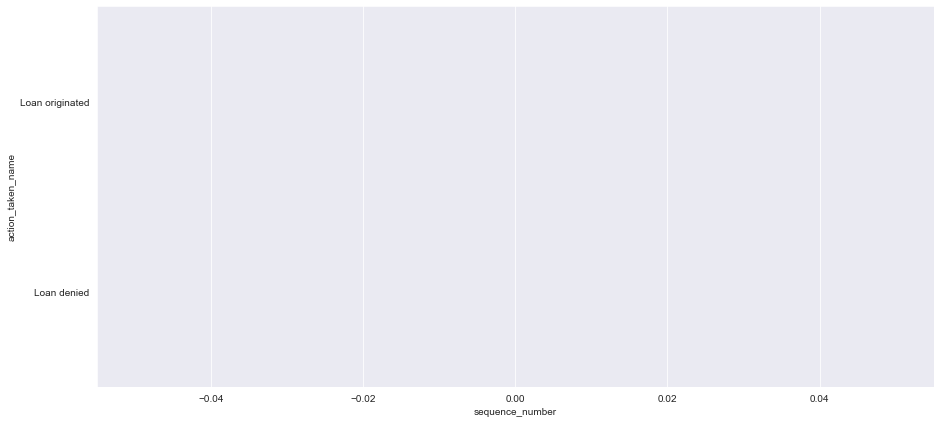

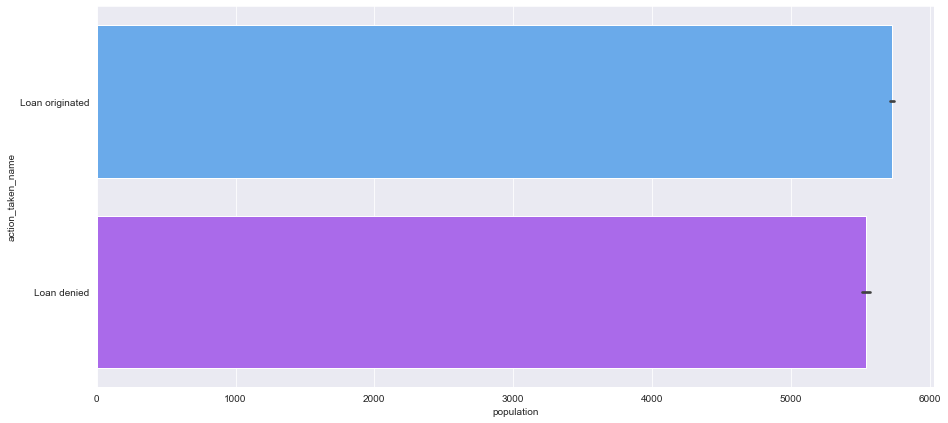

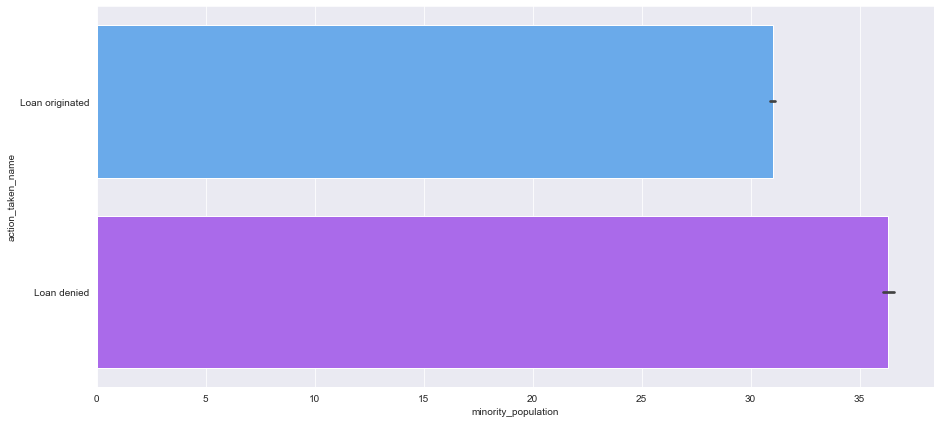

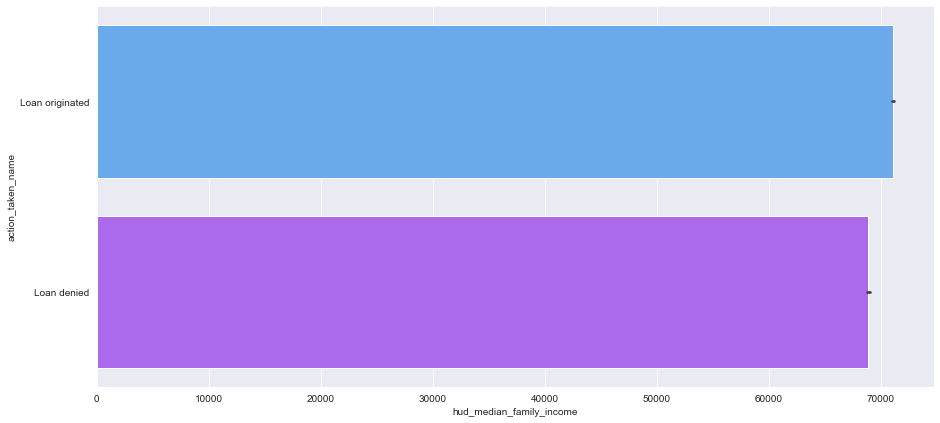

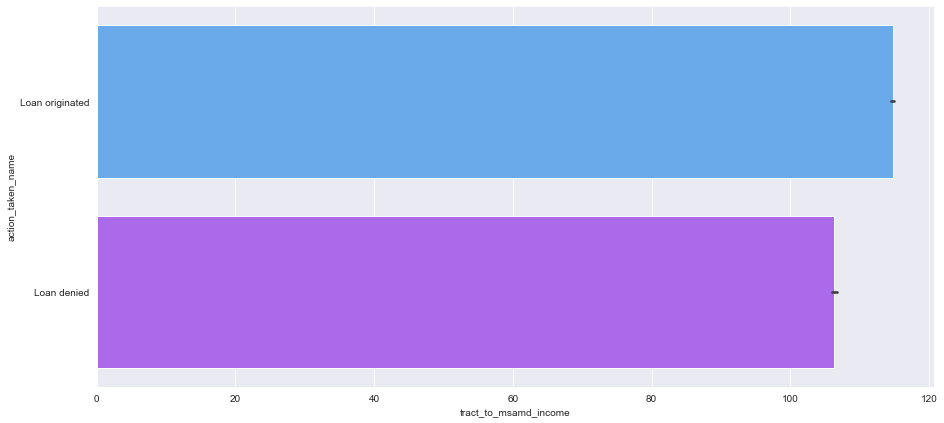

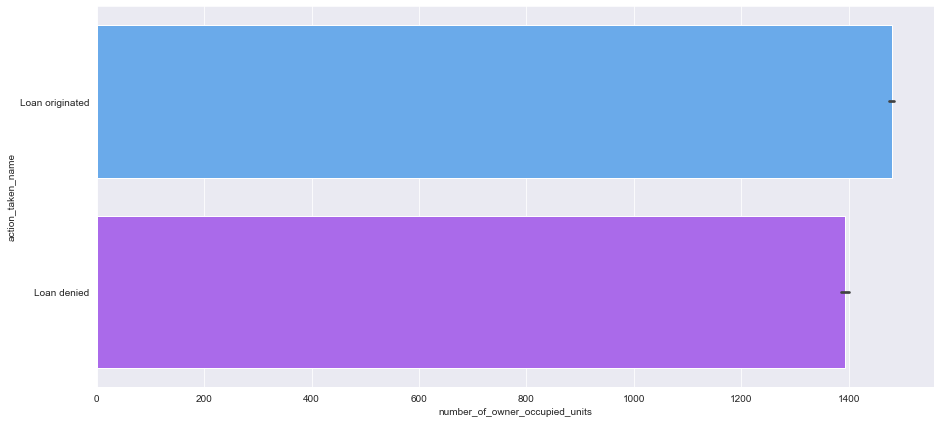

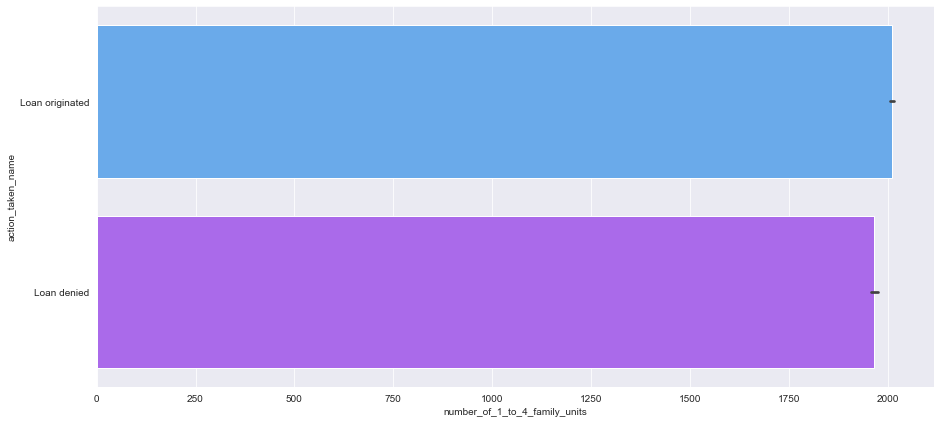

In [68]:
for i in num:
    plt.figure(figsize = (15,7))
    
    sns.barplot(x = df[i], y = df[target], palette='cool')
    
    plt.show()

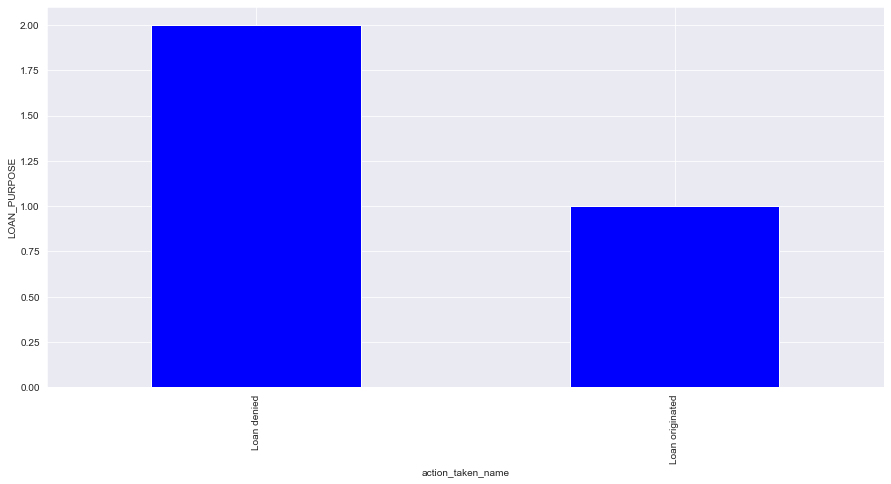

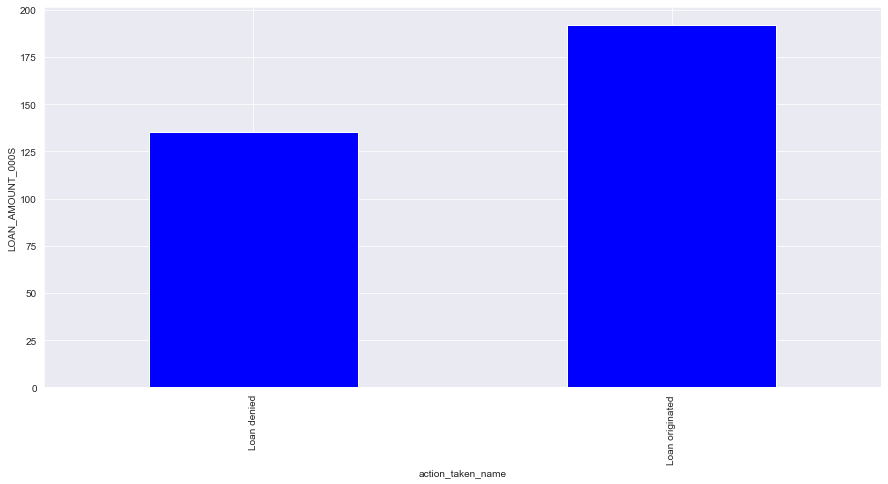

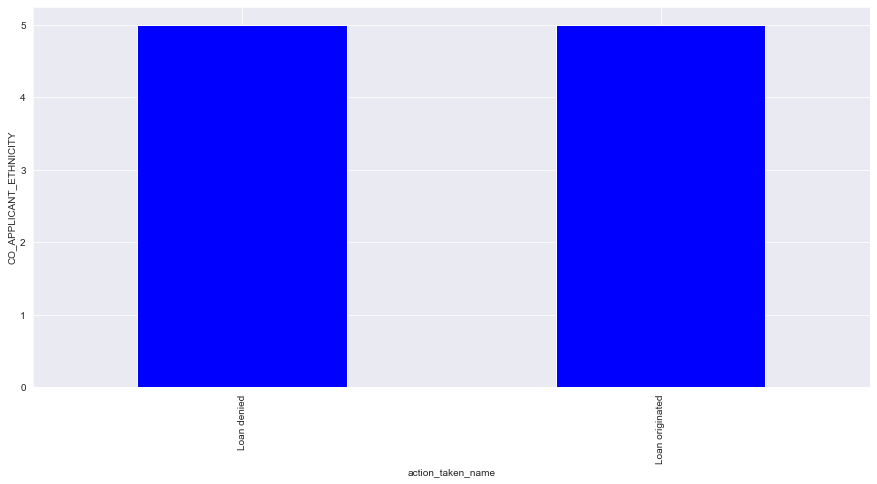

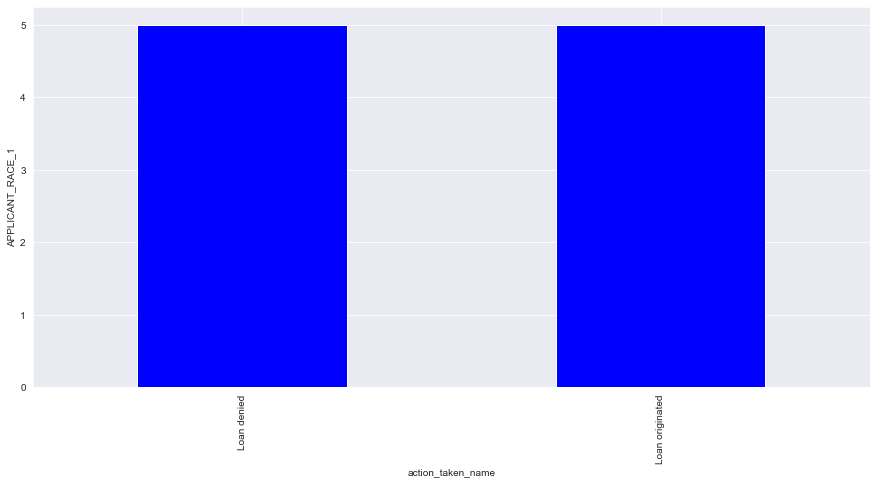

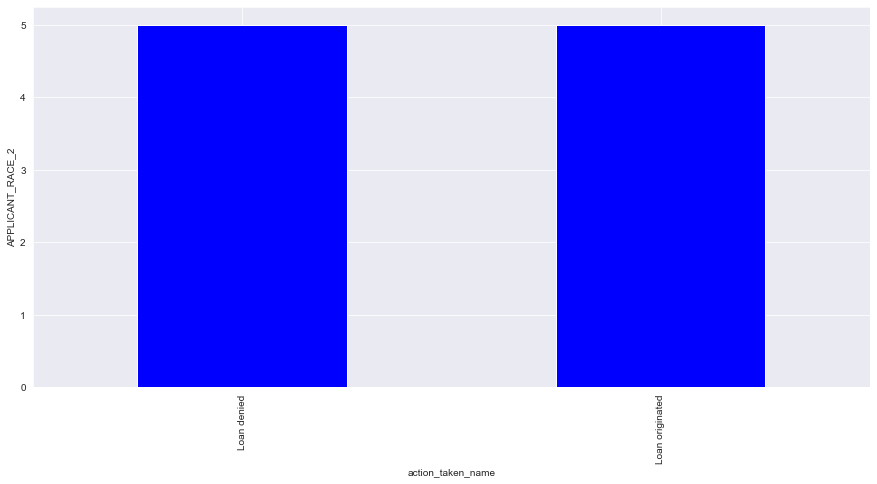

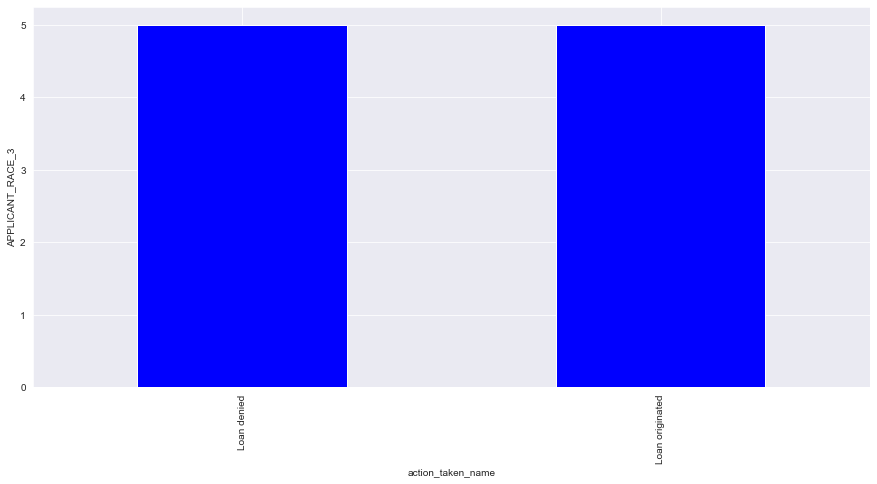

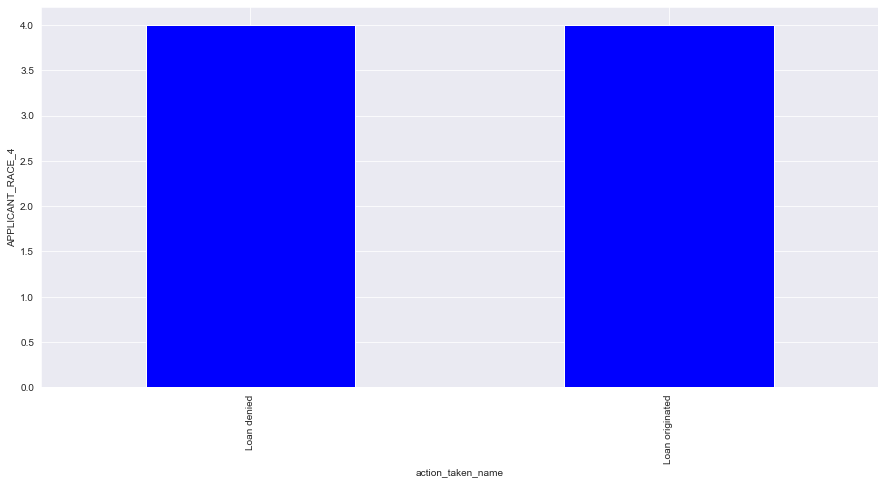

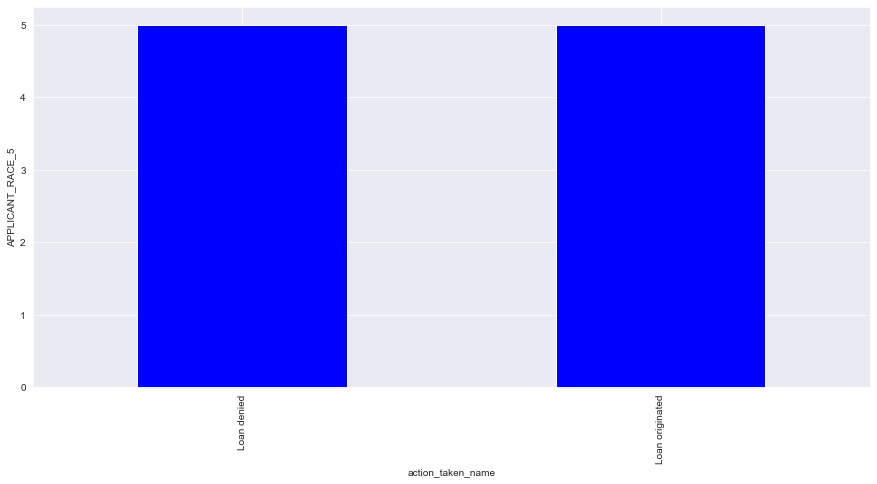

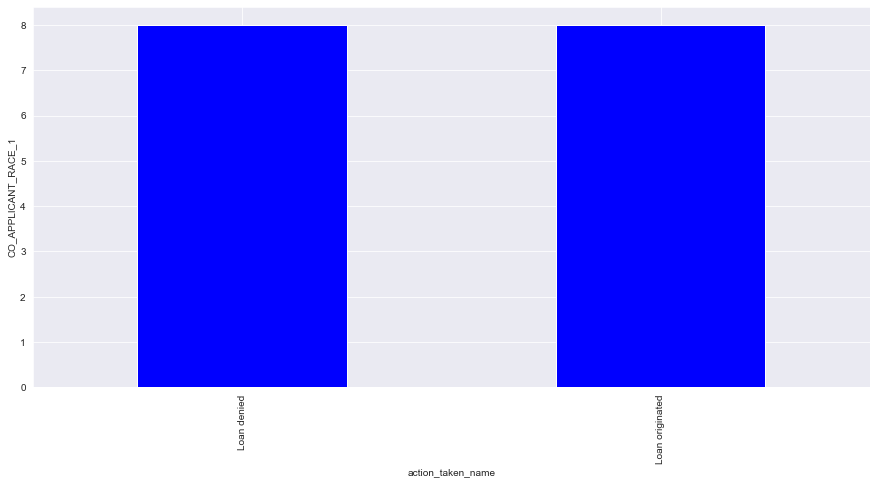

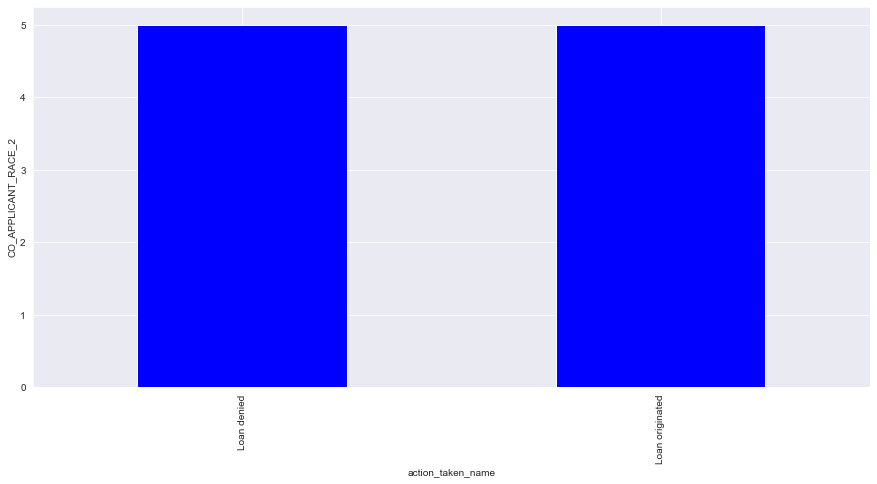

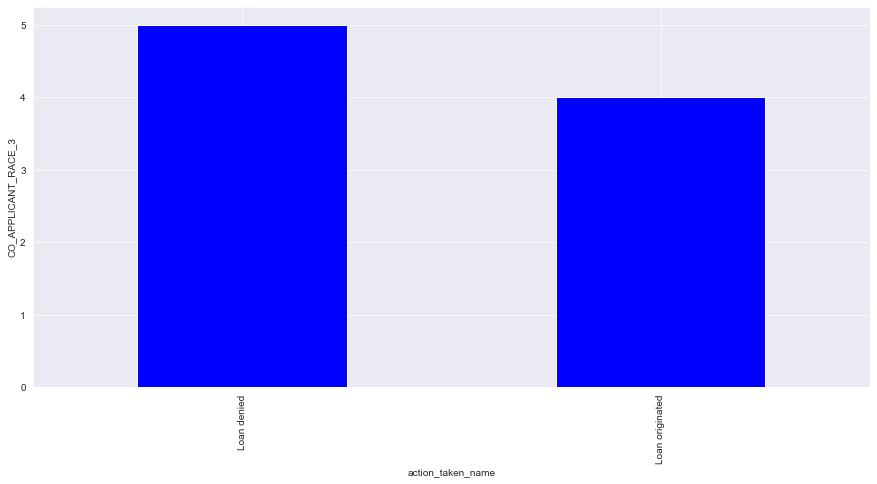

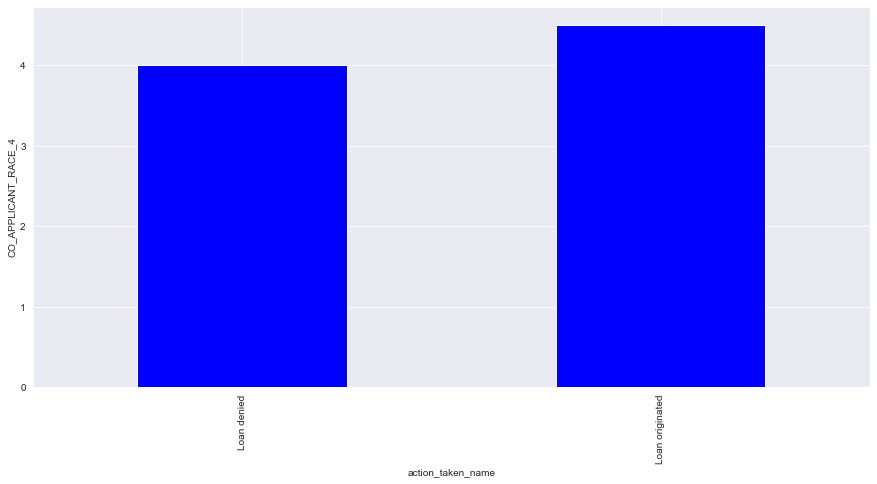

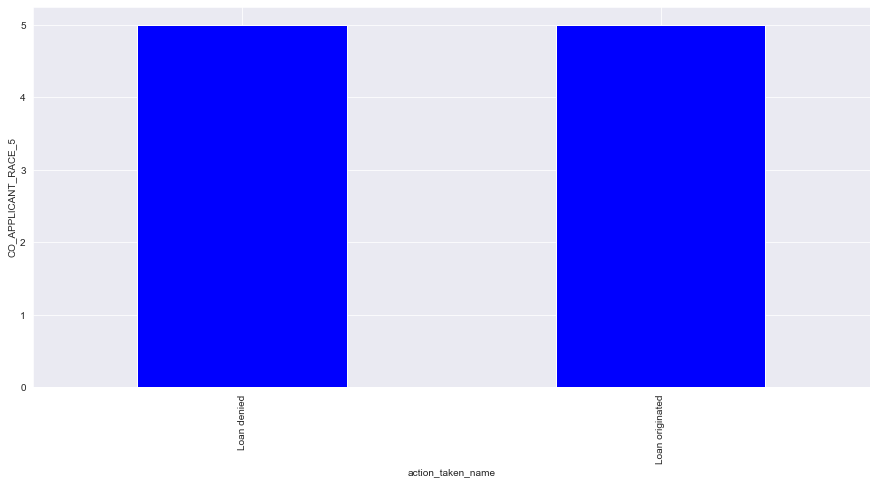

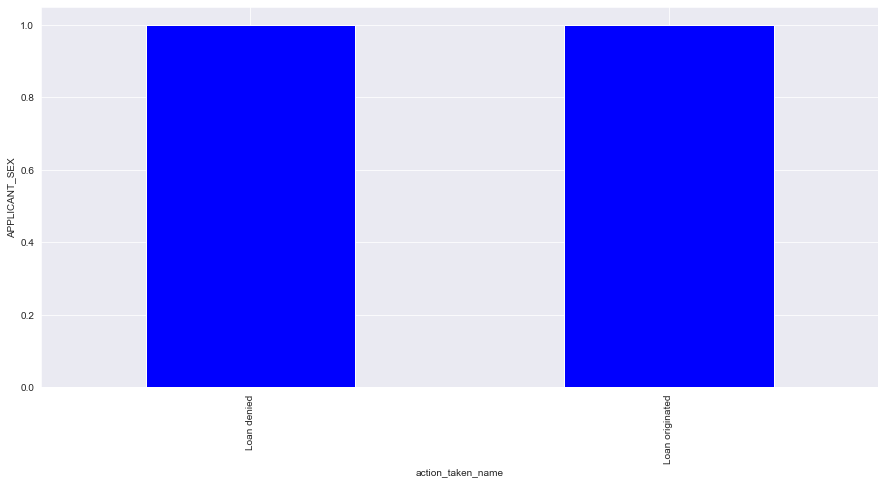

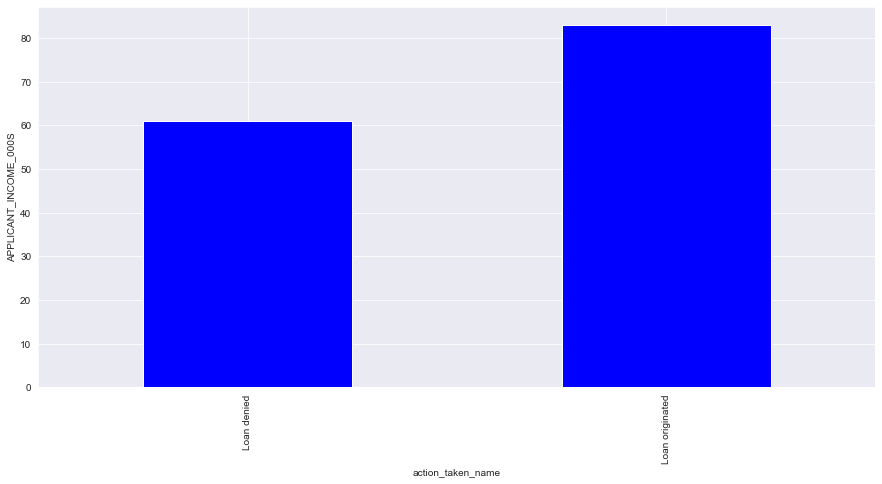

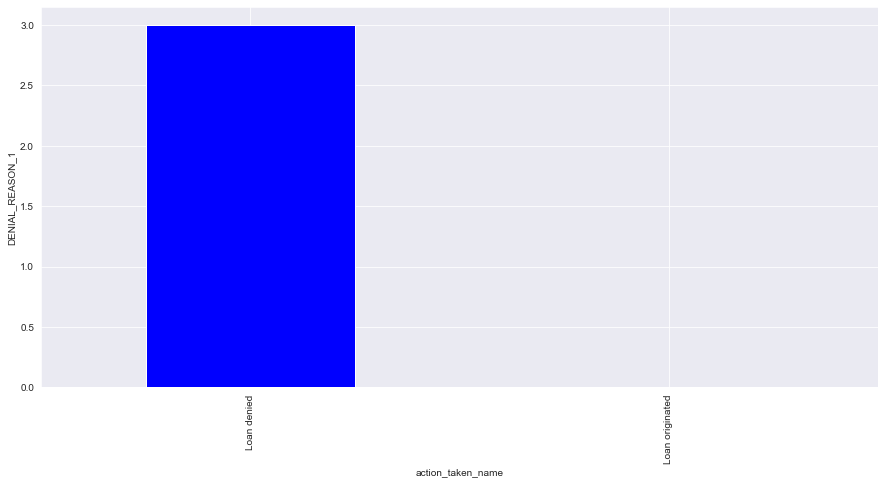

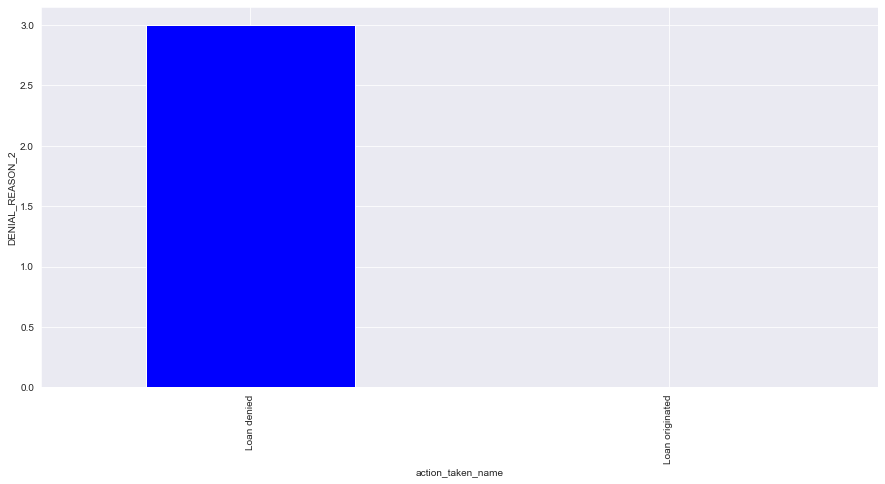

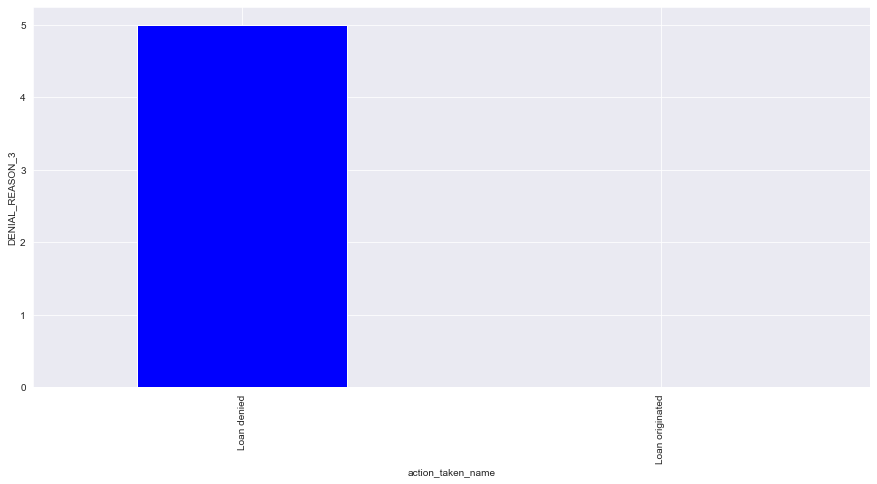

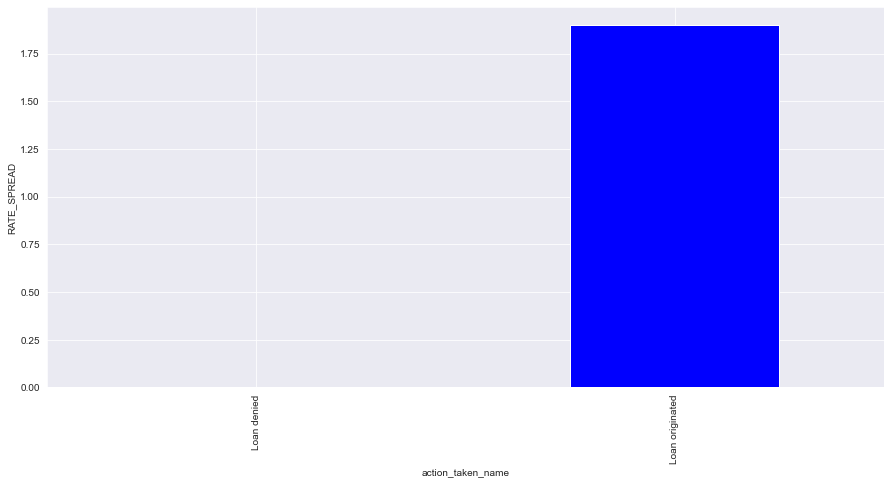

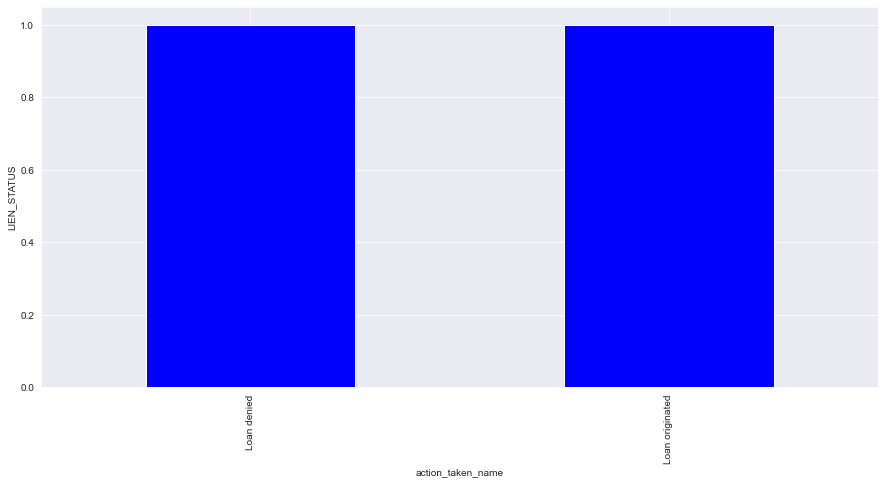

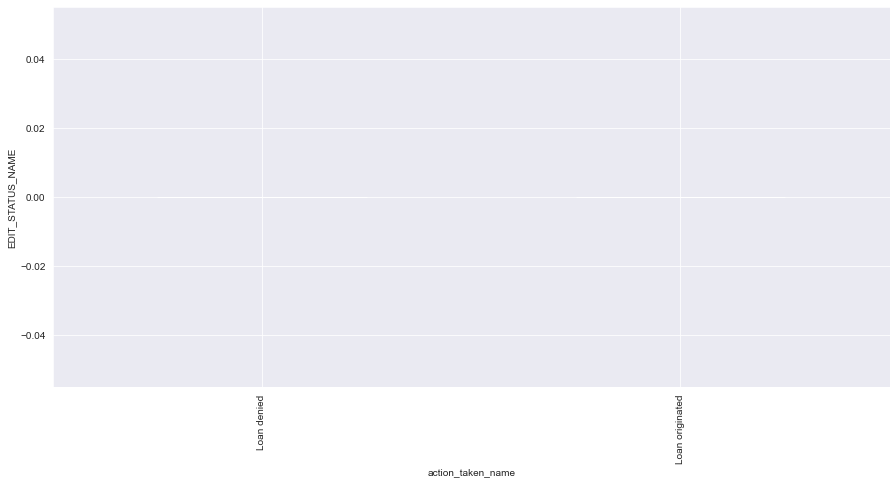

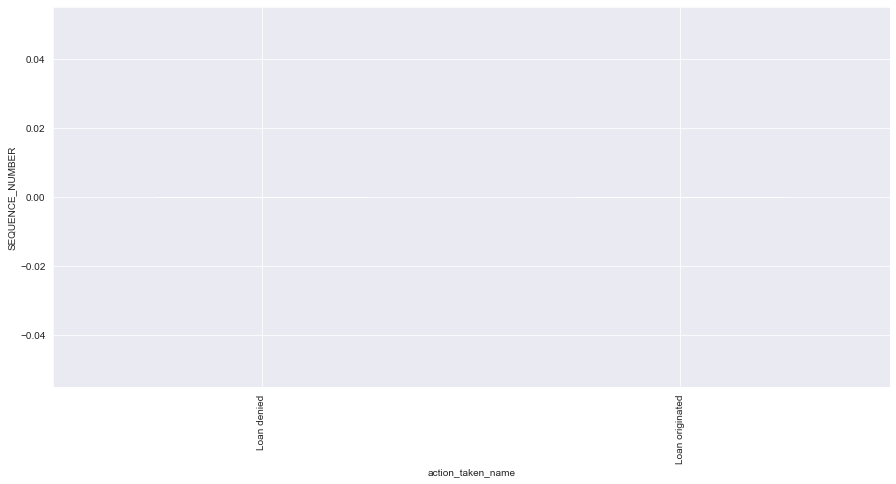

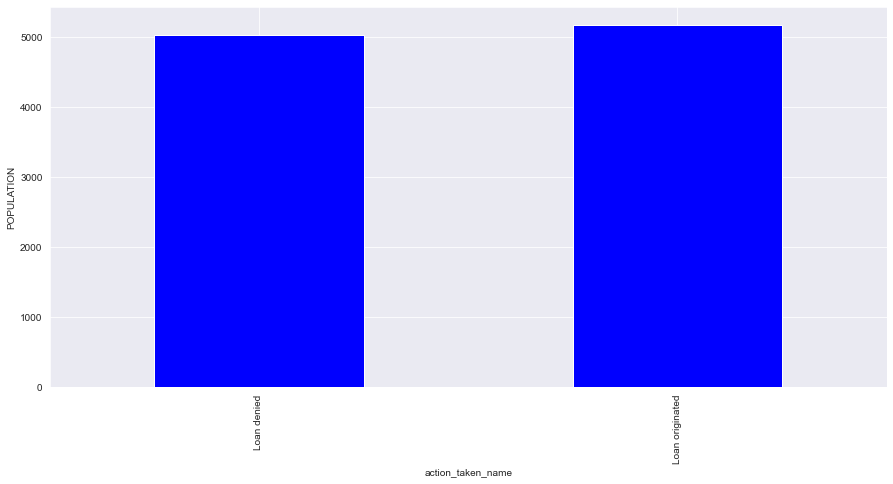

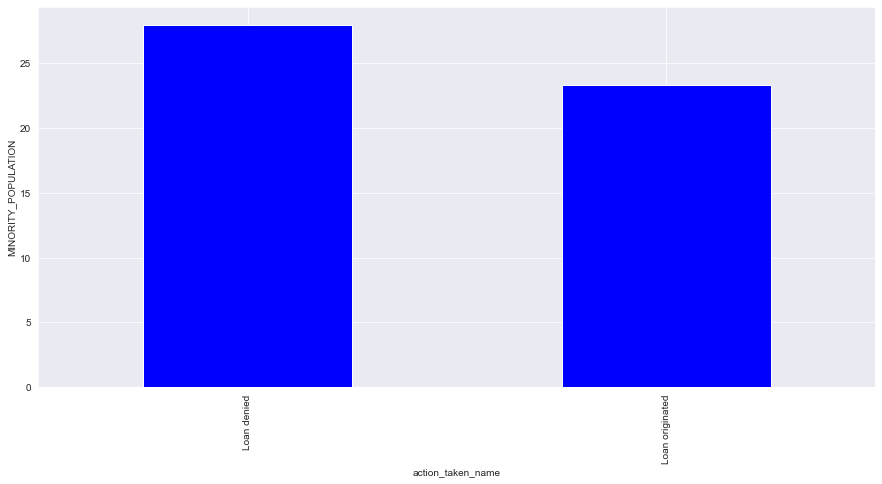

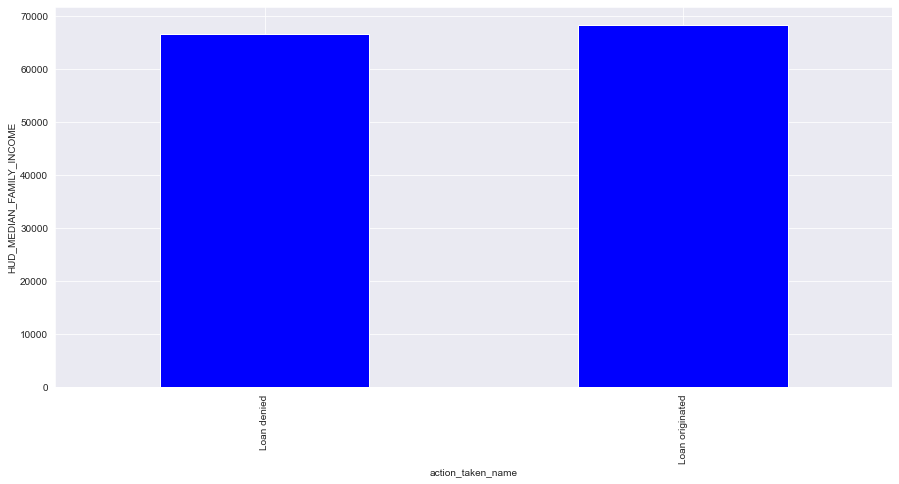

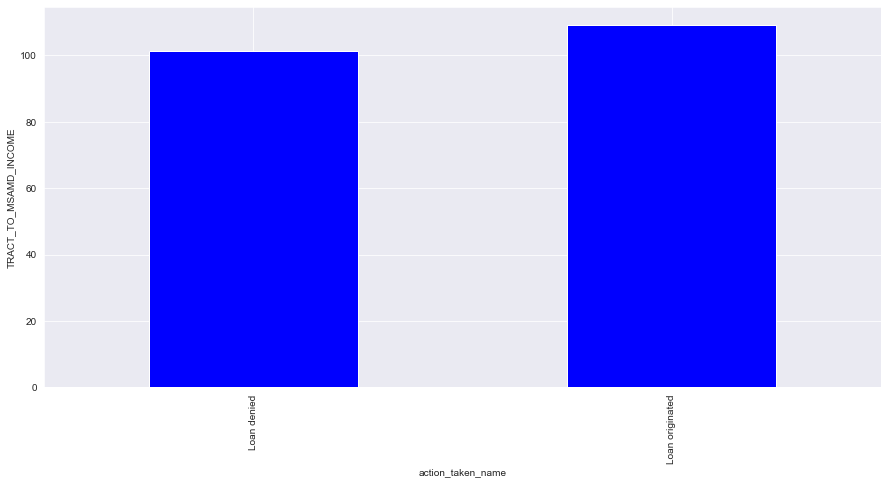

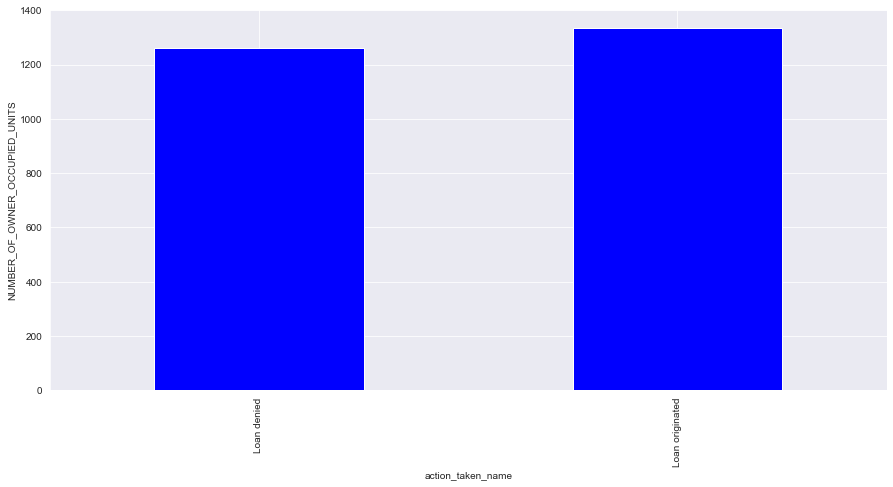

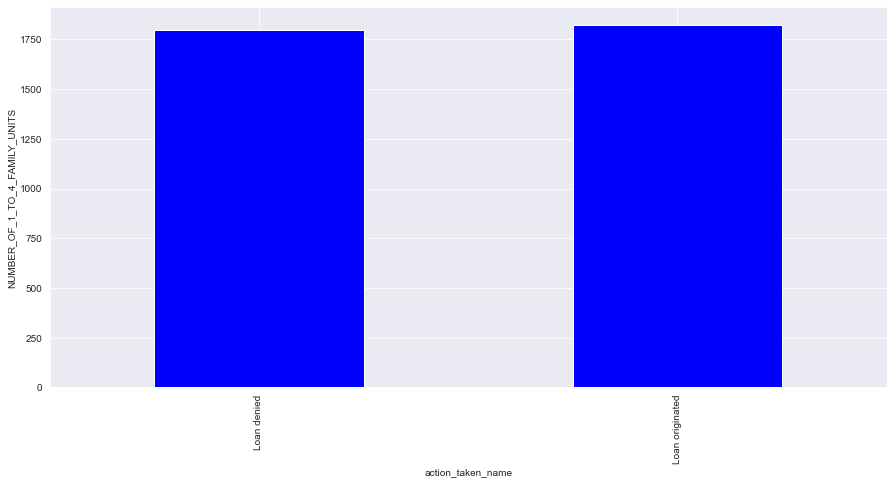

In [71]:
for i in num:
    plt.figure(figsize = (15,7))
    
    df.groupby('action_taken_name')[i].median().plot.bar(color='blue')
    plt.ylabel(i.upper())

In [72]:
for i in num:
    print(i.upper())
    print(df.pivot_table(index=target, values = i, aggfunc = np.median))
    print()
    print('__________________________________________________________________________________________')
    print()

LOAN_PURPOSE
                   loan_purpose
action_taken_name              
Loan denied                   2
Loan originated               1

__________________________________________________________________________________________

LOAN_AMOUNT_000S
                   loan_amount_000s
action_taken_name                  
Loan denied                   135.0
Loan originated               192.0

__________________________________________________________________________________________

CO_APPLICANT_ETHNICITY
                   co_applicant_ethnicity
action_taken_name                        
Loan denied                             5
Loan originated                         5

__________________________________________________________________________________________

APPLICANT_RACE_1
                   applicant_race_1
action_taken_name                  
Loan denied                       5
Loan originated                   5

__________________________________________________________________

#### Bivariate analysis - categorical relationship with target variable

In [80]:
for i in cat:
    print(pd.crosstab(df[i],df[target]))
    print()
    print('______________________________________________________________________________________')
    print()

action_taken_name  Loan denied  Loan originated
agency_abbr                                    
CFPB                     15142            39896
FDIC                      2925            18452
FRS                        826             6124
HUD                      23033            86541
NCUA                      3926            14242
OCC                       1333             7197

______________________________________________________________________________________

action_taken_name   Loan denied  Loan originated
loan_type_name                                  
Conventional              34946           127158
FHA-insured                7608            27113
FSA/RHS-guaranteed          572             2984
VA-guaranteed              4059            15197

______________________________________________________________________________________

action_taken_name                                   Loan denied  \
property_type_name                                                
Manufactur

action_taken_name                          Loan denied  Loan originated
applicant_race_name_2                                                  
American Indian or Alaska Native                    22               26
Asian                                               16               56
Black or African American                           64              103
Native Hawaiian or Other Pacific Islander           24               79
White                                              278              784

______________________________________________________________________________________

action_taken_name                          Loan denied  Loan originated
applicant_race_name_3                                                  
American Indian or Alaska Native                     1                3
Asian                                                0                1
Black or African American                            5               15
Native Hawaiian or Other Pacific Islander      

action_taken_name                               Loan denied
denial_reason_name_2                                       
Collateral                                              580
Credit application incomplete                           345
Credit history                                         1816
Debt-to-income ratio                                   1167
Employment history                                      239
Insufficient cash (downpayment, closing costs)          654
Mortgage insurance denied                                20
Other                                                  1019
Unverifiable information                                474

______________________________________________________________________________________

action_taken_name                               Loan denied
denial_reason_name_3                                       
Collateral                                               88
Credit application incomplete                            38
Credit hist

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

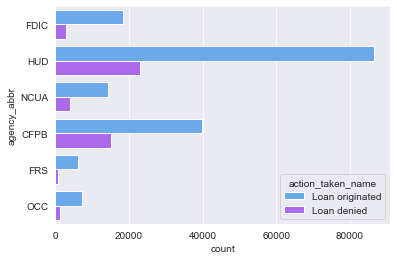

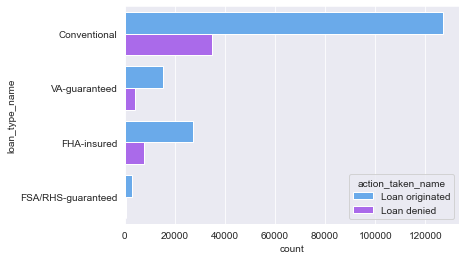

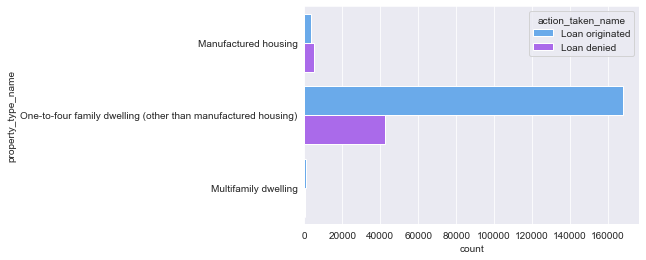

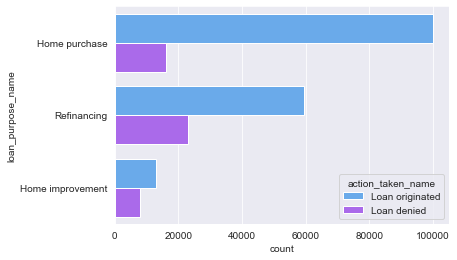

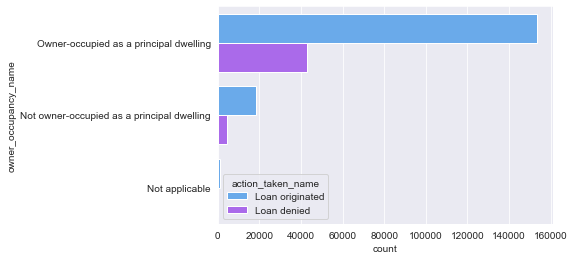

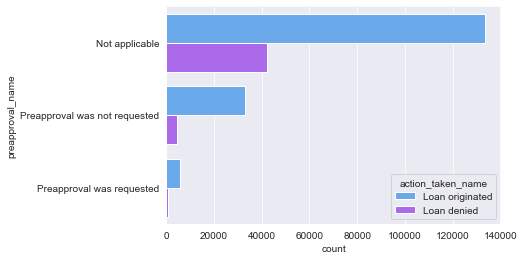

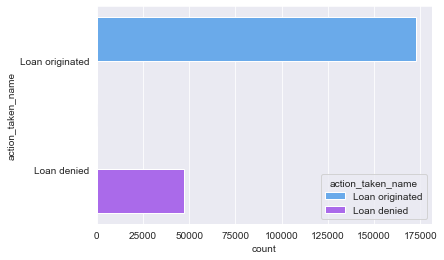

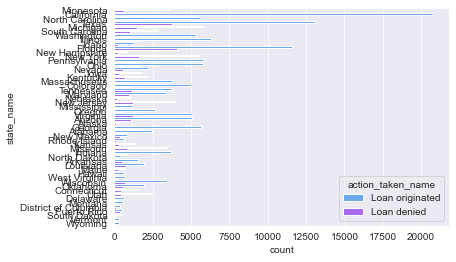

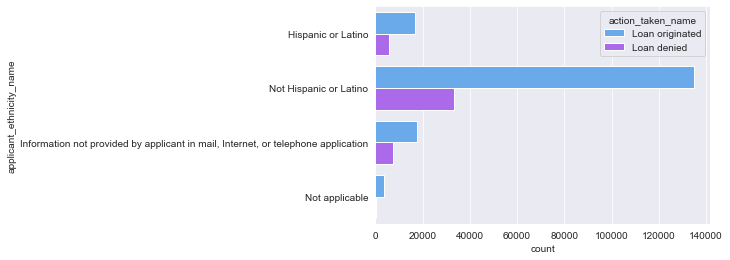

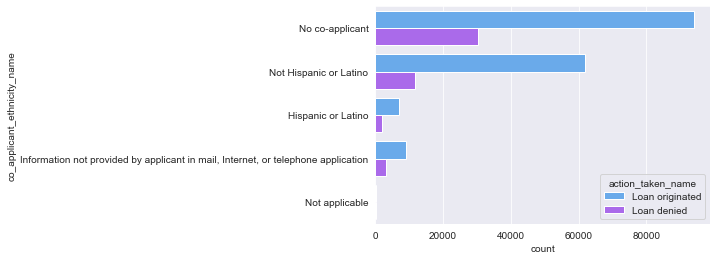

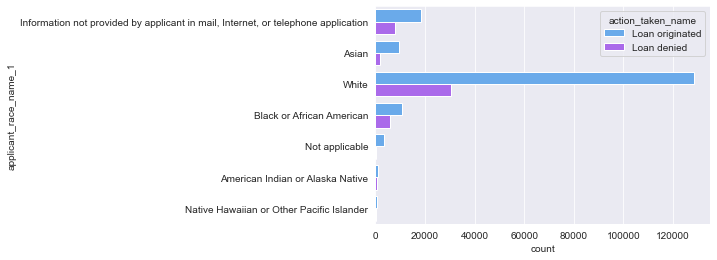

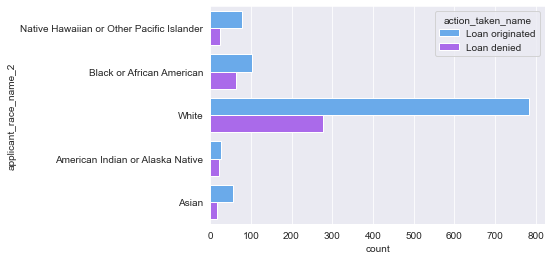

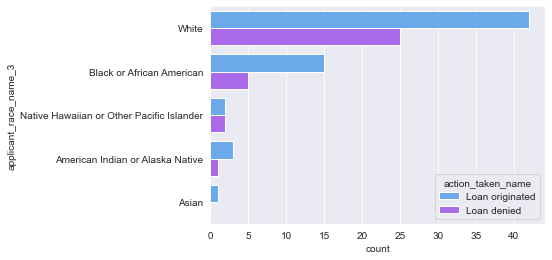

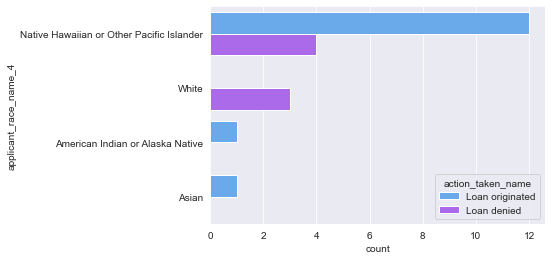

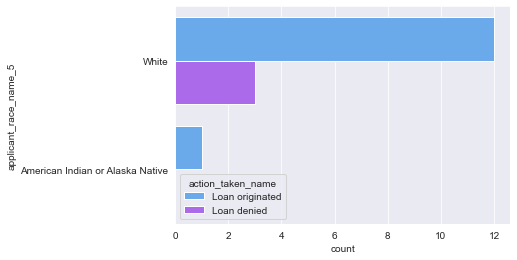

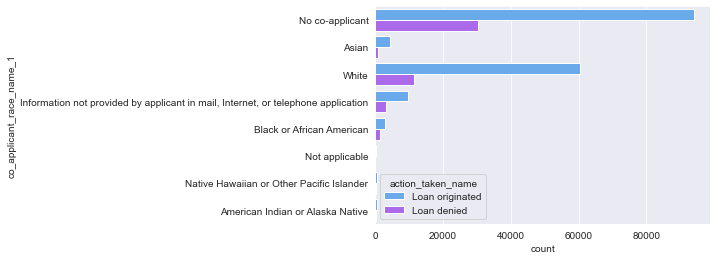

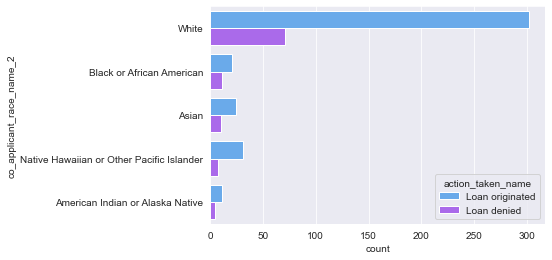

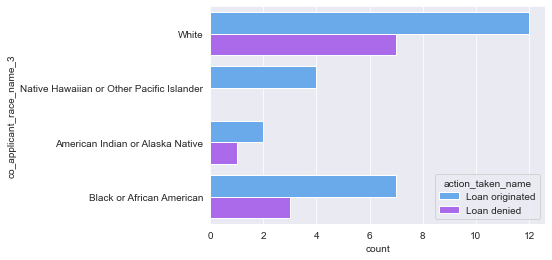

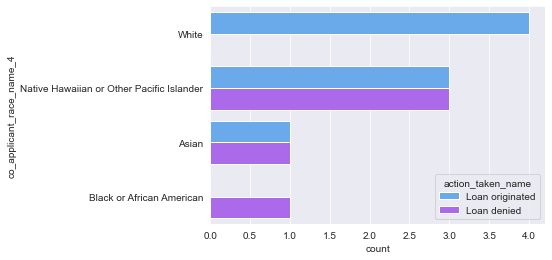

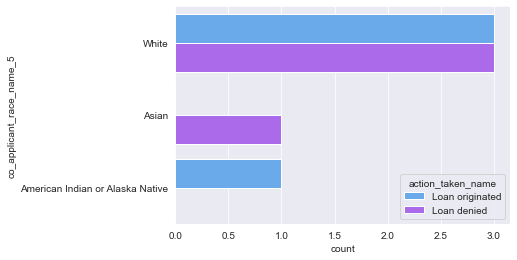

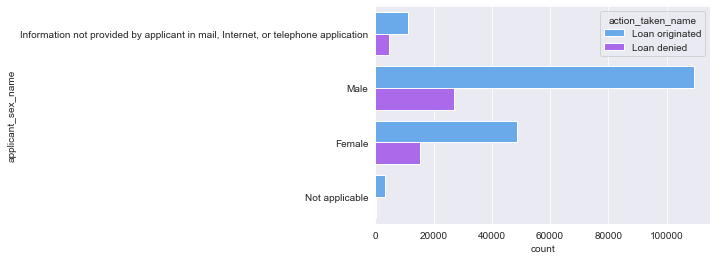

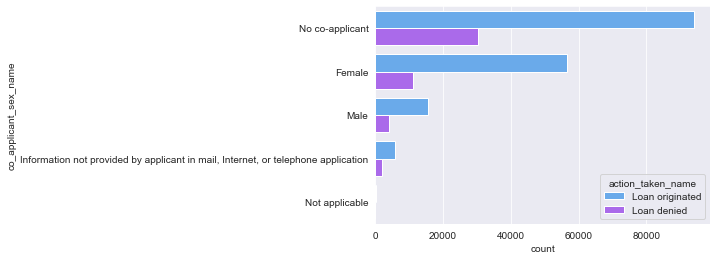

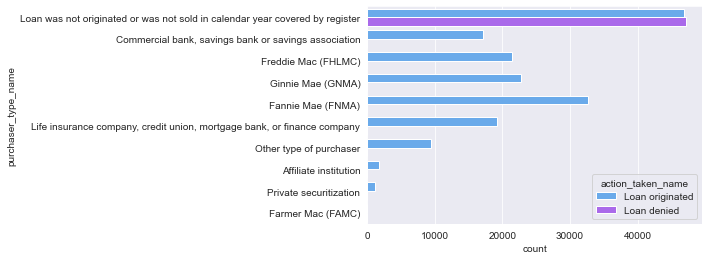

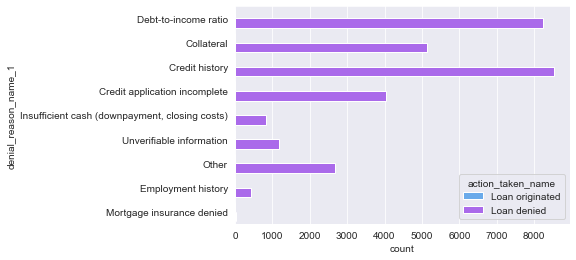

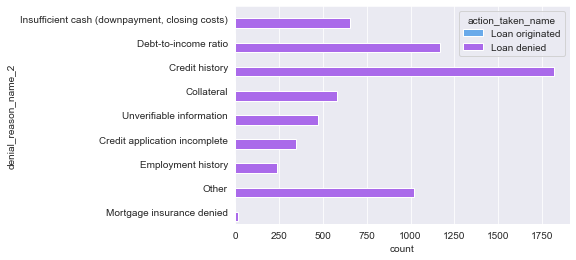

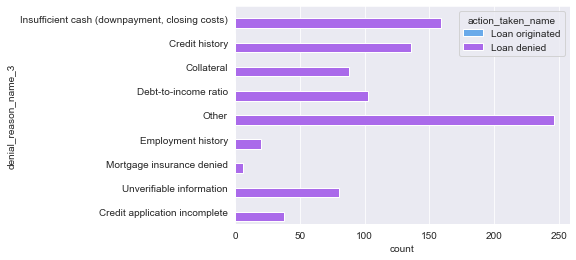

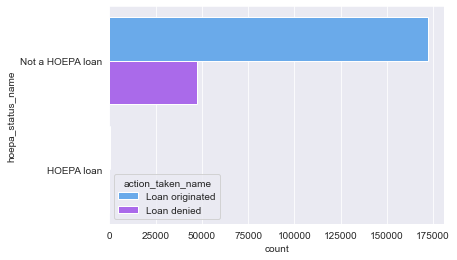

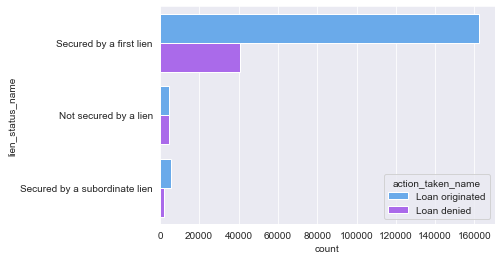

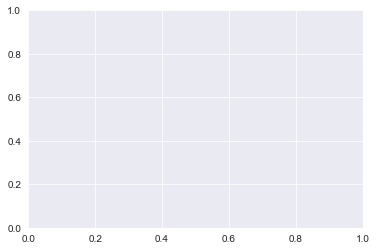

In [84]:
for i in cat:
    plt.figure()
    sns.countplot(data=df, y=i, hue=target, palette='cool')

##### Chi square test - Association between two categorical variables
Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

The aim of this chi-square test is to conclude whether two categorical variables(each independent categorical variable and the target variable) are related to each other not. 

**Null hypothesis**: We start by defining our null hypothesis (H0) which states that there is no relation between the variables. 

**Alternate hypothesis**: It would state that there is a significant relationship between the two variables. 

We will define a significant factor to determine whether the relation between the variables is of considerable significance. Generally, a significant factor or alpha value of 0.05 is chosen. This alpha value denotes the probability of erroneously rejecting H0 when it is true. A lower alpha value is chosen in cases when we expect more precision. If the p-value for the test comes out to be strictly greater than the alpha value, then we will accept our H0.

**Source**: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

In [85]:
from scipy.stats import chi2_contingency

In [92]:
def chi2_test(data, variable):
    contigency_table = pd.crosstab(df[target], df[i])
    chi_square_test_value,pvalue,degree_of_freedom,expected_value=scipy.stats.chi2_contingency(contigency_table,correction=True)

    alpha  = 0.05
    
    print(i.upper())

    if pvalue<=0.05:
        print('Both variables are dependent, there is a relationship. The null hypothesis is rejected')

    else:
        print('Both variables are independent, there is no relationship. The null hypothesis is accepted')
    print()

In [93]:
for i in cat:
    print(chi2_test(df, i))

AGENCY_ABBR
Both variables are dependent, there is a relationship. The null hypothesis is rejected

None
LOAN_TYPE_NAME
Both variables are dependent, there is a relationship. The null hypothesis is rejected

None
PROPERTY_TYPE_NAME
Both variables are dependent, there is a relationship. The null hypothesis is rejected

None
LOAN_PURPOSE_NAME
Both variables are dependent, there is a relationship. The null hypothesis is rejected

None
OWNER_OCCUPANCY_NAME
Both variables are dependent, there is a relationship. The null hypothesis is rejected

None
PREAPPROVAL_NAME
Both variables are dependent, there is a relationship. The null hypothesis is rejected

None
ACTION_TAKEN_NAME
Both variables are dependent, there is a relationship. The null hypothesis is rejected

None
STATE_NAME
Both variables are dependent, there is a relationship. The null hypothesis is rejected

None
APPLICANT_ETHNICITY_NAME
Both variables are dependent, there is a relationship. The null hypothesis is rejected

None
CO_APPL

ValueError: No data; `observed` has size 0.

#### Linear separability

In [98]:
subset = df[['action_taken_name','population','minority_population','hud_median_family_income','tract_to_msamd_income','number_of_owner_occupied_units','number_of_1_to_4_family_units','loan_amount_000s']]

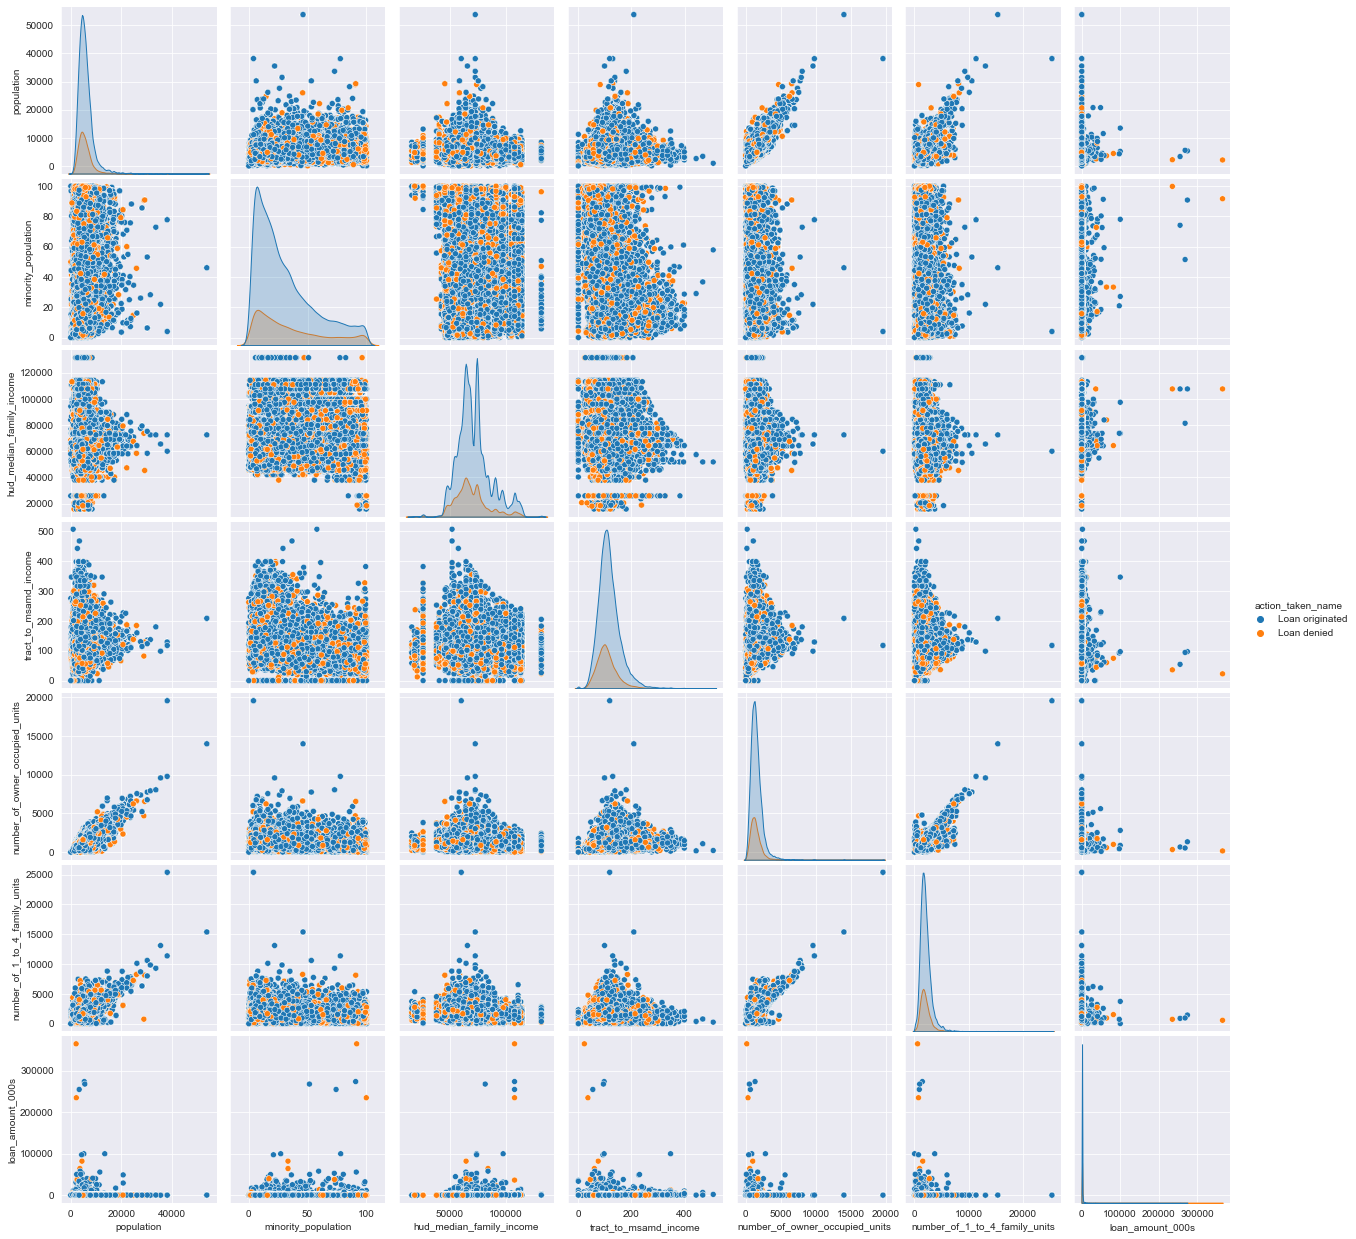

In [99]:
sns.pairplot(subset, hue = target, diag_kind='kde')

#### Correlation

<AxesSubplot:>

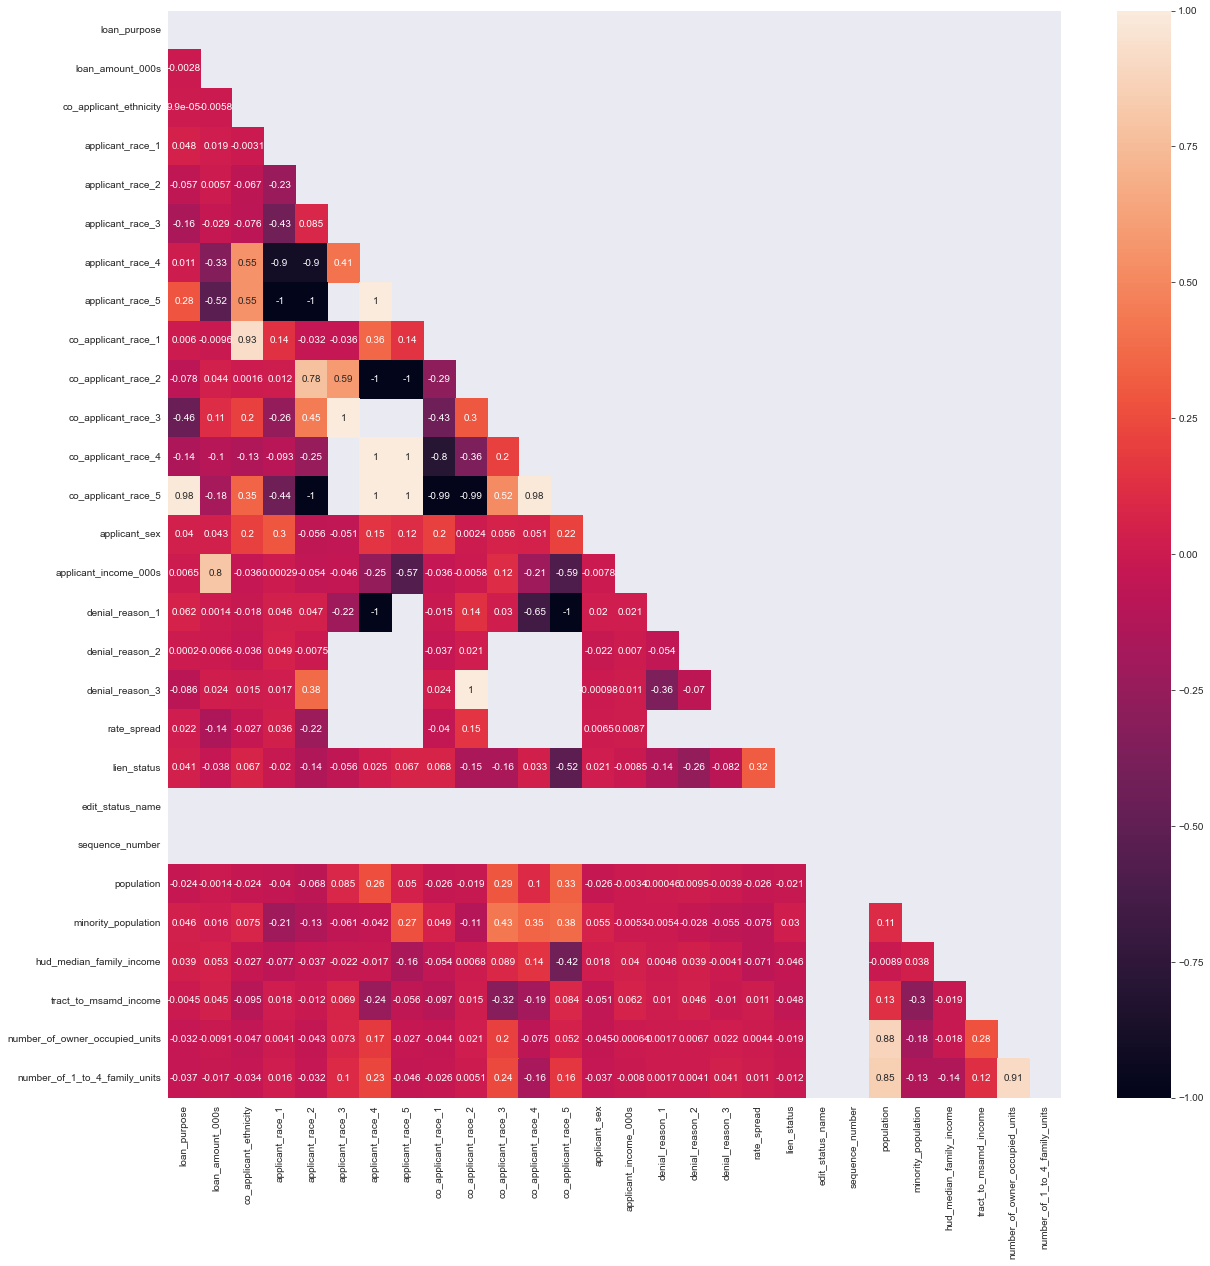

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='pearson'), mask = np.triu(df.corr(method='pearson')), annot=True, )

<AxesSubplot:>

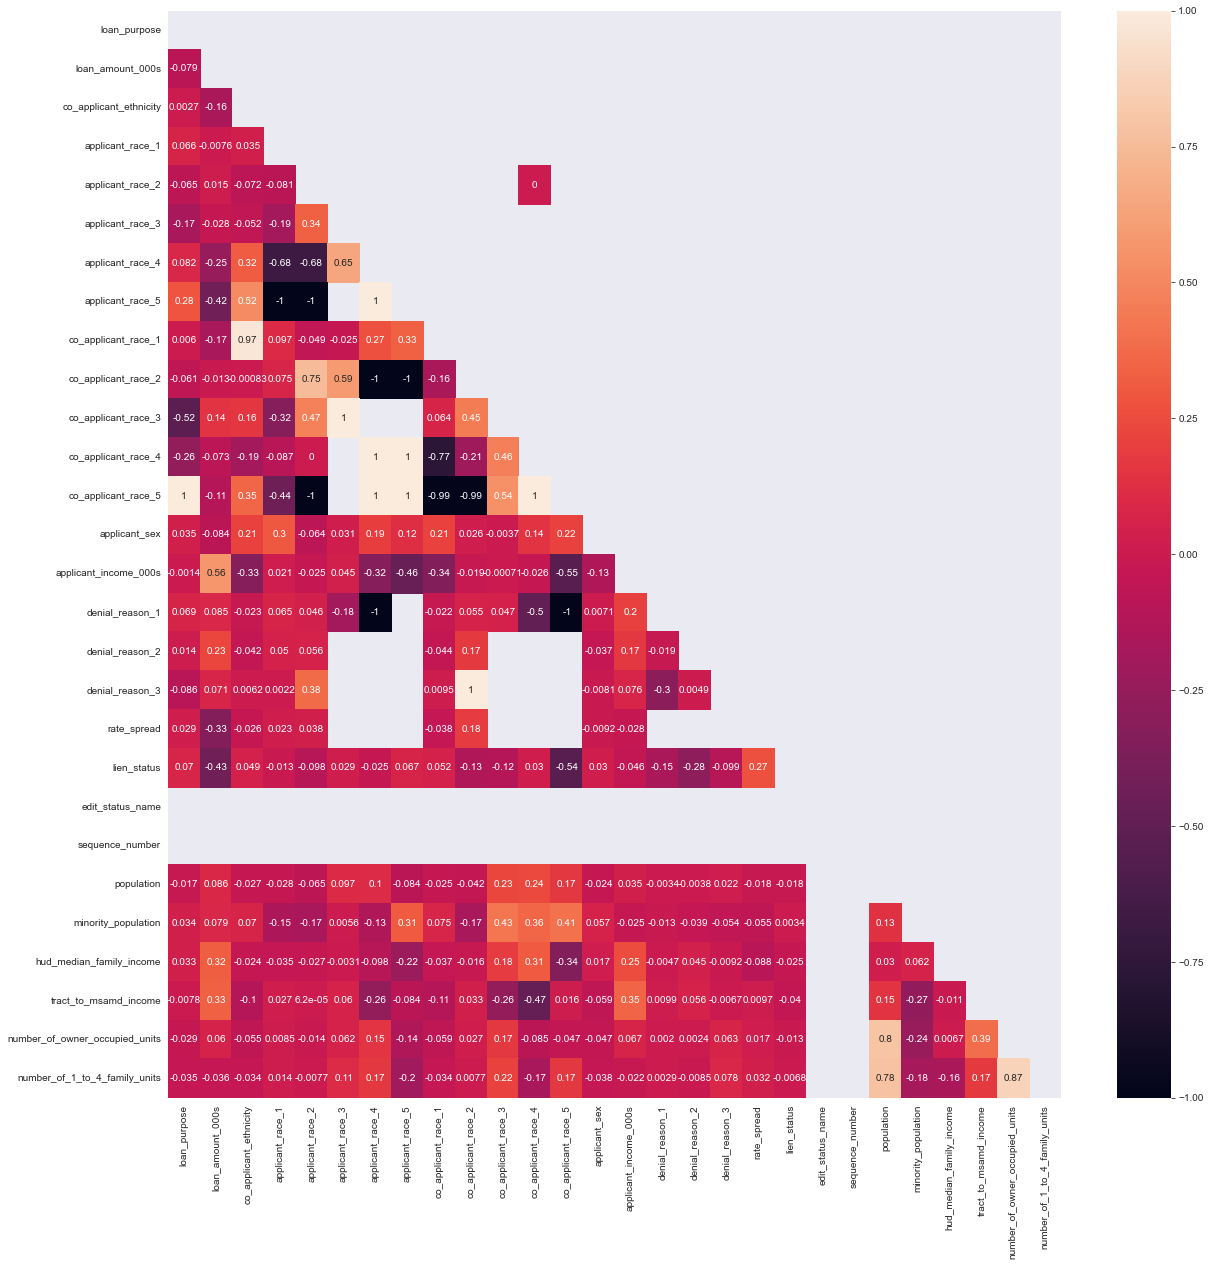

In [104]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='spearman'), mask = np.triu(df.corr(method='spearman')), annot=True,)

#### Normality

In [111]:
for i in num.columns:
    pvalue = scipy.stats.shapiro(df[i])[1]
    print(i.upper())
    if pvalue<0.05:
        print('Null hypothesis rejected. Data is not normal')
    else:
        print('Null hypothesis accepted. Data is normal')
    print()
    print('_______________________________________________________________________________________')
    print()

LOAN_PURPOSE
Null hypothesis rejected. Data is not normal

_______________________________________________________________________________________

LOAN_AMOUNT_000S
Null hypothesis accepted. Data is normal

_______________________________________________________________________________________

CO_APPLICANT_ETHNICITY
Null hypothesis rejected. Data is not normal

_______________________________________________________________________________________

APPLICANT_RACE_1
Null hypothesis rejected. Data is not normal

_______________________________________________________________________________________

APPLICANT_RACE_2
Null hypothesis accepted. Data is normal

_______________________________________________________________________________________

APPLICANT_RACE_3
Null hypothesis accepted. Data is normal

_______________________________________________________________________________________

APPLICANT_RACE_4
Null hypothesis accepted. Data is normal

_______________________________________

In [114]:
def data_vis(data, variable):
    
    plt.figure(figsize=(9,9))
    plt.subplot(121)
    sns.distplot(x = data[variable], color='blue')
    plt.ylabel(variable.upper())

    plt.subplot(122)
    scipy.stats.probplot(data[variable], plot=plt, dist='norm')
    
    plt.show()

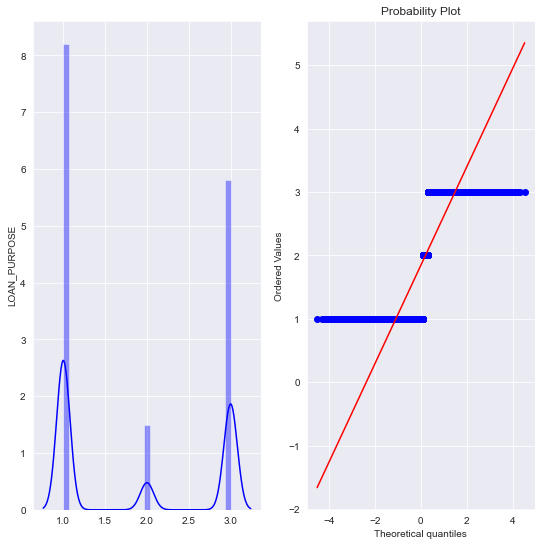

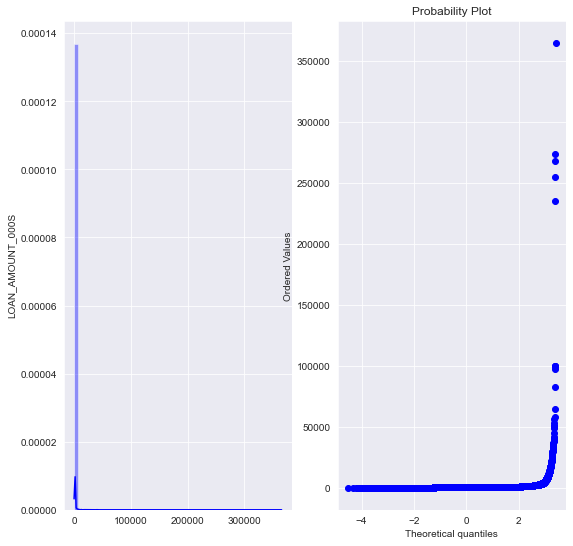

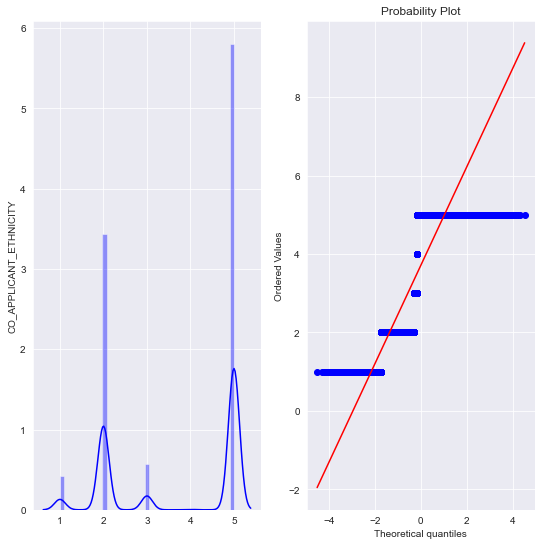

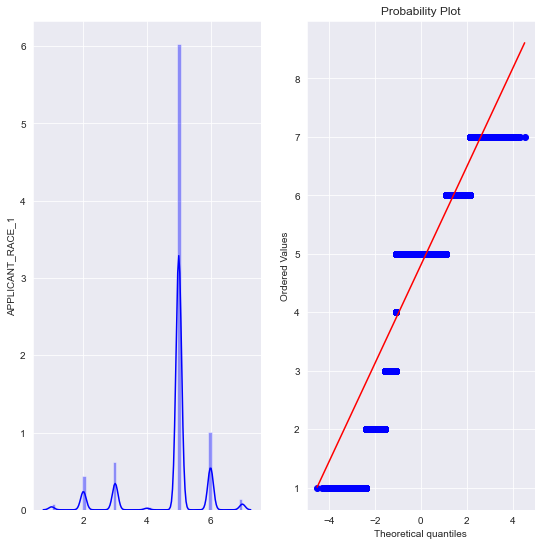

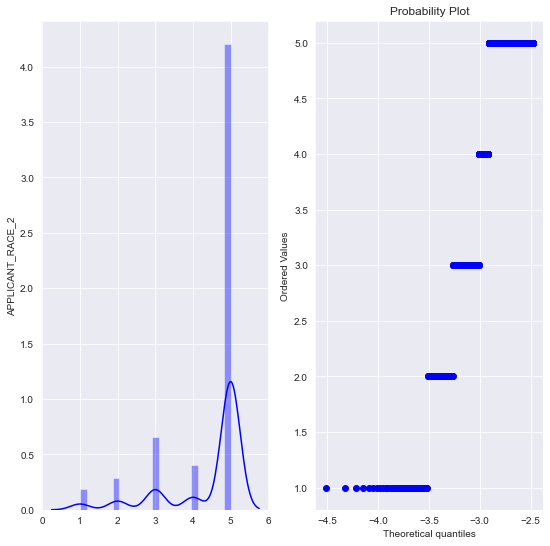

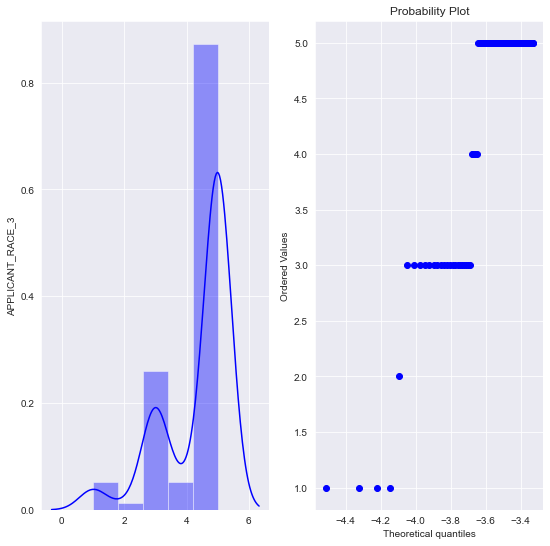

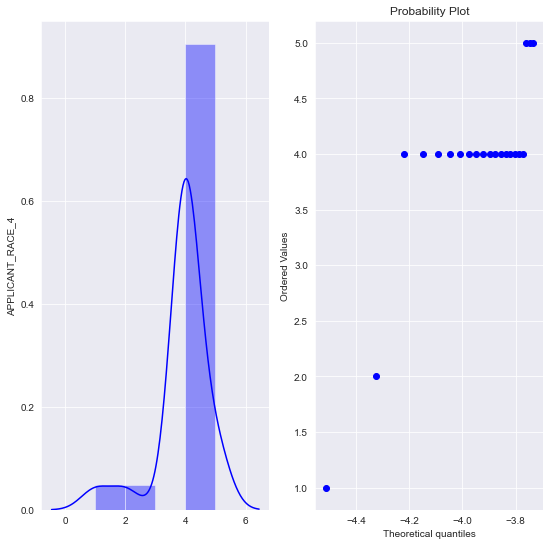

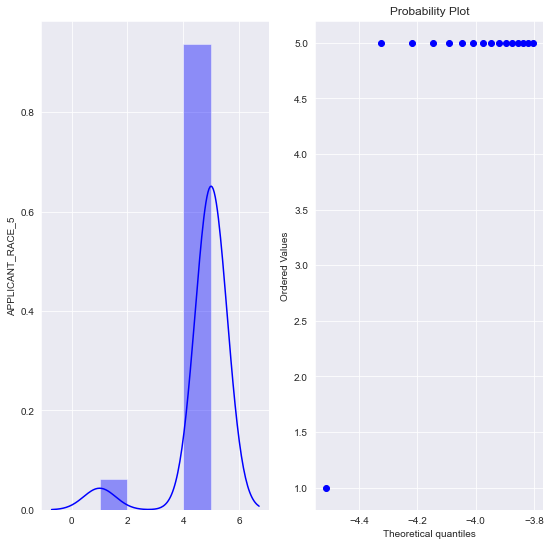

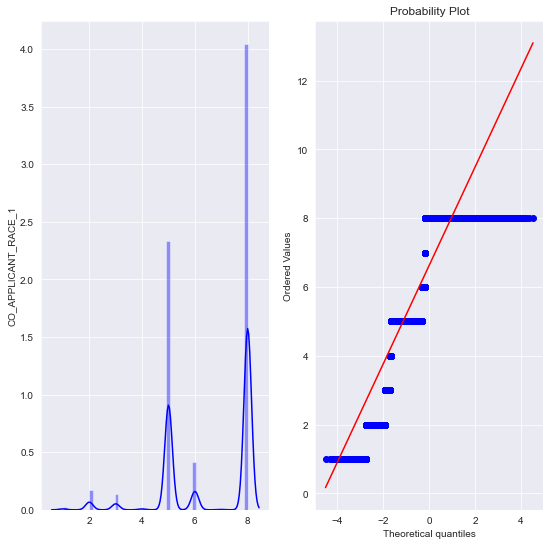

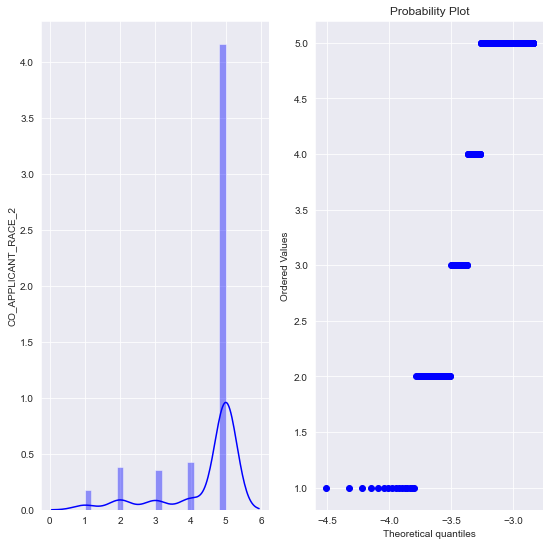

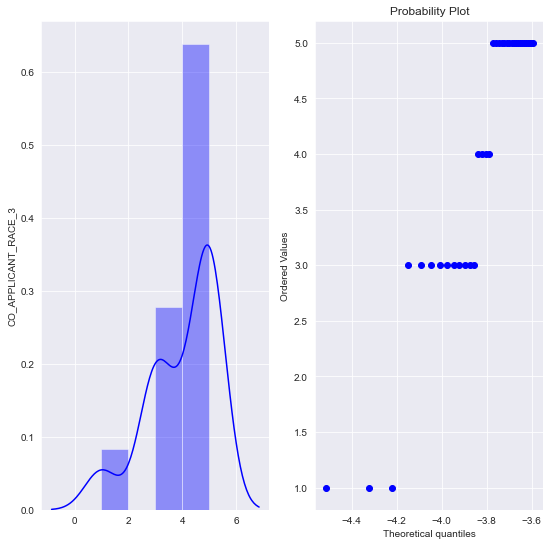

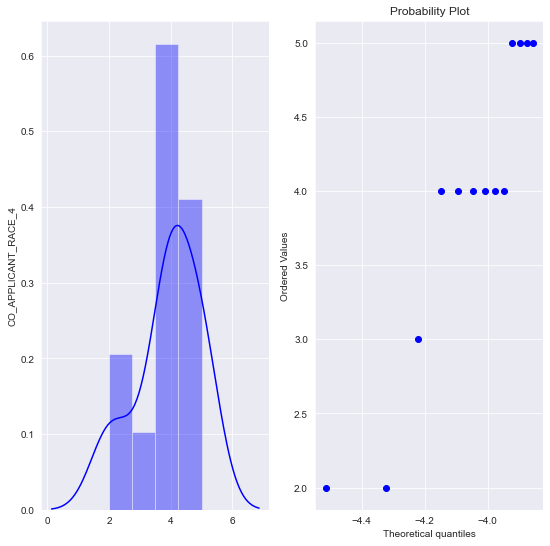

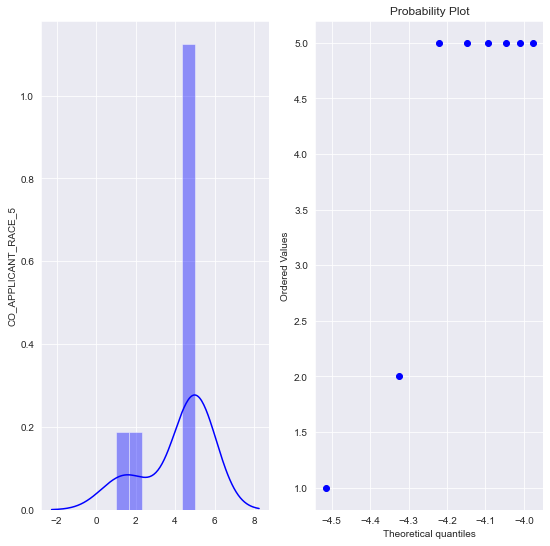

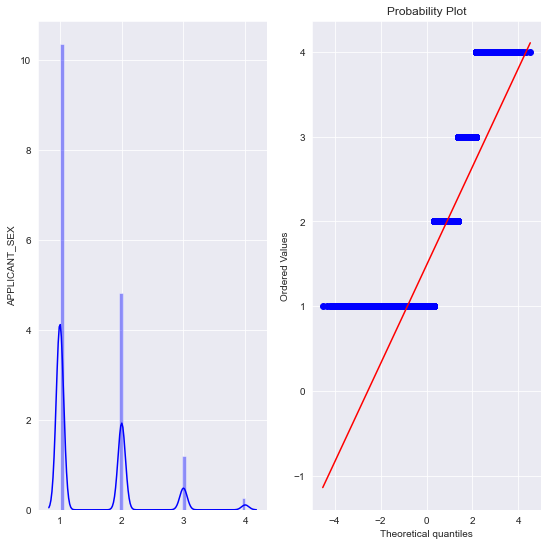

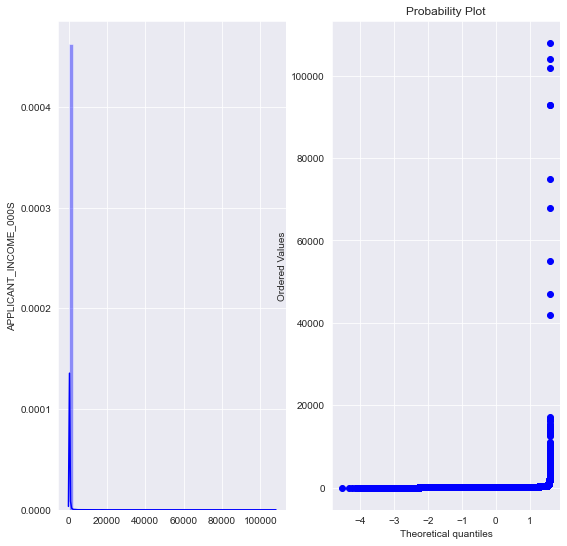

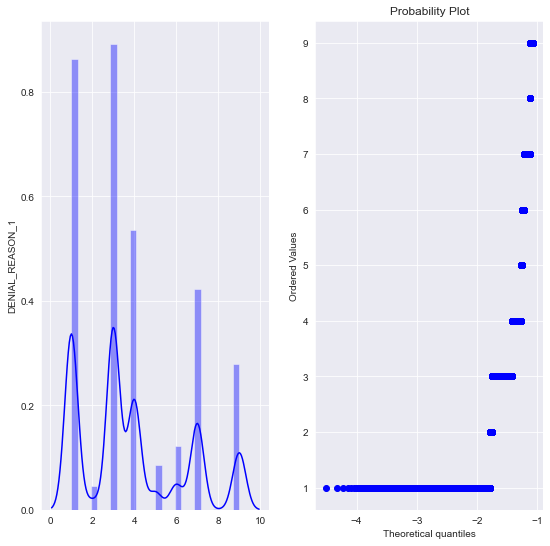

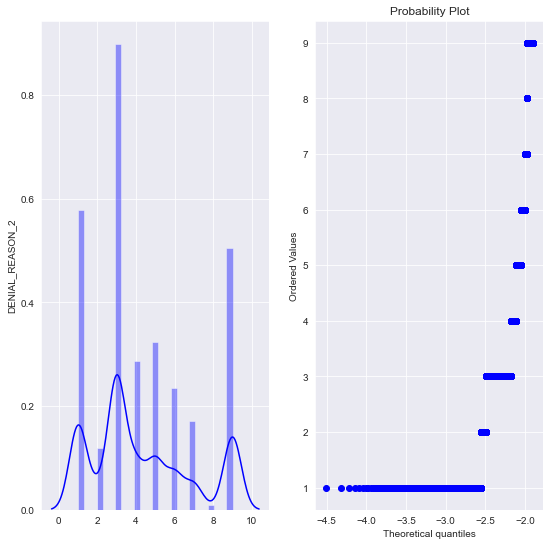

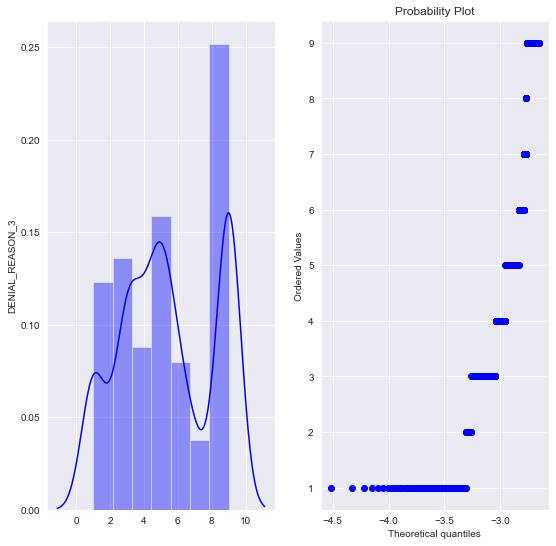

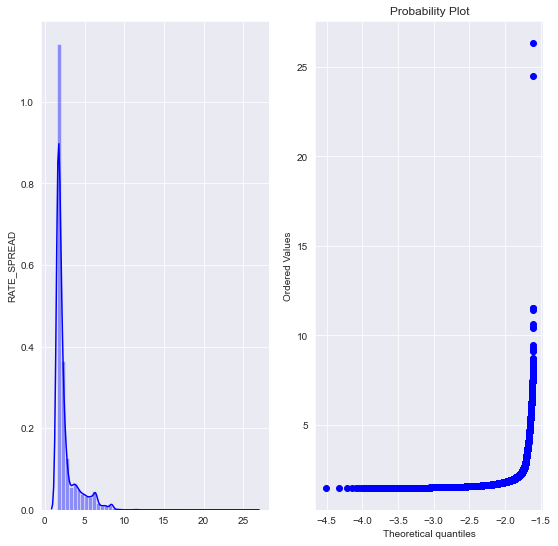

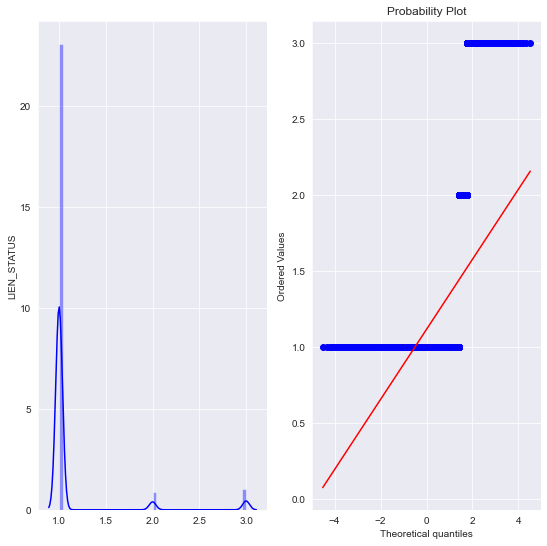

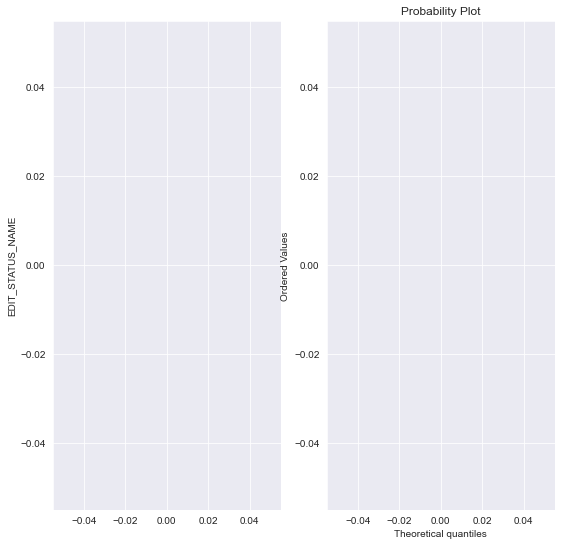

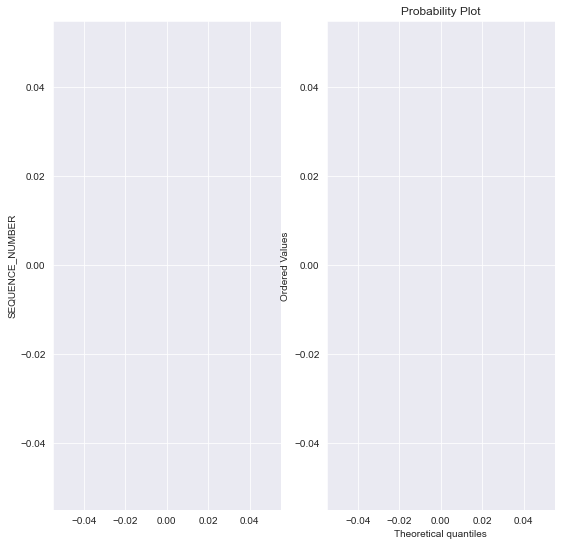

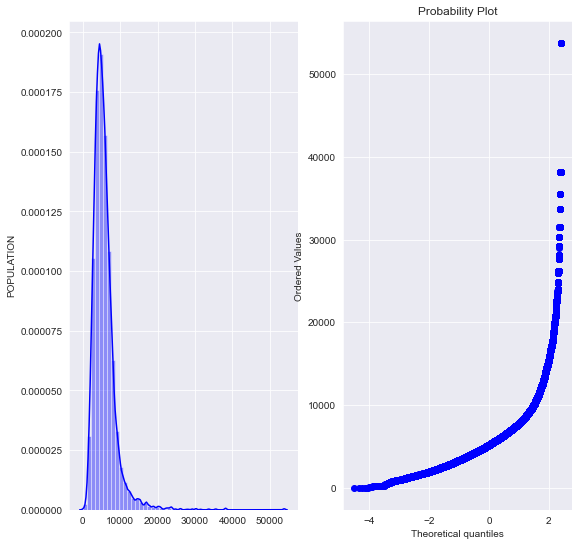

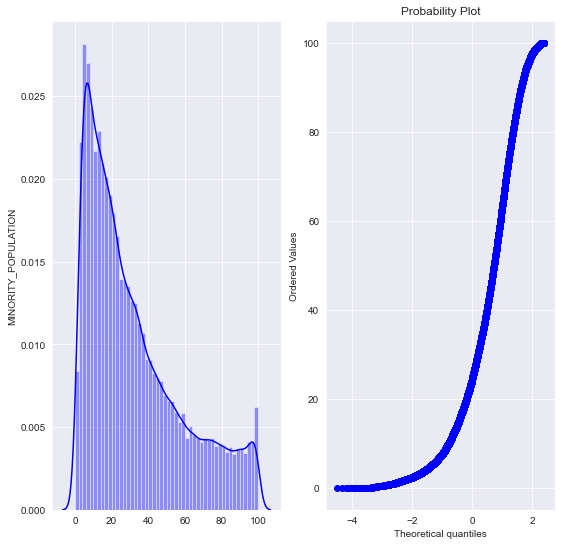

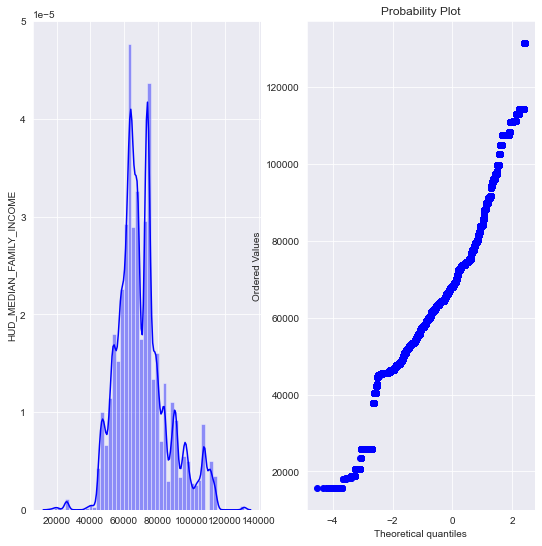

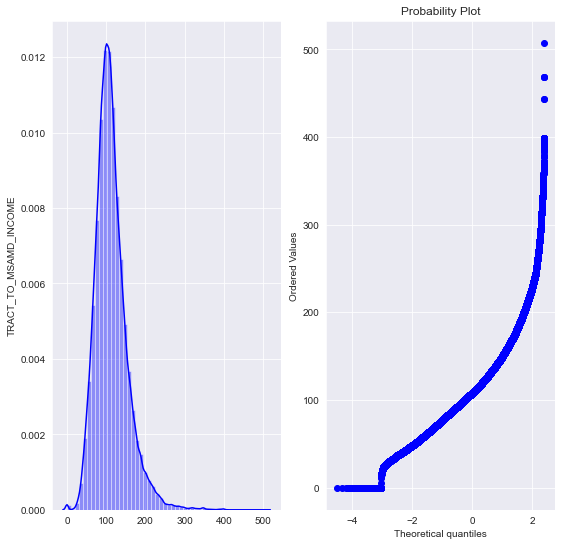

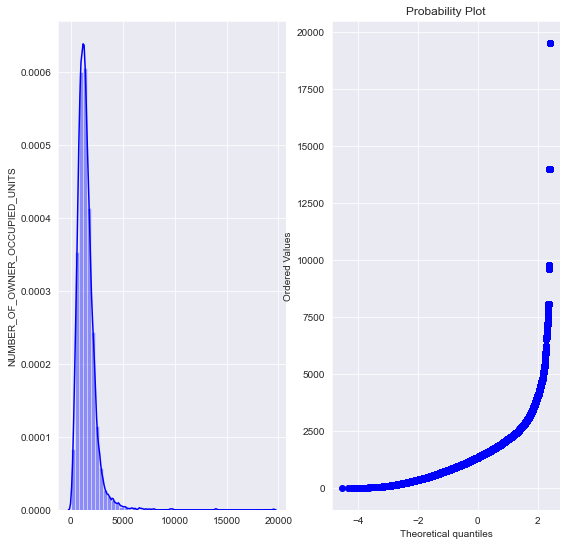

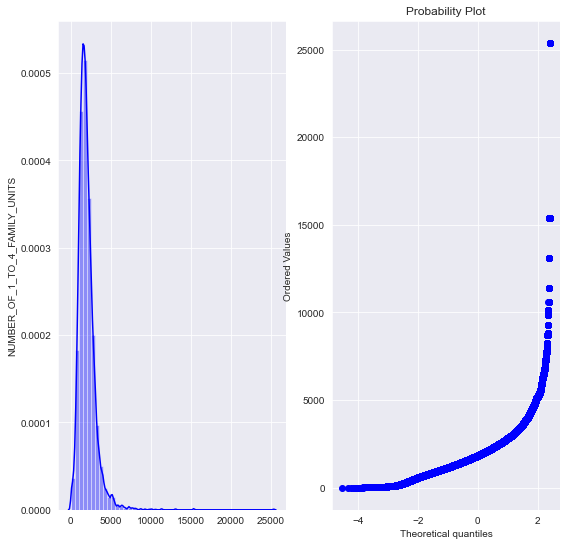

In [115]:
for i in num.columns:
    data_vis(df, i)

#### Feature range

In [118]:
for i in num.columns:
    max_value = df[i].max()
    min_value = df[i].min()
    
    print(i.upper(), max_value - min_value)

LOAN_PURPOSE 2
LOAN_AMOUNT_000S 364999.0
CO_APPLICANT_ETHNICITY 4
APPLICANT_RACE_1 6
APPLICANT_RACE_2 4.0
APPLICANT_RACE_3 4.0
APPLICANT_RACE_4 4.0
APPLICANT_RACE_5 4.0
CO_APPLICANT_RACE_1 7
CO_APPLICANT_RACE_2 4.0
CO_APPLICANT_RACE_3 4.0
CO_APPLICANT_RACE_4 3.0
CO_APPLICANT_RACE_5 4.0
APPLICANT_SEX 3
APPLICANT_INCOME_000S 107999.0
DENIAL_REASON_1 8.0
DENIAL_REASON_2 8.0
DENIAL_REASON_3 8.0
RATE_SPREAD 24.85
LIEN_STATUS 2
EDIT_STATUS_NAME nan
SEQUENCE_NUMBER nan
POPULATION 53812.0
MINORITY_POPULATION 100.0
HUD_MEDIAN_FAMILY_INCOME 115700.0
TRACT_TO_MSAMD_INCOME 507.4700012207031
NUMBER_OF_OWNER_OCCUPIED_UNITS 19529.0
NUMBER_OF_1_TO_4_FAMILY_UNITS 25391.0


## Data cleaning for each column

In [15]:
whole_dataset = [reduced_train , validation , full_train , test ]

In [16]:
df[:3]

agency_abbr loan_type_name  \
0         HUD  VA-guaranteed   
4         HUD    FHA-insured   
8        CFPB   Conventional   

                                  property_type_name loan_purpose_name  \
0  One-to-four family dwelling (other than manufa...       Refinancing   
4  One-to-four family dwelling (other than manufa...     Home purchase   
8  One-to-four family dwelling (other than manufa...       Refinancing   

   loan_purpose                    owner_occupancy_name  loan_amount_000s  \
0             3  Owner-occupied as a principal dwelling             107.0   
4             1  Owner-occupied as a principal dwelling             145.0   
8             3  Owner-occupied as a principal dwelling             394.0   

                preapproval_name action_taken_name    state_name  \
0                 Not applicable       Loan denied  Pennsylvania   
4  Preapproval was not requested   Loan originated    California   
8                 Not applicable       Loan denied       Florida   

  applicant_ethnicity_name co_applicant_ethnicity_name  \
0   Not Hispanic or Latino             No co-applicant   
4       Hispanic or Latino          Hispanic or Latino   
8   Not Hispanic or Latino             No co-applicant   

   co_applicant_ethnicity applicant_race_name_1  applicant_race_1  \
0                       5                 White                 5   
4                       1                 White                 5   
8                       5                 White                 5   

  applicant_race_name_2  applicant_race_2 applicant_race_name_3  \
0                   NaN               NaN                   NaN   
4                   NaN               NaN                   NaN   
8                   NaN               NaN                   NaN   

   applicant_race_3 applicant_race_name_4  applicant_race_4  \
0               NaN                   NaN               NaN   
4               NaN                   NaN               NaN   
8               NaN                   NaN               NaN   

  applicant_race_name_5  applicant_race_5 co_applicant_race_name_1  \
0                   NaN               NaN          No co-applicant   
4                   NaN               NaN                    White   
8                   NaN               NaN          No co-applicant   

   co_applicant_race_1 co_applicant_race_name_2  co_applicant_race_2  \
0                    8                      NaN                  NaN   
4                    5                      NaN                  NaN   
8                    8                      NaN                  NaN   

  co_applicant_race_name_3  co_applicant_race_3 co_applicant_race_name_4  \
0                      NaN                  NaN                      NaN   
4                      NaN                  NaN                      NaN   
8                      NaN                  NaN                      NaN   

   co_applicant_race_4 co_applicant_race_name_5  co_applicant_race_5  \
0                  NaN                      NaN                  NaN   
4                  NaN                      NaN                  NaN   
8                  NaN                      NaN                  NaN   

  applicant_sex_name  applicant_sex co_applicant_sex_name  \
0               Male              1       No co-applicant   
4               Male              1                Female   
8               Male              1       No co-applicant   

   applicant_income_000s                                purchaser_type_name  \
0                   12.0  Loan was not originated or was not sold in cal...   
4                   30.0                                  Ginnie Mae (GNMA)   
8                   86.0  Loan was not originated or was not sold in cal...   

  denial_reason_name_1  denial_reason_1 denial_reason_name_2  denial_reason_2  \
0                  NaN              NaN                  NaN              NaN   
4                  NaN              NaN                  NaN              

In [17]:
full_train.isnull().sum()

agency_abbr                            0
loan_type_name                         0
property_type_name                     0
loan_purpose_name                      0
loan_purpose                           0
owner_occupancy_name                   0
loan_amount_000s                     123
preapproval_name                       0
action_taken_name                      0
state_name                          1269
applicant_ethnicity_name               0
co_applicant_ethnicity_name            0
co_applicant_ethnicity                 0
applicant_race_name_1                  0
applicant_race_1                       0
applicant_race_name_2             364227
applicant_race_2                  364227
applicant_race_name_3             366553
applicant_race_3                  366553
applicant_race_name_4             366703
applicant_race_4                  366703
applicant_race_name_5             366726
applicant_race_5                  366726
co_applicant_race_name_1               0
co_applicant_rac

#### Dropping columns with more than 90% null values

In [18]:
nulls = df.isnull().mean()

In [19]:
to_drop = nulls[nulls>=0.9].index.to_list()


for i in whole_dataset:
    i.drop(to_drop, axis=1, inplace=True)

In [20]:
full_train.isnull().sum()

agency_abbr                            0
loan_type_name                         0
property_type_name                     0
loan_purpose_name                      0
loan_purpose                           0
owner_occupancy_name                   0
loan_amount_000s                     123
preapproval_name                       0
action_taken_name                      0
state_name                          1269
applicant_ethnicity_name               0
co_applicant_ethnicity_name            0
co_applicant_ethnicity                 0
applicant_race_name_1                  0
applicant_race_1                       0
co_applicant_race_name_1               0
co_applicant_race_1                    0
applicant_sex_name                     0
applicant_sex                          0
co_applicant_sex_name                  0
applicant_income_000s              20607
purchaser_type_name                    0
denial_reason_name_1              315113
denial_reason_1                   315113
hoepa_status_nam

### Working on cardinality

In [21]:
# cleaning property_type column
for i in whole_dataset:
    map_d = {'One-to-four family dwelling (other than manufactured housing)': 'Small family'}
    i['property_type_name'] = i['property_type_name'].replace(map_d)

In [22]:
# converting owner_occupancy_name to binary
for i in whole_dataset:
    map_f = {'Not owner-occupied as a principal dwelling':'No',
             'Owner-occupied as a principal dwelling':'Yes',
             'Not applicable':np.nan}
    i['owner_occupancy_name'] = i['owner_occupancy_name'].replace(map_f)

In [23]:
# setting values below 0.03 to others
others = ['state_name']
for i in whole_dataset:
    category_counts = full_train['state_name'].value_counts(normalize=True)
    keep_values = category_counts[category_counts>0.03].index.to_list()
    i.loc[~i['state_name'].isin(keep_values), 'state_name'] = 'Others'

In [24]:
#set co-applicant as a binary variable
for i in whole_dataset:
    map_y = {'Not Hispanic or Latino':'Yes',
         'No co-applicant':'No',
         'Information not provided by applicant in mail, Internet, or telephone application':np.nan,
         'Not applicable':np.nan,
         'Hispanic or Latino':'Yes'}
    i['Co-applicant'] = i['co_applicant_ethnicity_name'].replace(map_y)

In [25]:
# cleaning applicant sex name
for i in whole_dataset:
    map_y = {
        'Information not provided by applicant in mail, Internet, or telephone application':np.nan,
        'Not applicable':np.nan,
    }
    i['applicant_sex_name'] = i['applicant_sex_name'].replace(map_y)

In [26]:
# cleaning co-applicant sex name
for i in whole_dataset:
    
    map_y = {'No co-applicant':np.nan,
             'Information not provided by applicant in mail, Internet, or telephone application':np.nan,
             'Not applicable':np.nan,
            }
    
    i['co_applicant_sex_name'] = i['co_applicant_sex_name'].replace(map_y)

In [27]:
# cleaning purchaser_type_name
for i in whole_dataset:
    i['purchaser_type_name'] = np.where(i['purchaser_type_name']=='Loan was not originated or was not sold in calendar year covered by register', 'Sold', 'Not sold')

In [28]:
# clean hoepa_status_name
for i in whole_dataset:
    i['hoepa_status_name'].replace({'Not a HOEPA loan':'No','HOEPA loan':'Yes'}, inplace=True)

In [29]:
# clean lien_status
for i in whole_dataset:
    i['lien_status_name'] = np.where(i['lien_status_name']=='Not secured by a lien', 'No', 'Yes')

In [30]:
# clean loan_type_name
for i in whole_dataset:
    i['loan_type_name'] = np.where(i['loan_type_name']=='Conventional', 'Conventional', 'Not Conventional')

In [31]:
# drop unnecessary columns
for i in whole_dataset:
    i.drop(['co_applicant_ethnicity','co_applicant_ethnicity_name','applicant_ethnicity_name',
            'denial_reason_name_1','denial_reason_name_1','loan_purpose','applicant_race_1',
            'co_applicant_race_1', 'applicant_sex', 'denial_reason_name_1','denial_reason_1' ,
           'lien_status'], axis=1, inplace=True)

## EXPERIMENT 0
`FEATURE ENGINEERING`:

 - Null values: Drop 
 - Encoding: One-Hot 
 - Transformation: log
 - Outliers: Drop
 - Scaling: StandardScaler
 - Resampling: None

In [334]:
train_0 = reduced_train.copy()
num_0 = train_0.select_dtypes('number').columns
cat_0 = train_0.select_dtypes('O').columns

In [336]:
#dropping null values
train_0 = train_0.dropna()

In [337]:
#log transformation
log_transformer = FunctionTransformer(np.log1p)
train_0[num_0] = log_transformer.fit_transform(train_0[num_0])

In [338]:
#dropping outliers
Q3 = train_0['loan_amount_000s'].quantile(0.75)
Q1 = train_0['loan_amount_000s'].quantile(0.25)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

outliers = np.where(train_0['loan_amount_000s']>upper_limit, True, np.where(train_0['loan_amount_000s']<lower_limit, True, False))
print('Number of outliers:',len(train_0.loc[outliers]))

train_0 = train_0.loc[~outliers]

Number of outliers: 4312


In [339]:
# standard scaling
scaler = StandardScaler()
train_0[num_0] = scaler.fit_transform(train_0[num_0])

In [340]:
xtrain0 = train_0.drop(['action_taken_name'], axis=1)
ytrain0 = train_0['action_taken_name']

In [341]:
#one hot encoding
xtrain0 = pd.get_dummies(xtrain0)

In [342]:
#label encoding of target variable
le = LabelEncoder()
ytrain0 = le.fit_transform(ytrain0)

### Model Building

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

In [358]:
def classification_model_0(model):
    
    recall = cross_val_score(model, xtrain0, ytrain0, cv=3, scoring='recall')
    precision = cross_val_score(model, xtrain0, ytrain0, cv=3, scoring='precision')
    f1 = cross_val_score(model, xtrain0, ytrain0, cv=3, scoring='f1')
    roc_auc = cross_val_score(model, xtrain0, ytrain0, cv=3, scoring='roc_auc')
    
    y_pred = cross_val_predict(model,xtrain0, ytrain0)
    
    print(classification_report(ytrain0, y_pred))
    
    cm = confusion_matrix(ytrain0, y_pred)
    
    plt.figure(figsize=(10,10))
    ConfusionMatrixDisplay(cm, ).plot();plt.show()
    
    fpr, tpr, thresh = roc_curve(ytrain0, y_pred)
    
    plt.plot(fpr, tpr, label = f'Auc:{roc_auc.mean()}')
    plt.plot([0,1], [0,1], color='red')
    plt.legend()
    plt.xlabel('True Positive Rate'); plt.ylabel('False Positive Rate');plt.show()
    
    metrics_table = pd.DataFrame({'Precision':precision.mean(),
                                  'Recall':recall.mean(),
                                  'F1_score':f1.mean(),
                                  'Roc_auc':roc_auc.mean()}, index=[0])
    
    return metrics_table 

#### DECISION TREE

              precision    recall  f1-score   support

           0       0.60      0.60      0.60     11716
           1       0.93      0.93      0.93     62523

    accuracy                           0.88     74239
   macro avg       0.77      0.77      0.77     74239
weighted avg       0.88      0.88      0.88     74239



<Figure size 720x720 with 0 Axes>

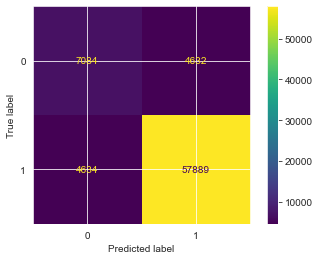

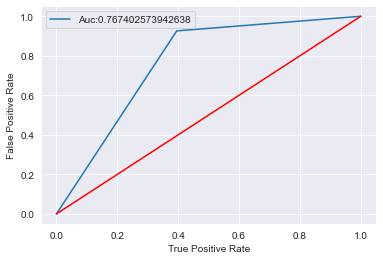

In [359]:
tree0 = DecisionTreeClassifier()

metrics_0a = classification_model_0(tree0)

In [360]:
metrics_0a.index = ['Decision_Tree_0']
metrics_0a

Precision   Recall  F1_score   Roc_auc
Decision_Tree_0   0.925707  0.92486  0.926605  0.767403

#### RANDOM FOREST

              precision    recall  f1-score   support

           0       0.74      0.65      0.69     11716
           1       0.94      0.96      0.95     62523

    accuracy                           0.91     74239
   macro avg       0.84      0.80      0.82     74239
weighted avg       0.90      0.91      0.91     74239



<Figure size 720x720 with 0 Axes>

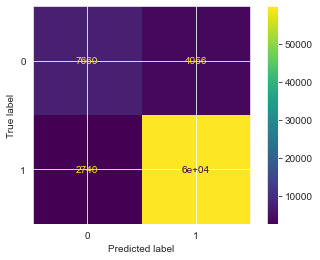

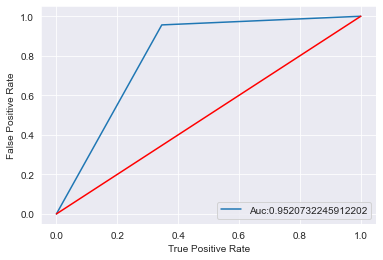

In [361]:
forest0 = RandomForestClassifier()

metrics_0b = classification_model_0(forest0)

In [362]:
metrics_0b.index = ['Random_Forest_0']
metrics_0b

Precision    Recall  F1_score   Roc_auc
Random_Forest_0   0.956192  0.956528  0.946361  0.952073

#### EXTRA TREES

              precision    recall  f1-score   support

           0       0.72      0.64      0.68     11716
           1       0.93      0.95      0.94     62523

    accuracy                           0.90     74239
   macro avg       0.83      0.80      0.81     74239
weighted avg       0.90      0.90      0.90     74239



<Figure size 720x720 with 0 Axes>

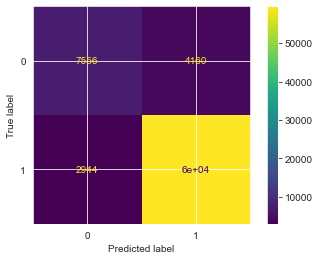

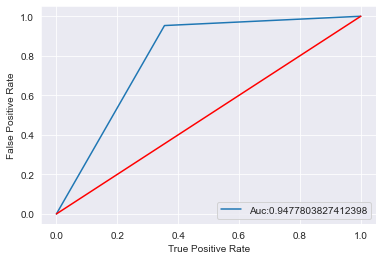

In [363]:
ext0 = ExtraTreesClassifier()

metrics_0c = classification_model_0(ext0)

In [364]:
metrics_0c.index = ['Extra_Trees_0']
metrics_0c

Precision    Recall  F1_score  Roc_auc
Extra_Trees_0   0.953473  0.952434  0.943869  0.94778

#### KNN

              precision    recall  f1-score   support

           0       0.69      0.52      0.59     11716
           1       0.91      0.96      0.93     62523

    accuracy                           0.89     74239
   macro avg       0.80      0.74      0.76     74239
weighted avg       0.88      0.89      0.88     74239



<Figure size 720x720 with 0 Axes>

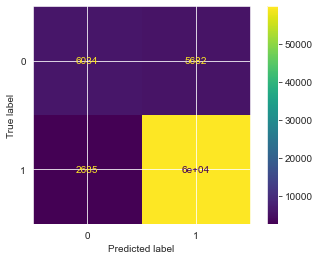

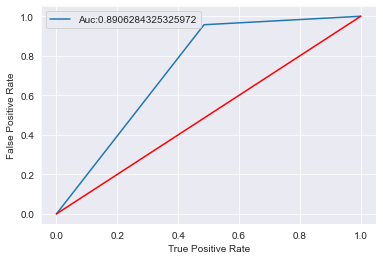

In [365]:
knn0 = KNeighborsClassifier()

metrics_0d = classification_model_0(knn0)

In [366]:
metrics_0d.index = ['KNN_0']
metrics_0d

Precision    Recall  F1_score   Roc_auc
KNN_0   0.956768  0.956768  0.933834  0.890628

#### LOGISTIC REGRESSION

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.75      0.62      0.68     11716
           1       0.93      0.96      0.95     62523

    accuracy                           0.91     74239
   macro avg       0.84      0.79      0.81     74239
weighted avg       0.90      0.91      0.90     74239



<Figure size 720x720 with 0 Axes>

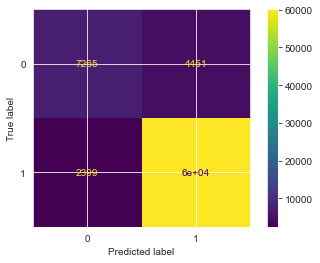

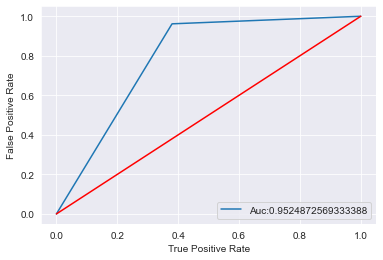

In [369]:
log0 = LogisticRegression()

metrics_0e = classification_model_0(log0)

In [370]:
metrics_0e.index = ['Logistic_Regression_0']
metrics_0e

Precision   Recall  F1_score   Roc_auc
Logistic_Regression_0    0.96187  0.96187  0.946303  0.952487

#### XGBOOST

              precision    recall  f1-score   support

           0       0.73      0.66      0.69     11716
           1       0.94      0.95      0.95     62523

    accuracy                           0.91     74239
   macro avg       0.83      0.81      0.82     74239
weighted avg       0.91      0.91      0.91     74239



<Figure size 720x720 with 0 Axes>

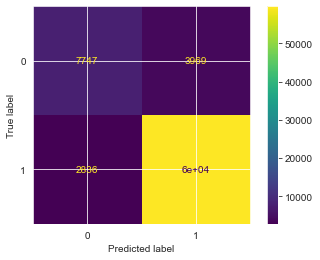

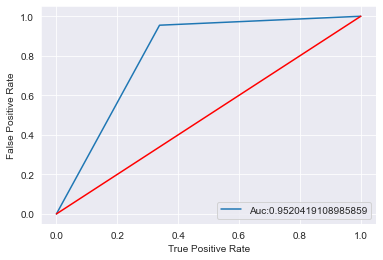

In [371]:
import xgboost as xgb
xgb0 = xgb.XGBClassifier()

metrics_0f = classification_model_0(xgb0)

In [372]:
metrics_0f.index = ['Xgboost_0']
metrics_0f

Precision    Recall  F1_score   Roc_auc
Xgboost_0   0.955121  0.955121  0.946027  0.952042

#### ADABOOST

              precision    recall  f1-score   support

           0       0.75      0.62      0.68     11716
           1       0.93      0.96      0.95     62523

    accuracy                           0.91     74239
   macro avg       0.84      0.79      0.81     74239
weighted avg       0.90      0.91      0.90     74239



<Figure size 720x720 with 0 Axes>

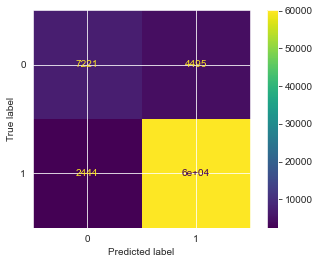

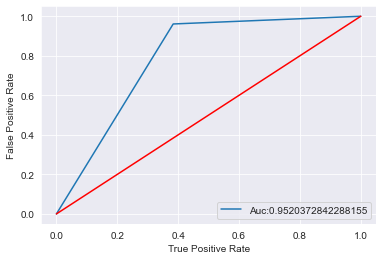

In [374]:
adaboost0 = AdaBoostClassifier()

metrics_0g = classification_model_0(adaboost0)

In [375]:
metrics_0g.index = ['Adaboost_0']
metrics_0g

Precision    Recall  F1_score   Roc_auc
Adaboost_0   0.960974  0.960974  0.945861  0.952037

In [376]:
metrics_0 = pd.concat([metrics_0a,metrics_0b,metrics_0c,metrics_0d,metrics_0e,metrics_0f,metrics_0g])
metrics_0

Precision    Recall  F1_score   Roc_auc
Decision_Tree_0         0.925707  0.924860  0.926605  0.767403
Random_Forest_0         0.956192  0.956528  0.946361  0.952073
Extra_Trees_0           0.953473  0.952434  0.943869  0.947780
KNN_0                   0.956768  0.956768  0.933834  0.890628
Logistic_Regression_0   0.961870  0.961870  0.946303  0.952487
Xgboost_0               0.955121  0.955121  0.946027  0.952042
Adaboost_0              0.960974  0.960974  0.945861  0.952037

## EXPERIMENT 1
`FEATURE ENGINEERING`:

 - Null values: Mean/Median/Mode Imputation 
 - Encoding: Label Encoder
 - Transformation: Sqrt
 - Outliers: 95% winsorization
 - Scaling: Robust Scaler
 - Resampling: Adasyn

In [380]:
train_1 = reduced_train.copy()
num_1 = train_1.select_dtypes('number').columns
cat_1 = train_1.select_dtypes('O').columns

In [381]:
#median/mode imputation
median_imputer = SimpleImputer(strategy= 'median')
mode_imputer = SimpleImputer(strategy= 'most_frequent')

In [382]:
train_1[num_1] = median_imputer.fit_transform(train_1[num_1])
train_1[cat_1] = mode_imputer.fit_transform(train_1[cat_1])

In [385]:
#label encoding
le = LabelEncoder()

for i in cat_1:
    le = LabelEncoder()
    train_1[i] = le.fit_transform(train_1[i])

In [386]:
#sqrt transformation
sqrt_transformer = FunctionTransformer(np.sqrt)
train_1[num_1] = sqrt_transformer.transform(train_1[num_1])


In [387]:
#95% winsorization

def winsorize(data, variable):
    Q9 = data[variable].quantile(0.975)
    Q1 =  data[variable].quantile(0.025)
    
    
    return np.where(data[variable]>Q9, Q9, np.where(data[variable]<Q1, Q1, data[variable]))

In [390]:
for i in num_1:
    train_1[i]=winsorize(train_1, i)

In [391]:
#robust scaling
robust_scaler = RobustScaler()
train_1[num_1] = robust_scaler.fit_transform(train_1[num_1])

<IPython.core.display.Javascript object>

In [392]:
xtrain1 = train_1.drop(['action_taken_name'], axis=1)
ytrain1 = train_1['action_taken_name']

In [396]:
# adasyn resampling
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
xtrain1, ytrain1 = adasyn.fit_resample(xtrain1, ytrain1)

### Model Building

In [400]:
def classification_model_1(model):
    
    recall = cross_val_score(model, xtrain1, ytrain1, cv=3, scoring='recall')
    precision = cross_val_score(model, xtrain1, ytrain1, cv=3, scoring='precision')
    f1 = cross_val_score(model, xtrain1, ytrain1, cv=3, scoring='f1')
    roc_auc = cross_val_score(model, xtrain1, ytrain1, cv=3, scoring='roc_auc')
    
    y_pred = cross_val_predict(model,xtrain1, ytrain1)
    
    print(classification_report(ytrain1, y_pred))
    
    cm = confusion_matrix(ytrain1, y_pred)
    
    plt.figure(figsize=(11,11))
    ConfusionMatrixDisplay(cm, ).plot();plt.show()
    
    fpr, tpr, thresh = roc_curve(ytrain1, y_pred)
    
    plt.plot(fpr, tpr, label = f'Auc:{roc_auc.mean()}')
    plt.plot([0,1], [0,1], color='red')
    plt.legend()
    plt.xlabel('True Positive Rate'); plt.ylabel('False Positive Rate');plt.show()
    
    metrics_table = pd.DataFrame({'Precision':precision.mean(),
                                  'Recall':recall.mean(),
                                  'F1_score':f1.mean(),
                                  'Roc_auc':roc_auc.mean()}, index=[1])
    
    return metrics_table 

#### DECISION TREE

              precision    recall  f1-score   support

           0       0.88      0.85      0.86    168451
           1       0.86      0.88      0.87    172382

    accuracy                           0.87    340833
   macro avg       0.87      0.87      0.87    340833
weighted avg       0.87      0.87      0.87    340833



<Figure size 792x792 with 0 Axes>

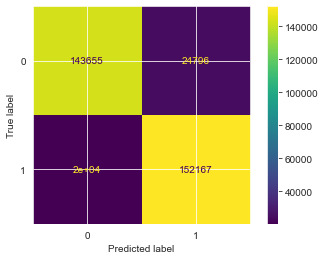

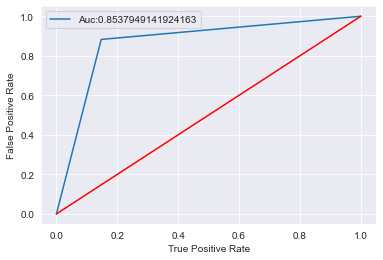

In [401]:
tree1 = DecisionTreeClassifier()

metrics_1a = classification_model_1(tree1)

In [402]:
metrics_1a.index = ['Decision_Tree_1']

metrics_1a

Precision    Recall  F1_score   Roc_auc
Decision_Tree_1   0.882876  0.882929  0.860832  0.853795

#### RANDOM FOREST

              precision    recall  f1-score   support

           0       0.87      0.98      0.92    168451
           1       0.97      0.85      0.91    172382

    accuracy                           0.91    340833
   macro avg       0.92      0.91      0.91    340833
weighted avg       0.92      0.91      0.91    340833



<Figure size 792x792 with 0 Axes>

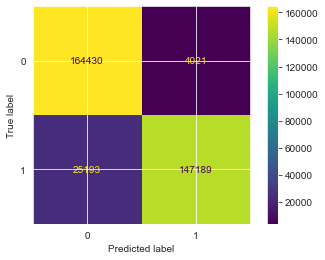

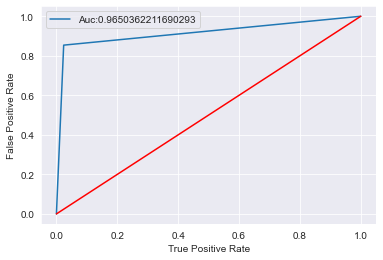

In [403]:
forest1 = RandomForestClassifier()

metrics_1b = classification_model_1(forest1)

In [404]:
metrics_1b.index = ['Random_Forest_1']

metrics_1b

Precision    Recall  F1_score   Roc_auc
Random_Forest_1   0.851191  0.851574   0.90442  0.965036

#### EXTRA TREES

              precision    recall  f1-score   support

           0       0.87      0.98      0.92    168451
           1       0.98      0.86      0.91    172382

    accuracy                           0.92    340833
   macro avg       0.92      0.92      0.92    340833
weighted avg       0.93      0.92      0.92    340833



<Figure size 792x792 with 0 Axes>

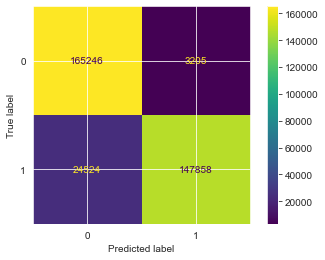

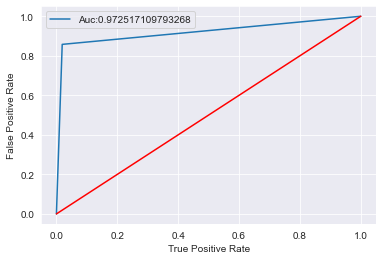

In [405]:
ext1 = ExtraTreesClassifier()

metrics_1c = classification_model_1(ext1)

In [406]:
metrics_1c.index = ['Extra_Trees_1']

metrics_1c

Precision    Recall  F1_score   Roc_auc
Extra_Trees_1   0.851765  0.852148  0.909536  0.972517

#### KNN

              precision    recall  f1-score   support

           0       0.83      0.97      0.90    168451
           1       0.97      0.80      0.88    172382

    accuracy                           0.89    340833
   macro avg       0.90      0.89      0.89    340833
weighted avg       0.90      0.89      0.89    340833



<Figure size 792x792 with 0 Axes>

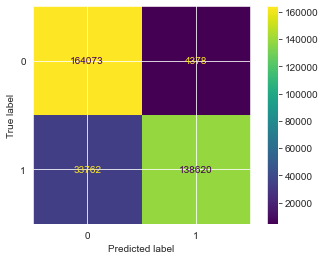

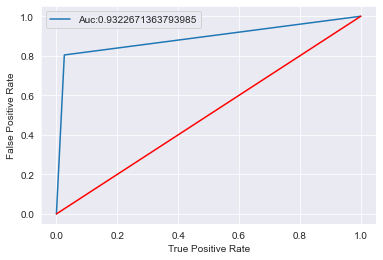

In [407]:
knn1 = KNeighborsClassifier()

metrics_1d = classification_model_1(knn1)

In [408]:
metrics_1d.index = ['KNN_1']

metrics_1d

Precision    Recall  F1_score   Roc_auc
KNN_1   0.799051  0.799051  0.871501  0.932267

#### LOGISTIC REGRESSION


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    168451
           1       0.99      0.74      0.85    172382

    accuracy                           0.86    340833
   macro avg       0.89      0.87      0.86    340833
weighted avg       0.89      0.86      0.86    340833



<Figure size 792x792 with 0 Axes>

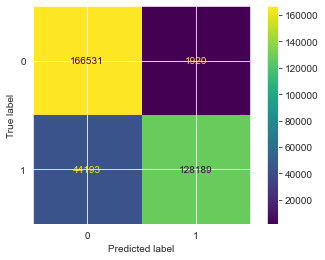

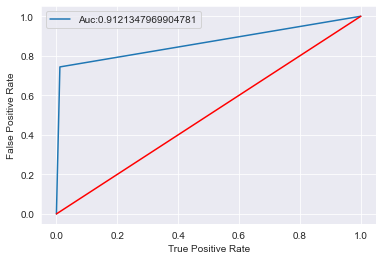

In [410]:
log1 = LogisticRegression()

metrics_1e = classification_model_1(log1)

In [411]:
metrics_1e.index = ['Logistic_Regression_1']

metrics_1e

Precision    Recall  F1_score   Roc_auc
Logistic_Regression_1   0.744097  0.744097  0.847099  0.912135

#### XGBOOST


              precision    recall  f1-score   support

           0       0.87      0.94      0.90    168451
           1       0.93      0.87      0.90    172382

    accuracy                           0.90    340833
   macro avg       0.90      0.90      0.90    340833
weighted avg       0.90      0.90      0.90    340833



<Figure size 792x792 with 0 Axes>

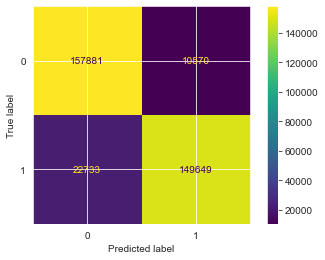

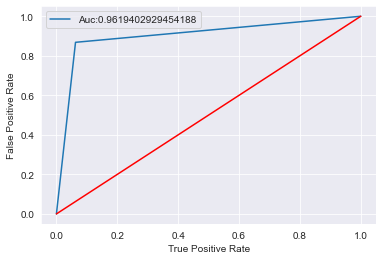

In [412]:
xgb1 = xgb.XGBClassifier()

metrics_1f = classification_model_1(xgb1)

In [413]:
metrics_1f.index = ['Xgboost_1']

metrics_1f

Precision    Recall  F1_score  Roc_auc
Xgboost_1   0.875845  0.875845    0.8804  0.96194

#### ADABOOST


              precision    recall  f1-score   support

           0       0.82      0.97      0.89    168451
           1       0.96      0.80      0.87    172382

    accuracy                           0.88    340833
   macro avg       0.89      0.88      0.88    340833
weighted avg       0.89      0.88      0.88    340833



<Figure size 792x792 with 0 Axes>

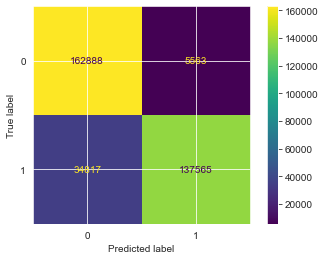

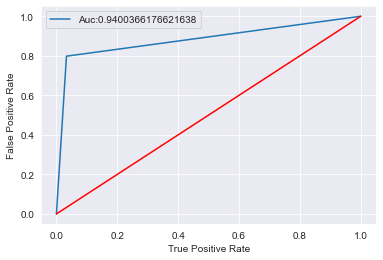

In [415]:
adaboost1 = AdaBoostClassifier()

metrics_1g = classification_model_1(adaboost1)

In [416]:
metrics_1g.index = ['Adaboost_1']

metrics_1g

Precision    Recall  F1_score   Roc_auc
Adaboost_1   0.798865  0.798865  0.870126  0.940037

In [417]:
metrics_1 = pd.concat([metrics_1a,metrics_1b,metrics_1c,metrics_1d,metrics_1e,metrics_1f,metrics_1g])
metrics_1

Precision    Recall  F1_score   Roc_auc
Decision_Tree_1         0.882876  0.882929  0.860832  0.853795
Random_Forest_1         0.851191  0.851574  0.904420  0.965036
Extra_Trees_1           0.851765  0.852148  0.909536  0.972517
KNN_1                   0.799051  0.799051  0.871501  0.932267
Logistic_Regression_1   0.744097  0.744097  0.847099  0.912135
Xgboost_1               0.875845  0.875845  0.880400  0.961940
Adaboost_1              0.798865  0.798865  0.870126  0.940037

## EXPERIMENT 2
`FEATURE ENGINEERING`:

 - Null values: Random sample and mode Imputation 
 - Encoding: Count encoding 
 - Transformation: Yeo-johnson
 - Outliers: 95% winsorization
 - Scaling: MinMAx Scaler
 - Resampling: Smote

In [455]:
train_2 = reduced_train.copy()
num_2 = train_2.select_dtypes('number').columns
cat_2 = train_2.select_dtypes('O').columns

In [456]:
# random sample imputation

def random_imputation(data, variable):
    #calculate the number of null values
    number_of_nans = data[variable].isnull().sum()
    
    #extract the number of nan values
    samples = data[variable].dropna().sample(number_of_nans, random_state=0, replace=True)
    
    #making their indexes identical
    samples.index = data[data[variable].isnull()].index
    
    # replace missing values
    data.loc[data[variable].isnull(), variable] = samples
    return data[variable]

In [457]:
for i in train_2:
    train_2[i] = random_imputation(train_2, i)

train_2.isnull().sum()  

agency_abbr                       0
loan_type_name                    0
property_type_name                0
loan_purpose_name                 0
owner_occupancy_name              0
loan_amount_000s                  0
preapproval_name                  0
action_taken_name                 0
state_name                        0
applicant_race_name_1             0
co_applicant_race_name_1          0
applicant_sex_name                0
co_applicant_sex_name             0
applicant_income_000s             0
purchaser_type_name               0
hoepa_status_name                 0
lien_status_name                  0
population                        0
minority_population               0
hud_median_family_income          0
tract_to_msamd_income             0
number_of_owner_occupied_units    0
number_of_1_to_4_family_units     0
Co-applicant                      0
dtype: int64

In [458]:
#box-cox transformation
yeo_johnson = PowerTransformer(method='yeo-johnson')
train_2[num_2] = yeo_johnson.fit_transform(train_2[num_2])

In [459]:
#90% winsorization

def winsorize(data, variable):
    Q9 = data[variable].quantile(0.95)
    Q1 =  data[variable].quantile(0.05)
    
    
    return np.where(data[variable]>Q9, Q9, np.where(data[variable]<Q1, Q1, data[variable]))

In [460]:
for i in num_2:
    train_2[i] = winsorize(train_2, i)

In [461]:
#min max scaling
minmax_scaler = MinMaxScaler()
train_2[num_2] = minmax_scaler.fit_transform(train_2[num_2])

In [462]:
xtrain2 = train_2.drop(['action_taken_name'], axis=1)
ytrain2 = train_2['action_taken_name']

In [464]:
cat_xtrain = xtrain2.select_dtypes('O')

In [465]:
#count encoding
for i in cat_xtrain:
    labels = xtrain2[i].value_counts().to_dict()
    xtrain2[i] =  xtrain2[i].map(labels)

In [466]:
#label encoding of target variable
le= LabelEncoder()
ytrain2 = le.fit_transform(ytrain2)

In [467]:
# adasyn resampling
smote = SMOTE()
xtrain2, ytrain2 = smote.fit_resample(xtrain2, ytrain2)

### Model Building

In [468]:
def classification_model_2(model):
    
    recall = cross_val_score(model, xtrain2, ytrain2, cv=3, scoring='recall')
    precision = cross_val_score(model, xtrain2, ytrain2, cv=3, scoring='precision')
    f1 = cross_val_score(model, xtrain2, ytrain2, cv=3, scoring='f1')
    roc_auc = cross_val_score(model, xtrain2, ytrain2, cv=3, scoring='roc_auc')
    
    y_pred = cross_val_predict(model,xtrain2, ytrain2)
    
    print(classification_report(ytrain2, y_pred))
    
    cm = confusion_matrix(ytrain2, y_pred)
    
    plt.figure(figsize=(12,12))
    ConfusionMatrixDisplay(cm, ).plot();plt.show()
    
    fpr, tpr, thresh = roc_curve(ytrain2, y_pred)
    
    plt.plot(fpr, tpr, label = f'Auc:{roc_auc.mean()}')
    plt.plot([0,1], [0,1], color='red')
    plt.legend()
    plt.xlabel('True Positive Rate'); plt.ylabel('False Positive Rate');plt.show()
    
    metrics_table = pd.DataFrame({'Precision':precision.mean(),
                                  'Recall':recall.mean(),
                                  'F1_score':f1.mean(),
                                  'Roc_auc':roc_auc.mean()}, index=[0])
    
    return metrics_table 

#### DECISION TREE

              precision    recall  f1-score   support

           0       0.88      0.87      0.88    172382
           1       0.87      0.88      0.88    172382

    accuracy                           0.88    344764
   macro avg       0.88      0.88      0.88    344764
weighted avg       0.88      0.88      0.88    344764



<Figure size 864x864 with 0 Axes>

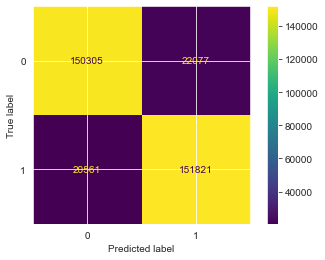

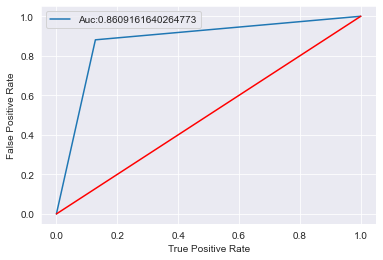

In [469]:
tree2 = DecisionTreeClassifier()

metrics_2a = classification_model_2(tree2)
 

In [470]:
metrics_2a.index = ['Decision_Tree_2']
 
metrics_2a

Precision    Recall  F1_score   Roc_auc
Decision_Tree_2   0.886142  0.886067  0.866381  0.860916

#### RANDOM FOREST

              precision    recall  f1-score   support

           0       0.88      0.96      0.92    172382
           1       0.96      0.87      0.91    172382

    accuracy                           0.92    344764
   macro avg       0.92      0.92      0.92    344764
weighted avg       0.92      0.92      0.92    344764



<Figure size 864x864 with 0 Axes>

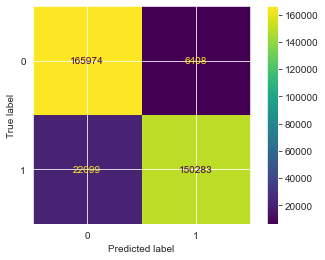

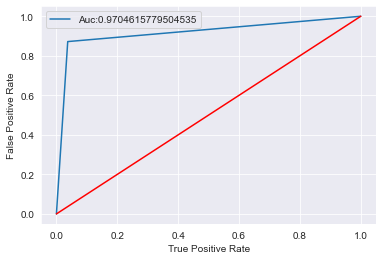

In [471]:
forest2 = RandomForestClassifier()
 
metrics_2b = classification_model_2(forest2)

In [472]:
metrics_2b.index = ['Random_Forest_2']
 
metrics_2b

Precision    Recall  F1_score   Roc_auc
Random_Forest_2   0.870607  0.870601  0.905706  0.970462

#### EXTRA TREES

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    172382
           1       0.98      0.87      0.92    172382

    accuracy                           0.93    344764
   macro avg       0.93      0.93      0.93    344764
weighted avg       0.93      0.93      0.93    344764



<Figure size 864x864 with 0 Axes>

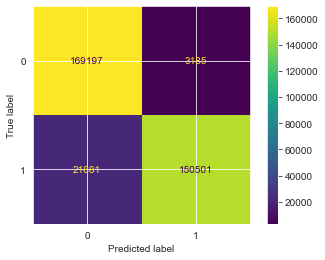

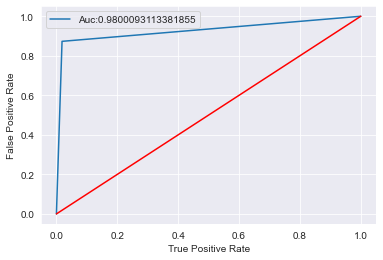

In [473]:
ext2 = ExtraTreesClassifier()
 
metrics_2c = classification_model_2(ext2)

In [474]:
metrics_2c.index = ['Extra_Trees_2']
 
metrics_2c

Precision    Recall  F1_score   Roc_auc
Extra_Trees_2   0.868652  0.868554  0.919919  0.980009

#### KNN


              precision    recall  f1-score   support

           0       0.87      0.96      0.91    172382
           1       0.96      0.85      0.90    172382

    accuracy                           0.91    344764
   macro avg       0.91      0.91      0.91    344764
weighted avg       0.91      0.91      0.91    344764



<Figure size 864x864 with 0 Axes>

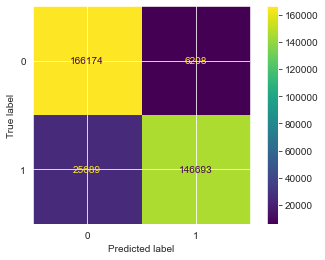

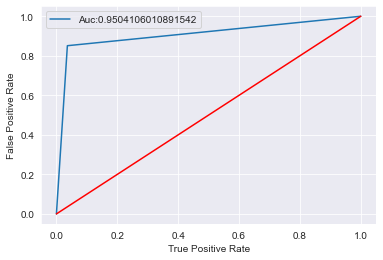

In [475]:
knn2 = KNeighborsClassifier()
 
metrics_2d = classification_model_2(knn2)

In [476]:
metrics_2d.index = ['KNN_2']
 
metrics_2d

Precision    Recall  F1_score   Roc_auc
KNN_2   0.846098  0.846098  0.898344  0.950411

#### LOGISTIC REGRESSION


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.82      0.96      0.88    172382
           1       0.95      0.78      0.86    172382

    accuracy                           0.87    344764
   macro avg       0.88      0.87      0.87    344764
weighted avg       0.88      0.87      0.87    344764



<Figure size 864x864 with 0 Axes>

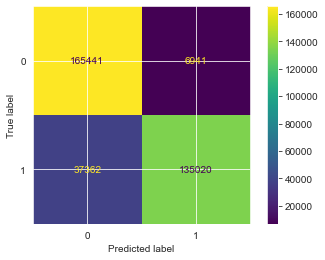

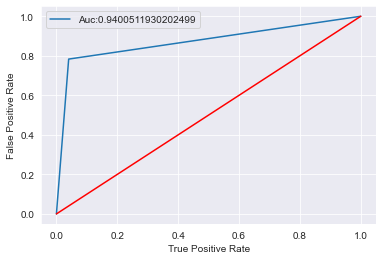

In [477]:
log2 = LogisticRegression()
 
metrics_2e = classification_model_2(log2)

In [478]:
metrics_2e.index = ['Logistic_Regression_2']
 
metrics_2e

Precision  Recall  F1_score   Roc_auc
Logistic_Regression_2     0.7834  0.7834  0.859083  0.940051

#### XGBOOST


              precision    recall  f1-score   support

           0       0.90      0.93      0.91    172382
           1       0.92      0.89      0.91    172382

    accuracy                           0.91    344764
   macro avg       0.91      0.91      0.91    344764
weighted avg       0.91      0.91      0.91    344764



<Figure size 864x864 with 0 Axes>

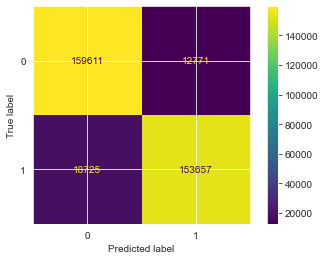

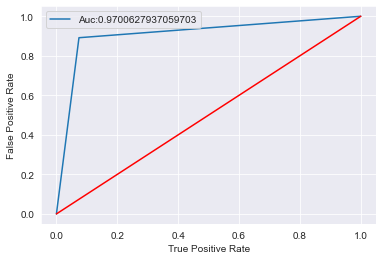

In [479]:
xgb2 = xgb.XGBClassifier()

metrics_2f = classification_model_2(xgb2)

In [480]:
metrics_2f.index = ['Xgboost_2']
 
metrics_2f

Precision    Recall  F1_score   Roc_auc
Xgboost_2   0.896033  0.896033   0.88744  0.970063

#### ADABOOST


              precision    recall  f1-score   support

           0       0.85      0.95      0.90    172382
           1       0.95      0.83      0.89    172382

    accuracy                           0.89    344764
   macro avg       0.90      0.89      0.89    344764
weighted avg       0.90      0.89      0.89    344764



<Figure size 864x864 with 0 Axes>

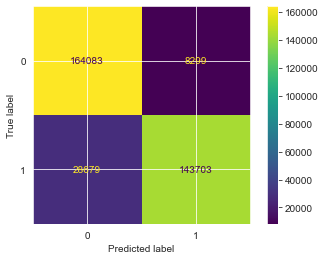

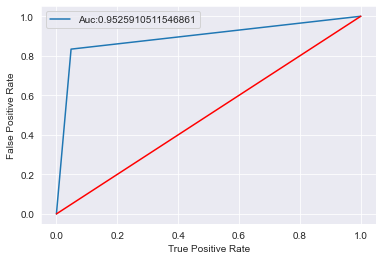

In [481]:
adaboost2 = AdaBoostClassifier()
  
metrics_2g = classification_model_2(adaboost2)

In [482]:
metrics_2g.index = ['Adaboost_2']
 
metrics_2g

Precision    Recall  F1_score   Roc_auc
Adaboost_2   0.836787  0.836787  0.881555  0.952591

In [483]:
metrics_2 = pd.concat([metrics_2a,metrics_2b,metrics_2c,metrics_2d,metrics_2e,metrics_2f,metrics_2g])
metrics_2

Precision    Recall  F1_score   Roc_auc
Decision_Tree_2         0.886142  0.886067  0.866381  0.860916
Random_Forest_2         0.870607  0.870601  0.905706  0.970462
Extra_Trees_2           0.868652  0.868554  0.919919  0.980009
KNN_2                   0.846098  0.846098  0.898344  0.950411
Logistic_Regression_2   0.783400  0.783400  0.859083  0.940051
Xgboost_2               0.896033  0.896033  0.887440  0.970063
Adaboost_2              0.836787  0.836787  0.881555  0.952591

## EXPERIMENT 3
`FEATURE ENGINEERING`:

 - Null values: Median/Mode imputation 
 - Encoding: One hot encoder 
 - Transformation: Yeo-johnson
 - Outliers: 95% winsorization
 - Scaling: StandardScaler
 - Resampling: Smote

In [59]:
train_3 = reduced_train.copy()
num_3 = train_3.select_dtypes('number').columns
cat_3 = train_3.select_dtypes('O').columns

In [60]:
#median/mode imputation
median_imputer = SimpleImputer(strategy= 'median')
mode_imputer = SimpleImputer(strategy= 'most_frequent')

In [61]:
train_3[num_3] = median_imputer.fit_transform(train_3[num_3])
train_3[cat_3] = mode_imputer.fit_transform(train_3[cat_3])

In [62]:
#yeo-johnson transformer
yeo_johnson_transformer = PowerTransformer(method = 'yeo-johnson')
train_3[num_3] = yeo_johnson_transformer.fit_transform(train_3[num_3])


In [63]:
#95% winsorization

def winsorize(data, variable):
    Q9 = data[variable].quantile(0.975)
    Q1 =  data[variable].quantile(0.025)
    
    
    return np.where(data[variable]>Q9, Q9, np.where(data[variable]<Q1, Q1, data[variable]))

In [64]:
for i in num_3:
    train_3[i] = winsorize(train_3, i)

In [65]:
#standard scaling
scaler = StandardScaler()
train_3[num_3] = scaler.fit_transform(train_3[num_3])


In [66]:
xtrain3 = train_3.drop(['action_taken_name'], axis=1)
ytrain3 = train_3['action_taken_name']

le = LabelEncoder()
#label encoding of target variable
ytrain3 = le.fit_transform(ytrain3)

In [67]:
#one hot encoding
xtrain3 = pd.get_dummies(xtrain3)

In [68]:
# smote resampling
smote = SMOTE()

xtrain3, ytrain3 = smote.fit_resample(xtrain3, ytrain3)

### Model Building

In [72]:
def classification_model_3(model):
    
    recall = cross_val_score(model, xtrain3, ytrain3, cv=3, scoring='recall')
    precision = cross_val_score(model, xtrain3, ytrain3, cv=3, scoring='precision')
    f1 = cross_val_score(model, xtrain3, ytrain3, cv=3, scoring='f1')
    roc_auc = cross_val_score(model, xtrain3, ytrain3, cv=3, scoring='roc_auc')
    
    y_pred = cross_val_predict(model,xtrain3, ytrain3)
    
    print(classification_report(ytrain3, y_pred))
    
    cm = confusion_matrix(ytrain3, y_pred)
    
    plt.figure(figsize=(13,13))
    ConfusionMatrixDisplay(cm, ).plot();plt.show()
    
    fpr, tpr, thresh = roc_curve(ytrain3, y_pred)
    
    plt.plot(fpr, tpr, label = f'Auc:{roc_auc.mean()}')
    plt.plot([0,1], [0,1], color='red')
    plt.legend()
    plt.xlabel('True Positive Rate'); plt.ylabel('False Positive Rate');plt.show()
    
    metrics_table = pd.DataFrame({'Precision':precision.mean(),
                                  'Recall':recall.mean(),
                                  'F1_score':f1.mean(),
                                  'Roc_auc':roc_auc.mean()}, index=[3])
    
    return metrics_table 

#### DECISION TREE


              precision    recall  f1-score   support

           0       0.89      0.89      0.89    172867
           1       0.89      0.89      0.89    172867

    accuracy                           0.89    345734
   macro avg       0.89      0.89      0.89    345734
weighted avg       0.89      0.89      0.89    345734



<Figure size 936x936 with 0 Axes>

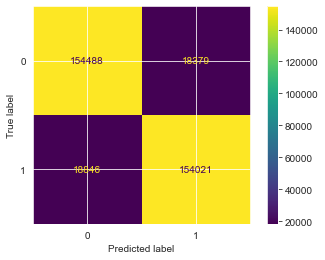

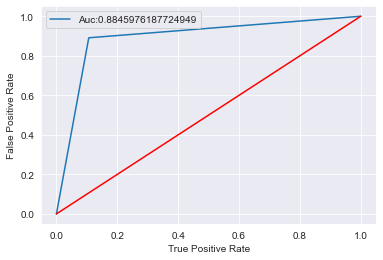

In [73]:
tree3 = DecisionTreeClassifier()
 
metrics_3a = classification_model_3(tree3)

In [74]:
metrics_3a.index = ['Decision_Tree_3']
 
metrics_3a

Precision    Recall  F1_score   Roc_auc
Decision_Tree_3   0.891743  0.891535   0.88717  0.884598

#### RANDOM FOREST


              precision    recall  f1-score   support

           0       0.90      0.97      0.93    172867
           1       0.97      0.89      0.93    172867

    accuracy                           0.93    345734
   macro avg       0.93      0.93      0.93    345734
weighted avg       0.93      0.93      0.93    345734



<Figure size 936x936 with 0 Axes>

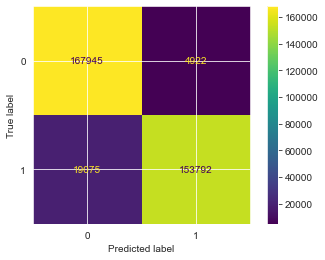

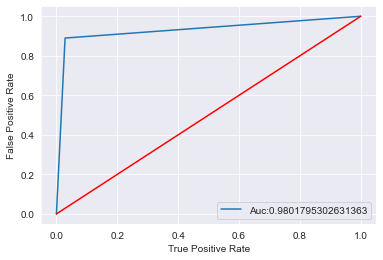

In [75]:
forest3 = RandomForestClassifier()
 
metrics_3b = classification_model_3(forest3)

In [76]:
metrics_3b.index = ['Random_Forest_3']
 
metrics_3b

Precision    Recall  F1_score  Roc_auc
Random_Forest_3   0.886456  0.886485  0.923397  0.98018

#### EXTRA TREES


              precision    recall  f1-score   support

           0       0.91      0.97      0.94    172867
           1       0.97      0.90      0.93    172867

    accuracy                           0.93    345734
   macro avg       0.94      0.93      0.93    345734
weighted avg       0.94      0.93      0.93    345734



<Figure size 936x936 with 0 Axes>

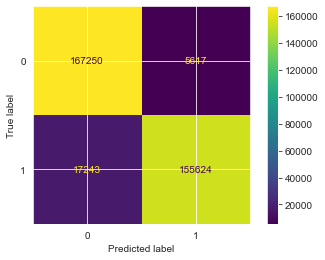

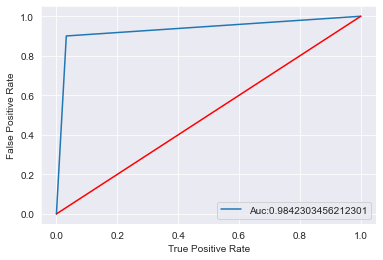

In [77]:
ext3 = ExtraTreesClassifier()
 
metrics_3c = classification_model_3(ext3)

In [78]:
metrics_3c.index = ['Extra_Trees_3']
 
metrics_3c

Precision    Recall  F1_score  Roc_auc
Extra_Trees_3    0.89699  0.897436  0.927533  0.98423

#### KNN


              precision    recall  f1-score   support

           0       0.86      0.99      0.92    172867
           1       0.99      0.85      0.91    172867

    accuracy                           0.92    345734
   macro avg       0.93      0.92      0.92    345734
weighted avg       0.93      0.92      0.92    345734



<Figure size 936x936 with 0 Axes>

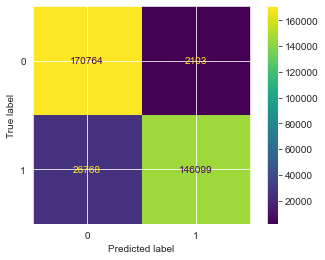

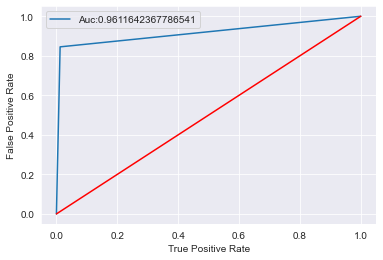

In [79]:
knn3 = KNeighborsClassifier()
 
metrics_3d = classification_model_3(knn3)

In [80]:
metrics_3d.index = ['KNN_3']
 
metrics_3d

Precision    Recall  F1_score   Roc_auc
KNN_3   0.842237  0.842237  0.907934  0.961164

#### LOGISTIC REGRESSION


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.89      0.92      0.91    172867
           1       0.92      0.89      0.90    172867

    accuracy                           0.91    345734
   macro avg       0.91      0.91      0.91    345734
weighted avg       0.91      0.91      0.91    345734



<Figure size 936x936 with 0 Axes>

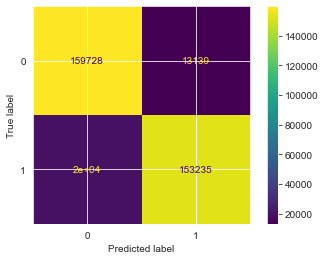

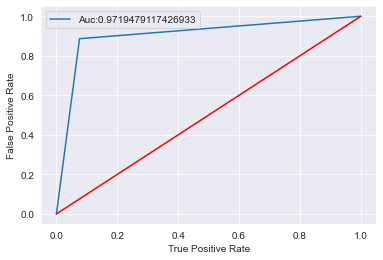

In [81]:
log3 = LogisticRegression()
 
metrics_3e = classification_model_3(log3)

In [82]:
metrics_3e.index = ['Logistic_Regression_3']
 
metrics_3e

Precision    Recall  F1_score   Roc_auc
Logistic_Regression_3   0.886416  0.886416  0.896699  0.971948

#### XGBOOST


              precision    recall  f1-score   support

           0       0.90      0.93      0.92    172867
           1       0.93      0.90      0.91    172867

    accuracy                           0.91    345734
   macro avg       0.92      0.91      0.91    345734
weighted avg       0.92      0.91      0.91    345734



<Figure size 936x936 with 0 Axes>

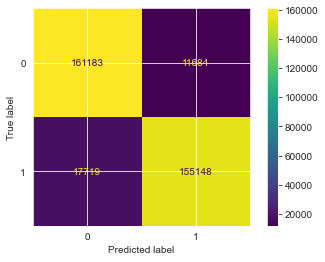

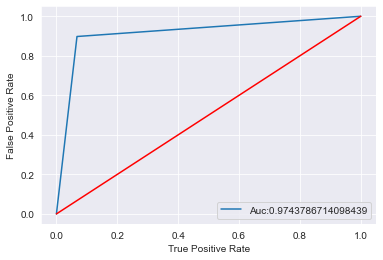

In [83]:
import xgboost as xgb

xgb3 = xgb.XGBClassifier()
 

metrics_3f = classification_model_3(xgb3)

In [84]:
metrics_3f.index = ['Xgboost_3']
 
metrics_3f

Precision    Recall  F1_score   Roc_auc
Xgboost_3   0.900039  0.900039   0.90062  0.974379

#### ADABOOST


              precision    recall  f1-score   support

           0       0.86      0.95      0.90    172867
           1       0.95      0.84      0.89    172867

    accuracy                           0.90    345734
   macro avg       0.90      0.90      0.90    345734
weighted avg       0.90      0.90      0.90    345734



<Figure size 936x936 with 0 Axes>

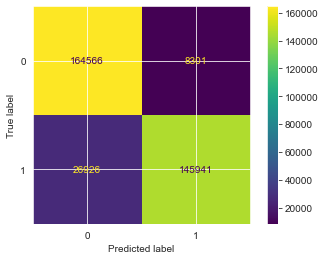

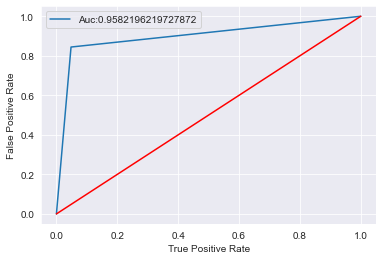

In [86]:
adaboost3 = AdaBoostClassifier()
 
metrics_3g = classification_model_3(adaboost3)

In [87]:
metrics_3g.index = ['Adaboost_3']
 
metrics_3g

Precision   Recall  F1_score  Roc_auc
Adaboost_3    0.84362  0.84362  0.889705  0.95822

In [88]:
metrics_3 = pd.concat([metrics_3a,metrics_3b,metrics_3c,metrics_3d,metrics_3e,metrics_3f,metrics_3g])
metrics_3

Precision    Recall  F1_score   Roc_auc
Decision_Tree_3         0.891743  0.891535  0.887170  0.884598
Random_Forest_3         0.886456  0.886485  0.923397  0.980180
Extra_Trees_3           0.896990  0.897436  0.927533  0.984230
KNN_3                   0.842237  0.842237  0.907934  0.961164
Logistic_Regression_3   0.886416  0.886416  0.896699  0.971948
Xgboost_3               0.900039  0.900039  0.900620  0.974379
Adaboost_3              0.843620  0.843620  0.889705  0.958220

## EXPERIMENT 4
`FEATURE ENGINEERING`:

 - Null values: Median/Mode imputation 
 - Encoding: One-Hot 
 - Transformation: log
 - Outliers: 90% winsorization
 - Scaling: StandardScaler
 - Resampling: Smote + totemlinks

In [89]:
train_4 = reduced_train.copy()
num_4 = train_4.select_dtypes('number').columns

cat_4 = train_4.select_dtypes('O').columns

In [90]:
#imputer
median_imputer = SimpleImputer(strategy = 'median')
mode_imputer = median_imputer = SimpleImputer(strategy = 'most_frequent')

train_4[num_4] = median_imputer.fit_transform(train_4[num_4])
train_4[cat_4] = mode_imputer.fit_transform(train_4[cat_4])

In [91]:
#log transformer
log_transformer = FunctionTransformer(np.log1p)

train_4[num_4] = log_transformer.fit_transform(train_4[num_4])

In [92]:
#90% winsorization

def winsorize(data, variable):

    Q9 = data[variable].quantile(0.95)

    Q1 =  data[variable].quantile(0.05)

    return np.where(data[variable]>Q9, Q9, np.where(data[variable]<Q1, Q1, data[variable]))

In [93]:
for i in num_4:

    train_4[i] = winsorize(train_4, i)

In [94]:
#standard scaling
scaler = StandardScaler()

train_4[num_4] = scaler.fit_transform(train_4[num_4])

In [95]:
xtrain4 = train_4.drop(['action_taken_name'], axis=1)

ytrain4 = train_4['action_taken_name']



#label encoding of target variable
ytrain4 = le.transform(ytrain4)

In [100]:
#one hot encoding
xtrain4 = pd.get_dummies(xtrain4)

In [101]:
#smote+tomek links resampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [102]:
resampler = SMOTETomek(tomek = TomekLinks(sampling_strategy = 'majority'))
xtrain4, ytrain4 = resampler.fit_resample(xtrain4, ytrain4)

### Model Building

In [103]:
def classification_model_4(model):
    
    recall = cross_val_score(model, xtrain4, ytrain4, cv=3, scoring='recall')
    precision = cross_val_score(model, xtrain4, ytrain4, cv=3, scoring='precision')
    f1 = cross_val_score(model, xtrain4, ytrain4, cv=3, scoring='f1')
    roc_auc = cross_val_score(model, xtrain4, ytrain4, cv=3, scoring='roc_auc')
    
    y_pred = cross_val_predict(model,xtrain4, ytrain4)
    
    print(classification_report(ytrain4, y_pred))
    
    cm = confusion_matrix(ytrain4, y_pred)
    
    plt.figure(figsize=(14,14))
    ConfusionMatrixDisplay(cm, ).plot();plt.show()
    
    fpr, tpr, thresh = roc_curve(ytrain4, y_pred)
    
    plt.plot(fpr, tpr, label = f'Auc:{roc_auc.mean()}')
    plt.plot([0,1], [0,1], color='red')
    plt.legend()
    plt.xlabel('True Positive Rate'); plt.ylabel('False Positive Rate');plt.show()
    
    metrics_table = pd.DataFrame({'Precision':precision.mean(),
                                  'Recall':recall.mean(),
                                  'F1_score':f1.mean(),
                                  'Roc_auc':roc_auc.mean()}, index=[4])
    
    return metrics_table 

#### DECISION TREE

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    172347
           1       0.90      0.89      0.89    172867

    accuracy                           0.89    345214
   macro avg       0.89      0.89      0.89    345214
weighted avg       0.89      0.89      0.89    345214



<Figure size 1008x1008 with 0 Axes>

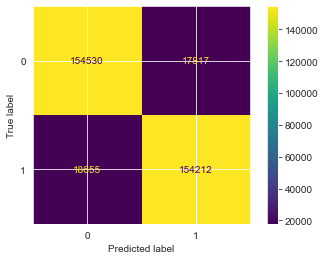

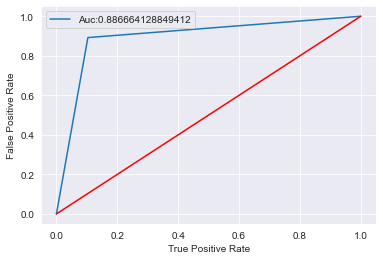

In [104]:
tree4 = DecisionTreeClassifier()
 
metrics_4a = classification_model_4(tree4)

In [105]:
metrics_4a.index = ['Decision_Tree_4']
 
metrics_4a

Precision    Recall  F1_score   Roc_auc
Decision_Tree_4   0.891275  0.891523  0.888352  0.886664

#### RANDOM FOREST

              precision    recall  f1-score   support

           0       0.90      0.97      0.93    172347
           1       0.97      0.89      0.93    172867

    accuracy                           0.93    345214
   macro avg       0.93      0.93      0.93    345214
weighted avg       0.93      0.93      0.93    345214



<Figure size 1008x1008 with 0 Axes>

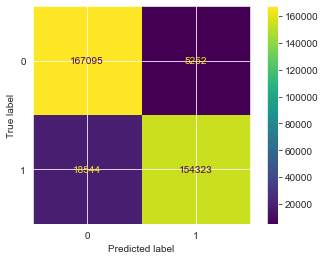

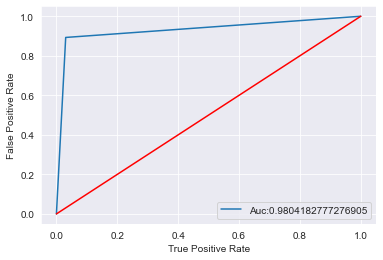

In [106]:
forest4 = RandomForestClassifier()

metrics_4b = classification_model_4(forest4)

In [107]:
metrics_4b.index = ['Random_Forest_4']
 
metrics_4b

Precision    Recall  F1_score   Roc_auc
Random_Forest_4   0.888747  0.889013  0.923917  0.980418

#### EXTRA TREES

              precision    recall  f1-score   support

           0       0.91      0.97      0.94    172347
           1       0.97      0.90      0.93    172867

    accuracy                           0.94    345214
   macro avg       0.94      0.94      0.94    345214
weighted avg       0.94      0.94      0.94    345214



<Figure size 1008x1008 with 0 Axes>

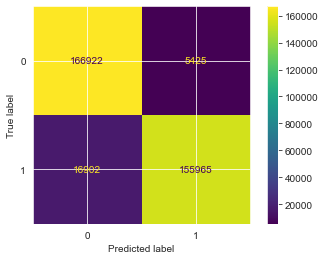

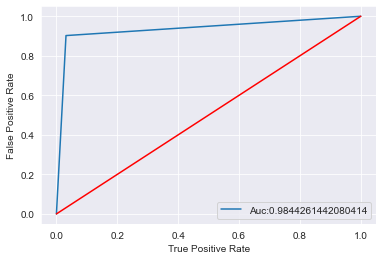

In [108]:
ext4 = ExtraTreesClassifier()
 
metrics_4c = classification_model_4(ext4)

In [109]:
metrics_4c.index = ['Extra_Trees_4']
 
metrics_4c

Precision    Recall  F1_score   Roc_auc
Extra_Trees_4   0.898992  0.898974  0.929309  0.984426

#### KNN

              precision    recall  f1-score   support

           0       0.87      0.99      0.92    172347
           1       0.99      0.85      0.91    172867

    accuracy                           0.92    345214
   macro avg       0.93      0.92      0.92    345214
weighted avg       0.93      0.92      0.92    345214



<Figure size 1008x1008 with 0 Axes>

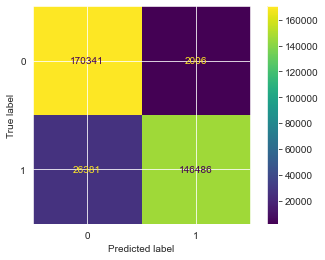

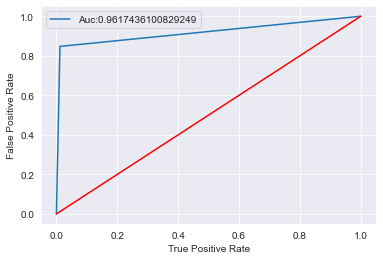

In [110]:
knn4 = KNeighborsClassifier()
 
metrics_4d = classification_model_4(knn4)

In [111]:
metrics_4d.index = ['KNN_4']
 
metrics_4d

Precision    Recall  F1_score   Roc_auc
KNN_4   0.843284  0.843284  0.908605  0.961744

#### LOGISTIC REGRESSION

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.89      0.92      0.91    172347
           1       0.92      0.89      0.91    172867

    accuracy                           0.91    345214
   macro avg       0.91      0.91      0.91    345214
weighted avg       0.91      0.91      0.91    345214



<Figure size 1008x1008 with 0 Axes>

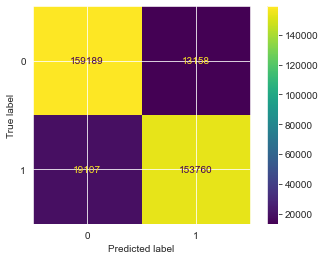

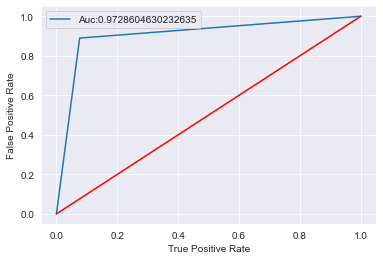

In [112]:
log4 = LogisticRegression()
 
metrics_4e = classification_model_4(log4)

In [113]:
metrics_4e.index = ['Logistic_Regression_4']
 
metrics_4e

Precision    Recall  F1_score  Roc_auc
Logistic_Regression_4   0.889354  0.889354  0.899194  0.97286

#### XGBOOST

              precision    recall  f1-score   support

           0       0.90      0.93      0.92    172347
           1       0.93      0.90      0.91    172867

    accuracy                           0.91    345214
   macro avg       0.92      0.91      0.91    345214
weighted avg       0.92      0.91      0.91    345214



<Figure size 1008x1008 with 0 Axes>

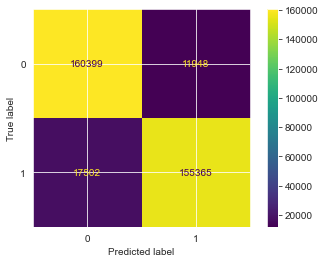

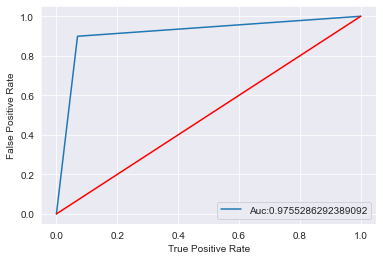

In [114]:
import xgboost as xgb
 
xgb4 = xgb.XGBClassifier()
 
metrics_4f = classification_model_4(xgb4)

In [115]:
metrics_4f.index = ['Xgboost_4']
 
metrics_4f

Precision    Recall  F1_score   Roc_auc
Xgboost_4   0.903735  0.903735  0.900885  0.975529

#### ADABOOST


              precision    recall  f1-score   support

           0       0.86      0.95      0.90    172347
           1       0.95      0.85      0.89    172867

    accuracy                           0.90    345214
   macro avg       0.90      0.90      0.90    345214
weighted avg       0.90      0.90      0.90    345214



<Figure size 1008x1008 with 0 Axes>

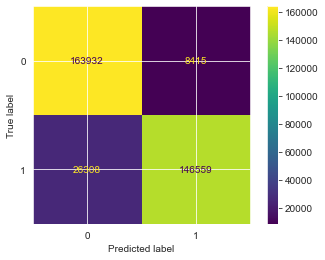

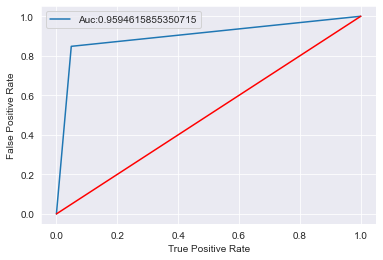

In [117]:
adaboost4 = AdaBoostClassifier()
 
metrics_4g = classification_model_4(adaboost4)

In [118]:
metrics_4g.index = ['Adaboost_4']
 
metrics_4g

Precision    Recall  F1_score   Roc_auc
Adaboost_4   0.850868  0.850868  0.892156  0.959462

In [119]:
metrics_4 = pd.concat([metrics_4a,metrics_4b,metrics_4c,metrics_4d,metrics_4e,metrics_4f,metrics_4g])
metrics_4

Precision    Recall  F1_score   Roc_auc
Decision_Tree_4         0.891275  0.891523  0.888352  0.886664
Random_Forest_4         0.888747  0.889013  0.923917  0.980418
Extra_Trees_4           0.898992  0.898974  0.929309  0.984426
KNN_4                   0.843284  0.843284  0.908605  0.961744
Logistic_Regression_4   0.889354  0.889354  0.899194  0.972860
Xgboost_4               0.903735  0.903735  0.900885  0.975529
Adaboost_4              0.850868  0.850868  0.892156  0.959462

### HYPERPARAMETER TUNING
Experiment 3:  Extra Trees 3

In [141]:
from sklearn.pipeline import Pipeline

In [142]:
validation_x = validation.copy()

In [143]:
xval = validation_x.drop(['action_taken_name'], axis=1)
yval = validation_x['action_taken_name']

In [144]:
num_val = xval.select_dtypes('number').columns
cat_val = xval.select_dtypes('O').columns

In [145]:
num_val

Index(['loan_amount_000s', 'applicant_income_000s', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units'],
      dtype='object')

In [146]:
num_preprocessor = Pipeline([('imputer', SimpleImputer(strategy= 'median')),
                             ('transformer', PowerTransformer(method = 'yeo-johnson')),
                             ('scaler', StandardScaler())
                            ])

In [147]:
cat_preprocessor = Pipeline([('imputer', SimpleImputer(strategy= 'most_frequent')),
                             ('encoder', OneHotEncoder())
                            ])

In [148]:
preprocessor_full = ColumnTransformer([('num', num_preprocessor, num_val),
                                      ('cat',cat_preprocessor,cat_val)])

In [149]:
xval = preprocessor_full.fit_transform(xval)
xval

array([[ 0.23810659,  0.76740247, -0.6869124 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.02543553,  0.0837529 ,  0.16943753, ...,  0.        ,
         0.        ,  1.        ],
       [-0.42056962, -0.49380602, -1.56457002, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.9612304 , -1.3515738 , -0.47571671, ...,  0.        ,
         0.        ,  1.        ],
       [-0.21680423, -0.0059937 ,  1.3981167 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.00252881, -0.27249788,  0.55430121, ...,  0.        ,
         0.        ,  1.        ]])

In [151]:
extra_trees = ExtraTreesClassifier()

In [165]:
params = {'n_estimators':range(100, 1500, 100),
              'max_depth':range(2,10),
              'min_samples_split':range(2, 10),
              'min_samples_leaf':range(2, 10),
              'min_weight_fraction_leaf': [0.001, 0.00001, 0.01, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,0.5],
              'ccp_alpha':[0.00001, 0.001, 0.001, 0.01, 0.1]
             }

In [166]:
grid = RandomizedSearchCV(extra_trees, scoring='f1', cv=3, param_distributions = params, verbose=True).fit(xval, yval)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [170]:
grid.best_params_

{'n_estimators': 1200,
 'min_weight_fraction_leaf': 0.3,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_depth': 8,
 'ccp_alpha': 0.001}

In [171]:
grid.best_estimator_

ExtraTreesClassifier(ccp_alpha=0.001, max_depth=8, min_samples_leaf=6,
                     min_weight_fraction_leaf=0.3, n_estimators=1200)

### RETRAINING

In [255]:
full_train_x = full_train.copy()

xtrain = full_train_x.drop(['action_taken_name'], axis=1)
ytrain = full_train_x['action_taken_name']

In [256]:
xtrain.columns

Index(['agency_abbr', 'loan_type_name', 'property_type_name',
       'loan_purpose_name', 'owner_occupancy_name', 'loan_amount_000s',
       'preapproval_name', 'state_name', 'applicant_race_name_1',
       'co_applicant_race_name_1', 'applicant_sex_name',
       'co_applicant_sex_name', 'applicant_income_000s', 'purchaser_type_name',
       'hoepa_status_name', 'lien_status_name', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'Co-applicant'],
      dtype='object')

In [198]:
num_train = xtrain.select_dtypes('number').columns
cat_train = xtrain.select_dtypes('O').columns


In [199]:
num_preprocessor = Pipeline([('imputer', SimpleImputer(strategy= 'median')),
                             ('transformer', PowerTransformer(method = 'yeo-johnson')),
                             ('scaler', StandardScaler())
                            ])

In [200]:
cat_preprocessor = Pipeline([('imputer', SimpleImputer(strategy= 'most_frequent')),
                             ('encoder', OneHotEncoder())
                            ])

In [201]:
preprocessor_full = ColumnTransformer([('num', num_preprocessor, num_train),
                                      ('cat',cat_preprocessor,cat_train)])

In [202]:
xtrain = preprocessor_full.fit_transform(xtrain,)
xtrain

array([[ 0.48477655, -0.20758236, -0.86593863, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15326843, -1.04080496, -1.66835916, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.19163113,  1.0366002 , -2.22671328, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.37183321, -0.39170878, -0.99082951, ...,  0.        ,
         1.        ,  0.        ],
       [-0.6988495 , -0.00812227, -0.60077872, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15326843, -1.20745774, -0.02400993, ...,  0.        ,
         1.        ,  0.        ]])

In [228]:
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)

In [204]:
model = grid.best_estimator_

In [205]:
# smote resampling
smote = SMOTE()

xtrain, ytrain = smote.fit_resample(xtrain, ytrain)

In [206]:
model.fit(xtrain, ytrain)

ExtraTreesClassifier(ccp_alpha=0.001, max_depth=8, min_samples_leaf=6,
                     min_weight_fraction_leaf=0.3, n_estimators=1200)

In [208]:
from sklearn.metrics import recall_score,precision_score, f1_score,roc_auc_score

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    288221
           1       1.00      0.73      0.84    288221

    accuracy                           0.86    576442
   macro avg       0.89      0.86      0.86    576442
weighted avg       0.89      0.86      0.86    576442



<Figure size 1008x1008 with 0 Axes>

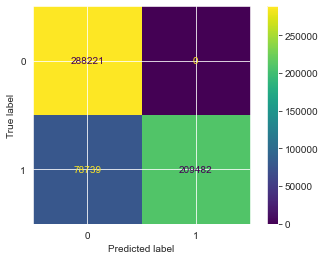

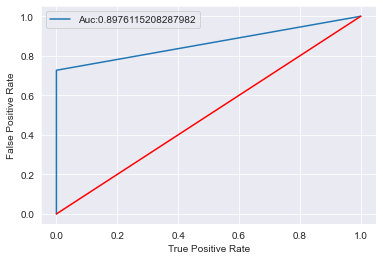

Precision   Recall  F1_score   Roc_auc
4        1.0  0.72681  0.841795  0.897612

In [212]:
recall = cross_val_score(model, xtrain, ytrain, cv=3, scoring='recall')
precision = cross_val_score(model, xtrain, ytrain, cv=3, scoring='precision')
f1 = cross_val_score(model, xtrain, ytrain, cv=3, scoring='f1')
roc_auc = cross_val_score(model, xtrain, ytrain, cv=3, scoring='roc_auc')

pred = cross_val_predict(model,xtrain, ytrain)

print(classification_report(ytrain, pred))

cm = confusion_matrix(ytrain, pred)

plt.figure(figsize=(14,14))
ConfusionMatrixDisplay(cm, ).plot();plt.show()

fpr, tpr, thresh = roc_curve(ytrain, pred)

plt.plot(fpr, tpr, label = f'Auc:{roc_auc.mean()}')
plt.plot([0,1], [0,1], color='red')
plt.legend()
plt.xlabel('True Positive Rate'); plt.ylabel('False Positive Rate');plt.show()

metrics_table = pd.DataFrame({'Precision':precision.mean(),
                              'Recall':recall.mean(),
                              'F1_score':f1.mean(),
                              'Roc_auc':roc_auc.mean()}, index=[4])
metrics_table 

### TESTING

In [216]:
test_x = test.copy()

In [217]:
xtest = test_x.drop(['action_taken_name'], axis=1)
ytest = test_x['action_taken_name']

num_test = xtest.select_dtypes('number').columns
cat_test= xtest.select_dtypes('O').columns


In [218]:
xtest = preprocessor_full.transform(xtest,)

In [219]:
test_pred = model.predict(xtest)

In [231]:
ytest = le.fit_transform(ytest)

              precision    recall  f1-score   support

           0       0.49      1.00      0.66     19356
           1       1.00      0.73      0.84     72332

    accuracy                           0.78     91688
   macro avg       0.75      0.86      0.75     91688
weighted avg       0.89      0.78      0.80     91688



<Figure size 1008x1008 with 0 Axes>

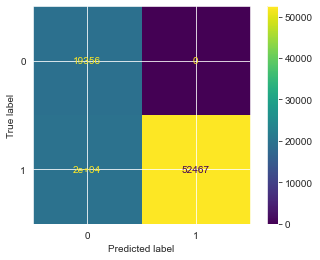

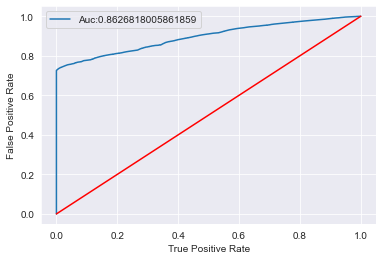

Precision    Recall  F1_score   Roc_auc
Test        1.0  0.725364  0.840824  0.862682

In [233]:
recall = recall_score(ytest, test_pred)
precision = precision_score(ytest, test_pred)
f1 = f1_score(ytest, test_pred)
roc_auc = roc_auc_score(ytest, test_pred)

print(classification_report(ytest, test_pred))

    
cm = confusion_matrix(ytest, test_pred)
    
plt.figure(figsize=(14,14))
ConfusionMatrixDisplay(cm, ).plot();plt.show()

fpr, tpr, thresh = roc_curve(ytest, model.predict_proba(xtest)[:,1])

plt.plot(fpr, tpr, label = f'Auc:{roc_auc}')
plt.plot([0,1], [0,1], color='red')
plt.legend()
plt.xlabel('True Positive Rate'); plt.ylabel('False Positive Rate');plt.show()

metrics_table = pd.DataFrame({'Precision':precision,
                                  'Recall':recall,
                                  'F1_score':f1,
                                  'Roc_auc':roc_auc}, index=['Test'])
metrics_table    


### SAVING MODEL

In [234]:
import joblib

In [247]:
filename = 'Loan_approval_model.joblib'

joblib.dump(model, filename)

['Loan_approval_model.joblib']

In [248]:
model_loaded = joblib.load(filename)

In [239]:
pred

array([1, 1, 0, ..., 0, 0, 0])